In [52]:
from bagboo import *
import numpy as np
import sklearn.datasets as ds
import pylab as pl
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import random as r
from sklearn.ensemble import RandomForestRegressor
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
avto = pd.read_csv("./data/auto-mpg.data.csv", sep='\t',header=None)
avto = avto.values
print "Avto Dataser Shape: ", avto.shape
avto_data = avto[:, 1:8]
avto_target = avto[:, 0]
avto_train_data = avto_data[:350]
avto_train_target = avto_target[:350]
avto_test_data = avto_data[350:]
avto_test_target = avto_target[350:] 

Avto Dataser Shape:  (392, 9)


BagBoo Parametrs:
    1. N_Boo
    2. N_Bag
    3. bagging_ratio
    4. max_depth
    5. shrinkage

In [77]:
log = open("./avto_stat_log.txt", "a")
#write statistic: 
#"new" bagging_ratio max_depth
#n_boo n_bag error
#fixed N_Boo * N_Bag = 1000

In [78]:
#fixed N_Boo * N_Bag = 1000
def calculate_statistics_bag_boo (param = 1000, step = 30, begin_value = 1,\
                                  max_depth = 2, bagging_ratio = 0.03, shrinkage = 0.1, \
                                 bag_iter_list = [], boo_iter_list = []):
#     bag_iter_list = [begin_value + step * i for i in range(param/step)]
#     boo_iter_list = [int(param / float(bag)) + 1 for bag in bag_iter_list[:]]
    error_statistic = []
#     print bag_iter_list
#     print boo_iter_list
#     log.write("new" + str(bagging_ratio) + "\n" + str(max_depth))
    for exp in range(len(bag_iter_list)):
#         print exp, boo_iter_list[exp], bag_iter_list[exp]
        print "Experiment: "+ str(exp) + "/" + str(len(bag_iter_list)) + \
                "\tBagging Iteration: " + str(bag_iter_list[exp]) + \
                    "\tBoosting Iteration: " + str(boo_iter_list[exp])
        
        bagboo_avto = BagBoo(n_boo= boo_iter_list[exp], n_bag=bag_iter_list[exp], \
                             bagging_ratio=bagging_ratio, max_depth=max_depth)
        
        bagboo_avto.fit(avto_train_data, avto_train_target)
        error = MSE(bagboo_avto.predict(avto_test_data), avto_test_target)
        error_statistic.append(error)
#         log.write(str(boo_iter_list[exp]) + " " + str(bag_iter_list[exp]) + " " + str(error) + "\n")
#         log.flush()
        print "\tMSE error: " + str(error)
    
    return error_statistic, bag_iter_list

In [56]:
%%time
error_stat_1, bag_list_1 = calculate_statistics_bag_boo(param=1000, step = 20, shrinkage=0.03)
# error_stat_2, bag_list_2 = calculate_statistics_bag_boo(param=5000, step = 100)

Experiment: 0/50	Bagging Iteration: 1	Boosting Iteration: 1001


Learning estimator number: 31/48; MSE error on train dataset: 0.0991695101699

	MSE error: 51.507001846
Experiment: 1/50	Bagging Iteration: 21	Boosting Iteration: 48


Learning estimator number: 47/48; MSE error on train dataset: 0.0182575038988

	MSE error: 39.1070216199
Experiment: 2/50	Bagging Iteration: 41	Boosting Iteration: 25


Learning estimator number: 9/17; MSE error on train dataset: 0.886303438235

	MSE error: 24.5103321125
Experiment: 3/50	Bagging Iteration: 61	Boosting Iteration: 17


Learning estimator number: 3/13; MSE error on train dataset: 2.63754403472

	MSE error: 33.9474230316
Experiment: 4/50	Bagging Iteration: 81	Boosting Iteration: 13


Learning estimator number: 1/10; MSE error on train dataset: 0.841430833333

	MSE error: 28.050304724
Experiment: 5/50	Bagging Iteration: 101	Boosting Iteration: 10


Learning estimator number: 8/9; MSE error on train dataset: 0.279916021733

	MSE error: 30.9295629871
Experiment: 6/50	Bagging Iteration: 121	Boosting Iteration: 9


Learning estimator number: 2/8; MSE error on train dataset: 1.10402860648

	MSE error: 28.2929564819
Experiment: 7/50	Bagging Iteration: 141	Boosting Iteration: 8


Iteration of bagging:4/161

	MSE error: 28.5821076062
Experiment: 8/50	Bagging Iteration: 161	Boosting Iteration: 7


Iteration of bagging:5/181

	MSE error: 28.1278791912
Experiment: 9/50	Bagging Iteration: 181	Boosting Iteration: 6


Learning estimator number: 4/5; MSE error on train dataset: 1.53843819173

	MSE error: 25.6638114893
Experiment: 10/50	Bagging Iteration: 201	Boosting Iteration: 5


Learning estimator number: 4/5; MSE error on train dataset: 4.07488682684

	MSE error: 27.0163616385
Experiment: 11/50	Bagging Iteration: 221	Boosting Iteration: 5


Iteration of bagging:0/241

	MSE error: 26.8288234168
Experiment: 12/50	Bagging Iteration: 241	Boosting Iteration: 5


Learning estimator number: 3/4; MSE error on train dataset: 4.7094838447

	MSE error: 27.7357442725
Experiment: 13/50	Bagging Iteration: 261	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 1.22739583285

	MSE error: 27.4569936219
Experiment: 14/50	Bagging Iteration: 281	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 2.0857357105

	MSE error: 27.7372217403
Experiment: 15/50	Bagging Iteration: 301	Boosting Iteration: 4


Learning estimator number: 1/4; MSE error on train dataset: 1.06218738095

	MSE error: 29.9666823627
Experiment: 16/50	Bagging Iteration: 321	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 1.5442518311

	MSE error: 28.1432173853
Experiment: 17/50	Bagging Iteration: 341	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 1.68588762095

	MSE error: 25.4311574097
Experiment: 18/50	Bagging Iteration: 361	Boosting Iteration: 3


Learning estimator number: 1/3; MSE error on train dataset: 2.24944930556

	MSE error: 28.2280919903
Experiment: 19/50	Bagging Iteration: 381	Boosting Iteration: 3


Iteration of bagging:3/401

	MSE error: 29.3600944124
Experiment: 20/50	Bagging Iteration: 401	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 3.29429013667

	MSE error: 27.3044609423
Experiment: 21/50	Bagging Iteration: 421	Boosting Iteration: 3


Iteration of bagging:3/441

	MSE error: 28.3228210595
Experiment: 22/50	Bagging Iteration: 441	Boosting Iteration: 3


Learning estimator number: 1/3; MSE error on train dataset: 2.3989

	MSE error: 27.3598504814
Experiment: 23/50	Bagging Iteration: 461	Boosting Iteration: 3


Iteration of bagging:17/481

	MSE error: 27.6502280223
Experiment: 24/50	Bagging Iteration: 481	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 1.342306945

	MSE error: 28.7739977421
Experiment: 25/50	Bagging Iteration: 501	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 2.387812

	MSE error: 26.7696464534
Experiment: 26/50	Bagging Iteration: 521	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.70352802083

	MSE error: 27.3992440425
Experiment: 27/50	Bagging Iteration: 541	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 3.78366189815

	MSE error: 28.920331018
Experiment: 28/50	Bagging Iteration: 561	Boosting Iteration: 2


Iteration of bagging:3/581

	MSE error: 26.3738257937
Experiment: 29/50	Bagging Iteration: 581	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.96519822917

	MSE error: 28.9175632294
Experiment: 30/50	Bagging Iteration: 601	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.8004575

	MSE error: 27.1727507881
Experiment: 31/50	Bagging Iteration: 621	Boosting Iteration: 2


Iteration of bagging:16/641

	MSE error: 28.3484640164
Experiment: 32/50	Bagging Iteration: 641	Boosting Iteration: 2


Iteration of bagging:7/661

	MSE error: 28.9657650941
Experiment: 33/50	Bagging Iteration: 661	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 4.32203375

	MSE error: 28.3497954428
Experiment: 34/50	Bagging Iteration: 681	Boosting Iteration: 2


Iteration of bagging:5/701

	MSE error: 27.2712565966
Experiment: 35/50	Bagging Iteration: 701	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.76913851852

	MSE error: 28.7817921646
Experiment: 36/50	Bagging Iteration: 721	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 3.94080291667

	MSE error: 27.8970343362
Experiment: 37/50	Bagging Iteration: 741	Boosting Iteration: 2


Iteration of bagging:24/761

	MSE error: 28.4258192713
Experiment: 38/50	Bagging Iteration: 761	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 4.783948

	MSE error: 27.6052979103
Experiment: 39/50	Bagging Iteration: 781	Boosting Iteration: 2


Iteration of bagging:16/801

	MSE error: 29.226006755
Experiment: 40/50	Bagging Iteration: 801	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.466012962963

	MSE error: 27.5752424579
Experiment: 41/50	Bagging Iteration: 821	Boosting Iteration: 2


Iteration of bagging:13/841

	MSE error: 28.8604241995
Experiment: 42/50	Bagging Iteration: 841	Boosting Iteration: 2


Iteration of bagging:13/861

	MSE error: 27.6554203863
Experiment: 43/50	Bagging Iteration: 861	Boosting Iteration: 2


Iteration of bagging:56/881

	MSE error: 28.6300813155
Experiment: 44/50	Bagging Iteration: 881	Boosting Iteration: 2


Iteration of bagging:5/901

	MSE error: 28.6057012036
Experiment: 45/50	Bagging Iteration: 901	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.95660671875

	MSE error: 28.9690659075
Experiment: 46/50	Bagging Iteration: 921	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.39941

	MSE error: 28.1723591226
Experiment: 47/50	Bagging Iteration: 941	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 2.33191166667

	MSE error: 27.3538517922
Experiment: 48/50	Bagging Iteration: 961	Boosting Iteration: 2


Iteration of bagging:0/981

	MSE error: 27.2252217616
Experiment: 49/50	Bagging Iteration: 981	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.87066125

	MSE error: 27.8325227695
CPU times: user 8min 21s, sys: 32.2 s, total: 8min 53s
Wall time: 8min 17s


In [57]:
%%time
error_stat_3, bag_list_3 = calculate_statistics_bag_boo(param=1000, max_depth=3, step=20)
# error_stat_4, bag_list_4 = calculate_statistics_bag_boo(param=4000, step = 100, max_depth=3)

Experiment: 0/50	Bagging Iteration: 1	Boosting Iteration: 1001


Learning estimator number: 1000/1001; MSE error on train dataset: 5.90067957105e-28

	MSE error: 43.8399922223
Experiment: 1/50	Bagging Iteration: 21	Boosting Iteration: 48


Learning estimator number: 1/25; MSE error on train dataset: 0.209555416667

	MSE error: 25.1784912668
Experiment: 2/50	Bagging Iteration: 41	Boosting Iteration: 25


Learning estimator number: 24/25; MSE error on train dataset: 0.0113377855209

	MSE error: 28.2683289618
Experiment: 3/50	Bagging Iteration: 61	Boosting Iteration: 17


Learning estimator number: 16/17; MSE error on train dataset: 0.0509112570512

	MSE error: 24.6537467972
Experiment: 4/50	Bagging Iteration: 81	Boosting Iteration: 13


Learning estimator number: 12/13; MSE error on train dataset: 0.0789358630878

	MSE error: 29.653520499
Experiment: 5/50	Bagging Iteration: 101	Boosting Iteration: 10


Learning estimator number: 9/10; MSE error on train dataset: 0.351482822252

	MSE error: 29.3033495902
Experiment: 6/50	Bagging Iteration: 121	Boosting Iteration: 9


Learning estimator number: 8/9; MSE error on train dataset: 0.457688383038

	MSE error: 26.3179719341
Experiment: 7/50	Bagging Iteration: 141	Boosting Iteration: 8


Learning estimator number: 1/7; MSE error on train dataset: 0.93736

	MSE error: 26.9092124863
Experiment: 8/50	Bagging Iteration: 161	Boosting Iteration: 7


Learning estimator number: 6/7; MSE error on train dataset: 2.52049246013

	MSE error: 25.16244704
Experiment: 9/50	Bagging Iteration: 181	Boosting Iteration: 6


Learning estimator number: 5/6; MSE error on train dataset: 0.925177906666

	MSE error: 29.0763750738
Experiment: 10/50	Bagging Iteration: 201	Boosting Iteration: 5


Learning estimator number: 4/5; MSE error on train dataset: 1.50295759183

	MSE error: 27.0146591058
Experiment: 11/50	Bagging Iteration: 221	Boosting Iteration: 5


Iteration of bagging:7/241

	MSE error: 27.3889720728
Experiment: 12/50	Bagging Iteration: 241	Boosting Iteration: 5


Iteration of bagging:8/261

	MSE error: 26.5917344565
Experiment: 13/50	Bagging Iteration: 261	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 0.29084157675

	MSE error: 29.6153443101
Experiment: 14/50	Bagging Iteration: 281	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 0.195622258333

	MSE error: 27.4513526627
Experiment: 15/50	Bagging Iteration: 301	Boosting Iteration: 4


Learning estimator number: 1/4; MSE error on train dataset: 1.70323142857

	MSE error: 29.1697776884
Experiment: 16/50	Bagging Iteration: 321	Boosting Iteration: 4


Iteration of bagging:8/341

	MSE error: 26.7022847715
Experiment: 17/50	Bagging Iteration: 341	Boosting Iteration: 3


Iteration of bagging:10/361

	MSE error: 27.7311659763
Experiment: 18/50	Bagging Iteration: 361	Boosting Iteration: 3


Learning estimator number: 1/3; MSE error on train dataset: 0.09023175

	MSE error: 25.3373490344
Experiment: 19/50	Bagging Iteration: 381	Boosting Iteration: 3


Iteration of bagging:8/401

	MSE error: 28.5829353591
Experiment: 20/50	Bagging Iteration: 401	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.756384066667

	MSE error: 27.0047383893
Experiment: 21/50	Bagging Iteration: 421	Boosting Iteration: 3


Iteration of bagging:8/441

	MSE error: 26.9070318218
Experiment: 22/50	Bagging Iteration: 441	Boosting Iteration: 3


Learning estimator number: 1/3; MSE error on train dataset: 0.2678125

	MSE error: 25.882958397
Experiment: 23/50	Bagging Iteration: 461	Boosting Iteration: 3


Iteration of bagging:8/481

	MSE error: 26.4041865406
Experiment: 24/50	Bagging Iteration: 481	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 1.42749791667

	MSE error: 25.6736210934
Experiment: 25/50	Bagging Iteration: 501	Boosting Iteration: 2


Iteration of bagging:13/521

	MSE error: 27.8652688718
Experiment: 26/50	Bagging Iteration: 521	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 8.36753071429

	MSE error: 27.4692207149
Experiment: 27/50	Bagging Iteration: 541	Boosting Iteration: 2


Iteration of bagging:12/561

	MSE error: 28.177749232
Experiment: 28/50	Bagging Iteration: 561	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.115563333333

	MSE error: 27.3349070397
Experiment: 29/50	Bagging Iteration: 581	Boosting Iteration: 2


Iteration of bagging:11/601

	MSE error: 26.8681390814
Experiment: 30/50	Bagging Iteration: 601	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.11369274074

	MSE error: 28.4219411145
Experiment: 31/50	Bagging Iteration: 621	Boosting Iteration: 2


Iteration of bagging:11/641

	MSE error: 26.8850516204
Experiment: 32/50	Bagging Iteration: 641	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 7.99002

	MSE error: 28.1313111931
Experiment: 33/50	Bagging Iteration: 661	Boosting Iteration: 2


Iteration of bagging:7/681

	MSE error: 26.9535853206
Experiment: 34/50	Bagging Iteration: 681	Boosting Iteration: 2


Iteration of bagging:18/701

	MSE error: 27.2903526855
Experiment: 35/50	Bagging Iteration: 701	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.720940416667

	MSE error: 26.1528536287
Experiment: 36/50	Bagging Iteration: 721	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.259466666667

	MSE error: 28.297532995
Experiment: 37/50	Bagging Iteration: 741	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.267583333333

	MSE error: 25.9084903267
Experiment: 38/50	Bagging Iteration: 761	Boosting Iteration: 2


Iteration of bagging:10/781

	MSE error: 26.2573994421
Experiment: 39/50	Bagging Iteration: 781	Boosting Iteration: 2


Iteration of bagging:11/801

	MSE error: 27.2909815497
Experiment: 40/50	Bagging Iteration: 801	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.211326666667

	MSE error: 28.0052742293
Experiment: 41/50	Bagging Iteration: 821	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.1514875

	MSE error: 28.29477135
Experiment: 42/50	Bagging Iteration: 841	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.42915175

	MSE error: 27.9003605254
Experiment: 43/50	Bagging Iteration: 861	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.419398095238

	MSE error: 27.1939479089
Experiment: 44/50	Bagging Iteration: 881	Boosting Iteration: 2


Iteration of bagging:15/901

	MSE error: 27.4318274604
Experiment: 45/50	Bagging Iteration: 901	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.39730297222

	MSE error: 27.0299311847
Experiment: 46/50	Bagging Iteration: 921	Boosting Iteration: 2


Iteration of bagging:29/941

	MSE error: 26.5724829241
Experiment: 47/50	Bagging Iteration: 941	Boosting Iteration: 2


Iteration of bagging:6/961

	MSE error: 26.3412331026
Experiment: 48/50	Bagging Iteration: 961	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 1.08495738095

	MSE error: 27.9857025794
Experiment: 49/50	Bagging Iteration: 981	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.216945277778

	MSE error: 27.3523308436
CPU times: user 10min 15s, sys: 41.9 s, total: 10min 57s
Wall time: 10min 4s


Learning estimator number: 1/2; MSE error on train dataset: 3.576984375

In [31]:
boo_list = range(1, 3000, 30)
skl_error = [MSE(GradientBoostingRegressor(criterion='mse', min_impurity_split=0,\
                                        learning_rate=0.1, max_depth=3, n_estimators=boo).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]

In [32]:
skl_error[:10]

[82.06787595135974,
 16.419316631768567,
 16.81874010134718,
 17.528083813890056,
 17.970455121508184,
 18.222837300335033,
 19.150208312835407,
 20.063681762116115,
 20.045783321999142,
 21.450515483692858]

In [51]:
%%time
error_stat_11, bag_list_11 = calculate_statistics_bag_boo(param=4000, shrinkage=0.03)
# error_stat_2, bag_list_2 = calculate_statistics_bag_boo(param=5000, step = 100, shrinkage=0.01)
error_stat_31, bag_list_31 = calculate_statistics_bag_boo(param=4000, max_depth=3, shrinkage=0.03)
# error_stat_4, bag_list_4 = calculate_statistics_bag_boo(param=4000, step = 100, max_depth=3, shrinkage=0.01)

Experiment: 0/133	Bagging Iteration: 1	Boosting Iteration: 4001


Learning estimator number: 1650/4001; MSE error on train dataset: 4.69530010788e-28

KeyboardInterrupt: 

In [63]:
%%time
bagboo_avto = BagBoo(n_boo=15, n_bag = 100, \
                             bagging_ratio=0.2, max_depth= 3)
        
bagboo_avto.fit(avto_train_data, avto_train_target)
print MSE(bagboo_avto.predict(avto_test_data), avto_test_target)

Learning estimator number: 12/15; MSE error on train dataset: 2.84387236702

19.0811712839
CPU times: user 1min 33s, sys: 2.55 s, total: 1min 35s
Wall time: 1min 33s


Learning estimator number: 14/15; MSE error on train dataset: 2.55441607482

In [65]:
%%time
bagboo_avto = BagBoo(n_boo=15, n_bag = 400, \
                             bagging_ratio=0.2, max_depth= 3)
        
bagboo_avto.fit(avto_train_data, avto_train_target)
print MSE(bagboo_avto.predict(avto_test_data), avto_test_target)

Learning estimator number: 14/15; MSE error on train dataset: 2.19278658713

18.9821721385
CPU times: user 6min 13s, sys: 9.45 s, total: 6min 22s
Wall time: 6min 12s


In [67]:
%%time
bagboo_avto = BagBoo(n_boo=15, n_bag = 600, \
                             bagging_ratio=0.2, max_depth= 3)
        
bagboo_avto.fit(avto_train_data, avto_train_target)
print MSE(bagboo_avto.predict(avto_test_data), avto_test_target)

Learning estimator number: 14/15; MSE error on train dataset: 1.58144913522

18.2609870615
CPU times: user 9min 49s, sys: 15.1 s, total: 10min 4s
Wall time: 9min 49s


In [94]:
bag_iter_list = [100 * i for i in range(1, 40, 2)]
boo_iter_list_1 = [15] * 20
boo_iter_list_2 = [20] * 20
boo_iter_list_3 = [30] * 20
print len(bag_iter_list)

20


## Calculate dependence error from count bagging iteration. Boosting count is fixed.

In [11]:
#calculate dependence error from count bagging iteration. Boosting count is fixed.
error_stat = {}

In [12]:
error_stat[15] = BagBoo(n_boo= 15, n_bag= 150, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

error_stat[25] = BagBoo(n_boo= 25, n_bag= 150, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

error_stat[35] = BagBoo(n_boo= 35, n_bag= 150, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

Learning estimator number: 2/15; MSE error on train dataset: 4.62995713038

MSE on test Dataset: 23.1645196935 Iteration of Bagging: 0 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.42923012351

MSE on test Dataset: 23.2534241109 Iteration of Bagging: 1 / 150


Learning estimator number: 3/15; MSE error on train dataset: 3.47459223589

MSE on test Dataset: 24.5068099191 Iteration of Bagging: 2 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.92889697188

MSE on test Dataset: 21.045676752 Iteration of Bagging: 3 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.82708845034

MSE on test Dataset: 20.3438200899 Iteration of Bagging: 4 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.69161136162

MSE on test Dataset: 21.1667969769 Iteration of Bagging: 5 / 150


Iteration of bagging:7/150

MSE on test Dataset: 22.3921395357 Iteration of Bagging: 6 / 150


Iteration of bagging:8/150

MSE on test Dataset: 21.4061515879 Iteration of Bagging: 7 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.29758562184

MSE on test Dataset: 20.5214321237 Iteration of Bagging: 8 / 150


Iteration of bagging:10/150

MSE on test Dataset: 20.741298641 Iteration of Bagging: 9 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.51906890176

MSE on test Dataset: 22.3823219555 Iteration of Bagging: 10 / 150


Iteration of bagging:12/150

MSE on test Dataset: 21.2667965467 Iteration of Bagging: 11 / 150


Iteration of bagging:13/150

MSE on test Dataset: 22.1577656504 Iteration of Bagging: 12 / 150


Learning estimator number: 3/15; MSE error on train dataset: 4.12931516855

MSE on test Dataset: 20.4720677966 Iteration of Bagging: 13 / 150


Iteration of bagging:15/150

MSE on test Dataset: 20.0060922539 Iteration of Bagging: 14 / 150


Iteration of bagging:16/150

MSE on test Dataset: 19.6457305401 Iteration of Bagging: 15 / 150


Iteration of bagging:17/150

MSE on test Dataset: 18.9920054737 Iteration of Bagging: 16 / 150


Learning estimator number: 14/15; MSE error on train dataset: 2.25561895017

MSE on test Dataset: 19.2614829886 Iteration of Bagging: 17 / 150


Iteration of bagging:19/150

MSE on test Dataset: 19.6657695075 Iteration of Bagging: 18 / 150


Iteration of bagging:20/150

MSE on test Dataset: 19.7965815212 Iteration of Bagging: 19 / 150


Iteration of bagging:21/150

MSE on test Dataset: 19.4978746039 Iteration of Bagging: 20 / 150


Iteration of bagging:22/150

MSE on test Dataset: 19.1051165696 Iteration of Bagging: 21 / 150


Iteration of bagging:23/150

MSE on test Dataset: 19.3074334649 Iteration of Bagging: 22 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.90529269873

MSE on test Dataset: 18.7528804663 Iteration of Bagging: 23 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.79850822742

MSE on test Dataset: 19.0394586427 Iteration of Bagging: 24 / 150


Learning estimator number: 1/15; MSE error on train dataset: 2.92137213631

MSE on test Dataset: 19.4866125459 Iteration of Bagging: 25 / 150


Iteration of bagging:27/150

MSE on test Dataset: 19.7872578278 Iteration of Bagging: 26 / 150


Iteration of bagging:28/150

MSE on test Dataset: 19.4599097715 Iteration of Bagging: 27 / 150


Iteration of bagging:29/150

MSE on test Dataset: 19.7542057973 Iteration of Bagging: 28 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.38325549772

MSE on test Dataset: 20.0593690389 Iteration of Bagging: 29 / 150


Iteration of bagging:31/150

MSE on test Dataset: 20.234360533 Iteration of Bagging: 30 / 150


Iteration of bagging:32/150

MSE on test Dataset: 20.0111728526 Iteration of Bagging: 31 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.10338161575

MSE on test Dataset: 19.8190389746 Iteration of Bagging: 32 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.34142236329

MSE on test Dataset: 19.7416921882 Iteration of Bagging: 33 / 150


Iteration of bagging:35/150

MSE on test Dataset: 19.6466985104 Iteration of Bagging: 34 / 150


Learning estimator number: 1/15; MSE error on train dataset: 7.12736140216

MSE on test Dataset: 19.4528865218 Iteration of Bagging: 35 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.75204826296

MSE on test Dataset: 19.4535014381 Iteration of Bagging: 36 / 150


Learning estimator number: 3/15; MSE error on train dataset: 3.76352797063

MSE on test Dataset: 19.2911894059 Iteration of Bagging: 37 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.96385246328

MSE on test Dataset: 18.9810947068 Iteration of Bagging: 38 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.59016504104

MSE on test Dataset: 19.0501346751 Iteration of Bagging: 39 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.69158844077

MSE on test Dataset: 18.4911131718 Iteration of Bagging: 40 / 150


Learning estimator number: 14/15; MSE error on train dataset: 2.62699068109

MSE on test Dataset: 18.3079066795 Iteration of Bagging: 41 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.38047842451

MSE on test Dataset: 18.400724515 Iteration of Bagging: 42 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.90334144137

MSE on test Dataset: 18.2944262614 Iteration of Bagging: 43 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.23470832643

MSE on test Dataset: 18.3842132942 Iteration of Bagging: 44 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.62161576381

MSE on test Dataset: 18.4360431082 Iteration of Bagging: 45 / 150


Iteration of bagging:47/150

MSE on test Dataset: 18.5361495855 Iteration of Bagging: 46 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.77639846096

MSE on test Dataset: 18.2035464046 Iteration of Bagging: 47 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.63861247847

MSE on test Dataset: 18.1082542679 Iteration of Bagging: 48 / 150


Iteration of bagging:50/150

MSE on test Dataset: 18.2202215731 Iteration of Bagging: 49 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.94853149669

MSE on test Dataset: 18.1439190599 Iteration of Bagging: 50 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.46006308602

MSE on test Dataset: 18.1585817055 Iteration of Bagging: 51 / 150


Iteration of bagging:53/150

MSE on test Dataset: 18.1316043944 Iteration of Bagging: 52 / 150


Iteration of bagging:54/150

MSE on test Dataset: 18.1345538841 Iteration of Bagging: 53 / 150


Learning estimator number: 3/15; MSE error on train dataset: 4.43749347559

MSE on test Dataset: 18.0841613889 Iteration of Bagging: 54 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.67658682468

MSE on test Dataset: 18.3116614975 Iteration of Bagging: 55 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.90583466703

MSE on test Dataset: 18.3225422271 Iteration of Bagging: 56 / 150


Iteration of bagging:58/150

MSE on test Dataset: 18.1154065143 Iteration of Bagging: 57 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.2056190401

MSE on test Dataset: 18.1157892582 Iteration of Bagging: 58 / 150


Iteration of bagging:60/150

MSE on test Dataset: 18.1769366415 Iteration of Bagging: 59 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.41336874442

MSE on test Dataset: 18.185415902 Iteration of Bagging: 60 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.15231953731

MSE on test Dataset: 18.28685721 Iteration of Bagging: 61 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.78448606178

MSE on test Dataset: 18.3766976501 Iteration of Bagging: 62 / 150


Iteration of bagging:64/150

MSE on test Dataset: 18.3779017345 Iteration of Bagging: 63 / 150


Iteration of bagging:65/150

MSE on test Dataset: 18.351246574 Iteration of Bagging: 64 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.2029160501

MSE on test Dataset: 18.3822654614 Iteration of Bagging: 65 / 150


Learning estimator number: 2/15; MSE error on train dataset: 6.24228580106

MSE on test Dataset: 18.5530998261 Iteration of Bagging: 66 / 150


Iteration of bagging:68/150

MSE on test Dataset: 18.5113075418 Iteration of Bagging: 67 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.54434726509

MSE on test Dataset: 18.5437532273 Iteration of Bagging: 68 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.95984774284

MSE on test Dataset: 18.6088255464 Iteration of Bagging: 69 / 150


Learning estimator number: 2/15; MSE error on train dataset: 6.63254383635

MSE on test Dataset: 18.5578076192 Iteration of Bagging: 70 / 150


Iteration of bagging:72/150

MSE on test Dataset: 18.4892256722 Iteration of Bagging: 71 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.51786231376

MSE on test Dataset: 18.5347176297 Iteration of Bagging: 72 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.12349993291

MSE on test Dataset: 18.4501387121 Iteration of Bagging: 73 / 150


Learning estimator number: 3/15; MSE error on train dataset: 2.9999016225

MSE on test Dataset: 18.4370421659 Iteration of Bagging: 74 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.73590547312

MSE on test Dataset: 18.3999189878 Iteration of Bagging: 75 / 150


Learning estimator number: 1/15; MSE error on train dataset: 6.27605738233

MSE on test Dataset: 18.372379544 Iteration of Bagging: 76 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.1922823131

MSE on test Dataset: 18.4043184044 Iteration of Bagging: 77 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.13442725888

MSE on test Dataset: 18.4242096342 Iteration of Bagging: 78 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.46510001772

MSE on test Dataset: 18.4534672119 Iteration of Bagging: 79 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.58934354709

MSE on test Dataset: 18.5763628939 Iteration of Bagging: 80 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.15941181061

MSE on test Dataset: 18.6584359702 Iteration of Bagging: 81 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.86013054398

MSE on test Dataset: 18.7771069676 Iteration of Bagging: 82 / 150


Iteration of bagging:84/150

MSE on test Dataset: 18.7943741724 Iteration of Bagging: 83 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.70782877025

MSE on test Dataset: 18.8326648809 Iteration of Bagging: 84 / 150


Iteration of bagging:86/150

MSE on test Dataset: 18.6902158038 Iteration of Bagging: 85 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.95600837858

MSE on test Dataset: 18.7898111952 Iteration of Bagging: 86 / 150


Learning estimator number: 1/15; MSE error on train dataset: 6.07349412299

MSE on test Dataset: 18.8048770506 Iteration of Bagging: 87 / 150


Learning estimator number: 3/15; MSE error on train dataset: 5.45165942239

MSE on test Dataset: 18.8536824939 Iteration of Bagging: 88 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.0140784051

MSE on test Dataset: 18.8176851228 Iteration of Bagging: 89 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.71242528098

MSE on test Dataset: 18.9022992324 Iteration of Bagging: 90 / 150


Learning estimator number: 14/15; MSE error on train dataset: 3.08409250127

MSE on test Dataset: 18.9460818261 Iteration of Bagging: 91 / 150


Iteration of bagging:93/150

MSE on test Dataset: 18.9500066714 Iteration of Bagging: 92 / 150


Iteration of bagging:94/150

MSE on test Dataset: 18.9832575295 Iteration of Bagging: 93 / 150


Iteration of bagging:95/150

MSE on test Dataset: 19.0350012381 Iteration of Bagging: 94 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.79346791575

MSE on test Dataset: 19.0374526035 Iteration of Bagging: 95 / 150


Iteration of bagging:97/150

MSE on test Dataset: 18.9424090962 Iteration of Bagging: 96 / 150


Learning estimator number: 1/15; MSE error on train dataset: 2.83468084705

MSE on test Dataset: 18.8903219317 Iteration of Bagging: 97 / 150


Iteration of bagging:99/150

MSE on test Dataset: 18.8797948818 Iteration of Bagging: 98 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.56402578442

MSE on test Dataset: 18.8197239187 Iteration of Bagging: 99 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.67544224169

MSE on test Dataset: 18.8203750731 Iteration of Bagging: 100 / 150


Learning estimator number: 1/15; MSE error on train dataset: 6.157444394

MSE on test Dataset: 18.9233988265 Iteration of Bagging: 101 / 150


Iteration of bagging:103/150

MSE on test Dataset: 18.9689145001 Iteration of Bagging: 102 / 150


Iteration of bagging:104/150

MSE on test Dataset: 19.1411705177 Iteration of Bagging: 103 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.43018933646

MSE on test Dataset: 19.0683343722 Iteration of Bagging: 104 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.79188182639

MSE on test Dataset: 19.1035032777 Iteration of Bagging: 105 / 150


Learning estimator number: 4/15; MSE error on train dataset: 3.30768909951

MSE on test Dataset: 19.1560997896 Iteration of Bagging: 106 / 150


Learning estimator number: 3/15; MSE error on train dataset: 3.24779757016

MSE on test Dataset: 19.1134532158 Iteration of Bagging: 107 / 150


Iteration of bagging:109/150

MSE on test Dataset: 19.1806239396 Iteration of Bagging: 108 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.51947995374

MSE on test Dataset: 19.2542882137 Iteration of Bagging: 109 / 150


Iteration of bagging:111/150

MSE on test Dataset: 19.1541675898 Iteration of Bagging: 110 / 150


Learning estimator number: 3/15; MSE error on train dataset: 4.25222587093

MSE on test Dataset: 19.1716369949 Iteration of Bagging: 111 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.77712969814

MSE on test Dataset: 19.1929504923 Iteration of Bagging: 112 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.66197911493

MSE on test Dataset: 19.2147146878 Iteration of Bagging: 113 / 150


Iteration of bagging:115/150

MSE on test Dataset: 19.2893584172 Iteration of Bagging: 114 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.54776959774

MSE on test Dataset: 19.3259227589 Iteration of Bagging: 115 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.56986953324

MSE on test Dataset: 19.2846732423 Iteration of Bagging: 116 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.5602791362

MSE on test Dataset: 19.4296880845 Iteration of Bagging: 117 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.22184097867

MSE on test Dataset: 19.3995141784 Iteration of Bagging: 118 / 150


Learning estimator number: 1/15; MSE error on train dataset: 3.96315096276

MSE on test Dataset: 19.4532191562 Iteration of Bagging: 119 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.51715957729

MSE on test Dataset: 19.4201406375 Iteration of Bagging: 120 / 150


Learning estimator number: 2/15; MSE error on train dataset: 2.08997808837

MSE on test Dataset: 19.3009714817 Iteration of Bagging: 121 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.59290067852

MSE on test Dataset: 19.3344875066 Iteration of Bagging: 122 / 150


Iteration of bagging:124/150

MSE on test Dataset: 19.2655993382 Iteration of Bagging: 123 / 150


Iteration of bagging:125/150

MSE on test Dataset: 19.3393600741 Iteration of Bagging: 124 / 150


Iteration of bagging:126/150

MSE on test Dataset: 19.3941929233 Iteration of Bagging: 125 / 150


Learning estimator number: 1/15; MSE error on train dataset: 2.85413044989

MSE on test Dataset: 19.4302459722 Iteration of Bagging: 126 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.87818079553

MSE on test Dataset: 19.524976107 Iteration of Bagging: 127 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.81534770605

MSE on test Dataset: 19.5259265184 Iteration of Bagging: 128 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.40689138388

MSE on test Dataset: 19.511951158 Iteration of Bagging: 129 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.25349282026

MSE on test Dataset: 19.5233968457 Iteration of Bagging: 130 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.24229583608

MSE on test Dataset: 19.5881686407 Iteration of Bagging: 131 / 150


Learning estimator number: 2/15; MSE error on train dataset: 3.44641114615

MSE on test Dataset: 19.6352887292 Iteration of Bagging: 132 / 150


Learning estimator number: 1/15; MSE error on train dataset: 7.33051311042

MSE on test Dataset: 19.5028937886 Iteration of Bagging: 133 / 150


Iteration of bagging:135/150

MSE on test Dataset: 19.4083079703 Iteration of Bagging: 134 / 150


Iteration of bagging:136/150

MSE on test Dataset: 19.3290443155 Iteration of Bagging: 135 / 150


Learning estimator number: 2/15; MSE error on train dataset: 8.23144049296

MSE on test Dataset: 19.3338180635 Iteration of Bagging: 136 / 150


Iteration of bagging:138/150

MSE on test Dataset: 19.4744879963 Iteration of Bagging: 137 / 150


Learning estimator number: 1/15; MSE error on train dataset: 5.63279693953

MSE on test Dataset: 19.437170825 Iteration of Bagging: 138 / 150


Learning estimator number: 2/15; MSE error on train dataset: 2.86501246024

MSE on test Dataset: 19.2450076292 Iteration of Bagging: 139 / 150


Iteration of bagging:141/150

MSE on test Dataset: 19.2129642707 Iteration of Bagging: 140 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.40364769245

MSE on test Dataset: 19.2329033641 Iteration of Bagging: 141 / 150


Learning estimator number: 2/15; MSE error on train dataset: 4.62311098271

MSE on test Dataset: 19.241308832 Iteration of Bagging: 142 / 150


Learning estimator number: 1/15; MSE error on train dataset: 4.38095294635

MSE on test Dataset: 19.1753623238 Iteration of Bagging: 143 / 150


Iteration of bagging:145/150

MSE on test Dataset: 19.1346011006 Iteration of Bagging: 144 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.05732672757

MSE on test Dataset: 19.1202804641 Iteration of Bagging: 145 / 150


Iteration of bagging:147/150

MSE on test Dataset: 19.1207190787 Iteration of Bagging: 146 / 150


Learning estimator number: 2/15; MSE error on train dataset: 5.45508408065

MSE on test Dataset: 19.1626052707 Iteration of Bagging: 147 / 150


Learning estimator number: 3/15; MSE error on train dataset: 6.91552825339

MSE on test Dataset: 19.1274694263 Iteration of Bagging: 148 / 150


Learning estimator number: 13/15; MSE error on train dataset: 3.78694759984

MSE on test Dataset: 19.1012268524 Iteration of Bagging: 149 / 150


Learning estimator number: 14/15; MSE error on train dataset: 3.63875885007

In [53]:
boo_list = range(1, 150, 2)
skl_error = [MSE(RandomForestRegressor(criterion='mse', min_impurity_split=0,\
                                        max_depth=2, n_estimators=boo).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]

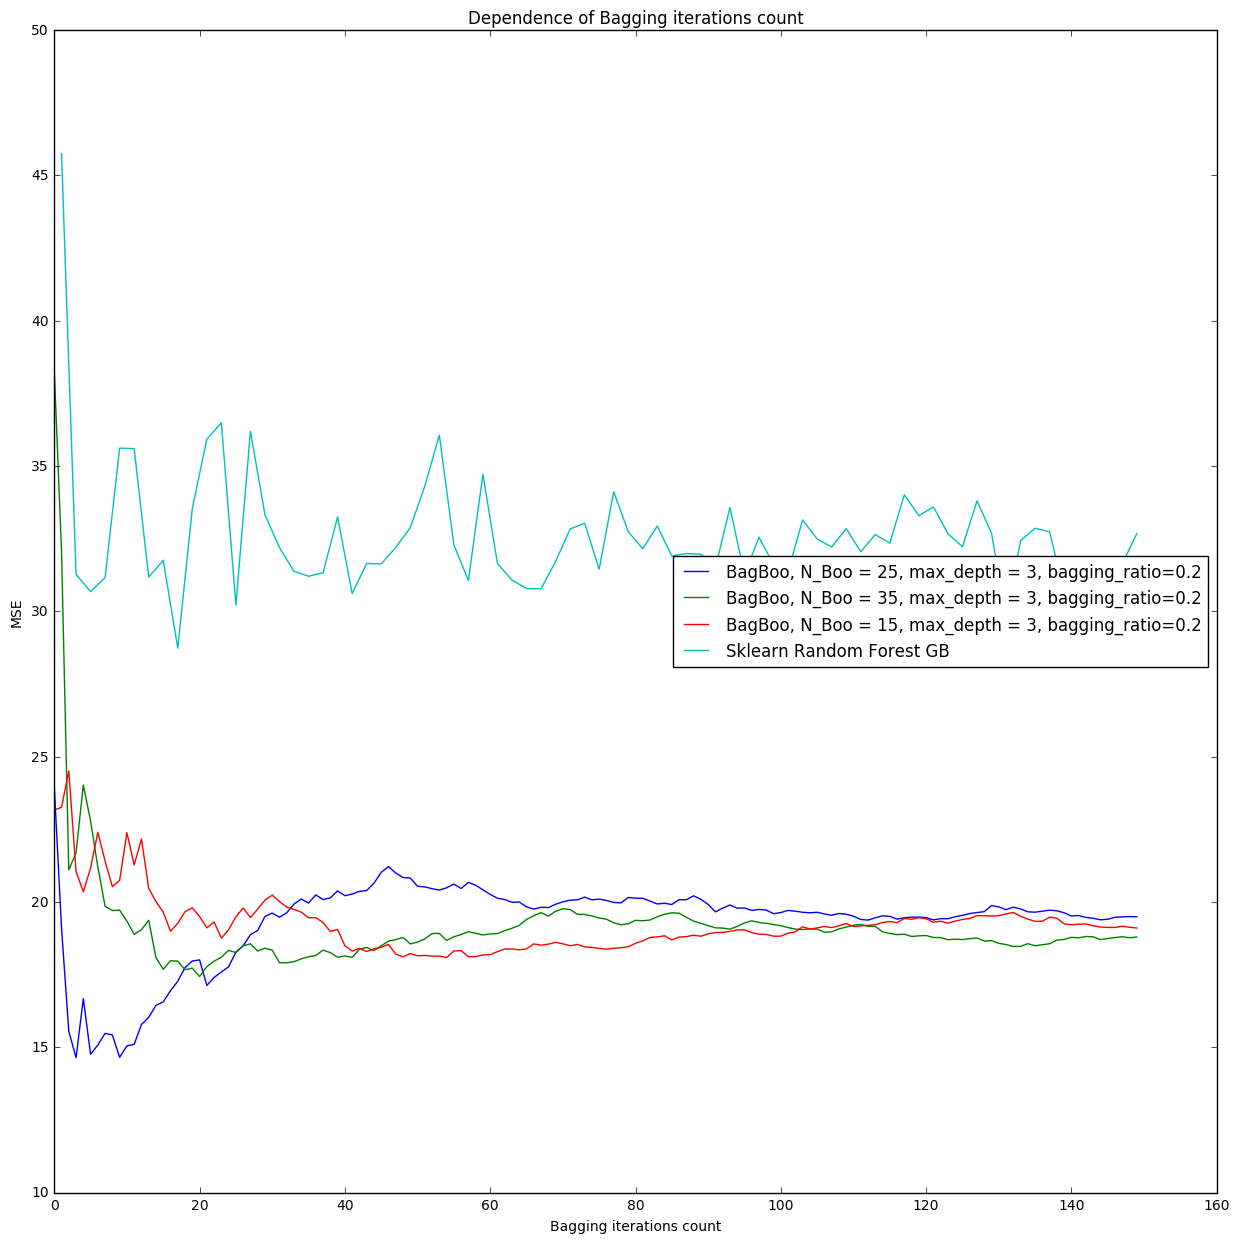

In [54]:
fig, ax = plt.subplots(figsize = (15, 15))
for k in error_stat.keys():
    
    plt.plot(range(0, 150), error_stat[k], label='BagBoo, N_Boo = ' + str(k) + \
                                                 ', max_depth = 3, bagging_ratio=0.2')
    
# plt.plot(bag_list_20, error_stat_20, label='BagBoo, N_Boo = 15, max_depth = 3, bagging_ratio=0.2')
# plt.plot(bag_list_3[:1000], error_stat_3[:1000], label='BagBoo, N_Bag * N_Boo = 1000, max_depth = 3')
# plt.plot(bag_list_4[:1000], error_stat_4[:1000], label='BagBoo, N_Bag * N_Boo = 4000, max_depth = 3')
plt.plot(boo_list, skl_error, label='Sklearn Random Forest GB')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')

In [34]:
error_stat_2  ={}
error_stat_2[15] = BagBoo(n_boo= 15, n_bag= 200, max_depth=2, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_2[25] = BagBoo(n_boo= 25, n_bag= 200, max_depth=2, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

error_stat_2[35] = BagBoo(n_boo= 35, n_bag= 200, max_depth=2, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_2[45] = BagBoo(n_boo= 45, n_bag= 200, max_depth=2, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_2[55] = BagBoo(n_boo= 55, n_bag= 200, max_depth=2, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

Learning estimator number: 2/15; MSE error on train dataset: 7.47919694426

MSE on test Dataset: 41.1860681517 Iteration of Bagging: 0 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.00160797799

MSE on test Dataset: 23.4699584978 Iteration of Bagging: 1 / 200


Learning estimator number: 4/15; MSE error on train dataset: 6.67447664948

MSE on test Dataset: 22.9904680595 Iteration of Bagging: 2 / 200


Learning estimator number: 5/15; MSE error on train dataset: 6.5068213536

MSE on test Dataset: 23.2540078412 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 23.9094189268 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 24.503680001 Iteration of Bagging: 5 / 200


Iteration of bagging:7/200

MSE on test Dataset: 22.4938554076 Iteration of Bagging: 6 / 200


Iteration of bagging:8/200

MSE on test Dataset: 21.6893257659 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 21.982299615 Iteration of Bagging: 8 / 200


Iteration of bagging:10/200

MSE on test Dataset: 22.8832909533 Iteration of Bagging: 9 / 200


Iteration of bagging:11/200

MSE on test Dataset: 22.9289385871 Iteration of Bagging: 10 / 200


Learning estimator number: 3/15; MSE error on train dataset: 7.09515303497

MSE on test Dataset: 23.6736418857 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 24.2193503726 Iteration of Bagging: 12 / 200


Learning estimator number: 14/15; MSE error on train dataset: 4.23363329102

MSE on test Dataset: 24.0183954656 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 23.6160075016 Iteration of Bagging: 14 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.9910561011

MSE on test Dataset: 23.4419123352 Iteration of Bagging: 15 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.67176575823

MSE on test Dataset: 23.0121547561 Iteration of Bagging: 16 / 200


Learning estimator number: 4/15; MSE error on train dataset: 8.10972381848

MSE on test Dataset: 22.9938703894 Iteration of Bagging: 17 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.86559936253

MSE on test Dataset: 22.9234270442 Iteration of Bagging: 18 / 200


Iteration of bagging:20/200

MSE on test Dataset: 21.8152863668 Iteration of Bagging: 19 / 200


Learning estimator number: 14/15; MSE error on train dataset: 5.24381240885

MSE on test Dataset: 22.0606682539 Iteration of Bagging: 20 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.92033585973

MSE on test Dataset: 22.3337246213 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 22.7715806465 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 22.5790226325 Iteration of Bagging: 23 / 200


Learning estimator number: 3/15; MSE error on train dataset: 7.63993711235

MSE on test Dataset: 22.4244765176 Iteration of Bagging: 24 / 200


Iteration of bagging:26/200

MSE on test Dataset: 22.0027712791 Iteration of Bagging: 25 / 200


Iteration of bagging:27/200

MSE on test Dataset: 22.0544231577 Iteration of Bagging: 26 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.0382617213

MSE on test Dataset: 21.973985562 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 21.8684083568 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 21.1411257394 Iteration of Bagging: 29 / 200


Iteration of bagging:31/200

MSE on test Dataset: 21.6950554869 Iteration of Bagging: 30 / 200


Learning estimator number: 1/15; MSE error on train dataset: 8.32012412243

MSE on test Dataset: 21.3281646215 Iteration of Bagging: 31 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.86031684824

MSE on test Dataset: 21.5501739168 Iteration of Bagging: 32 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.08781803737

MSE on test Dataset: 21.4302629243 Iteration of Bagging: 33 / 200


Learning estimator number: 14/15; MSE error on train dataset: 5.46728537229

MSE on test Dataset: 21.2485899576 Iteration of Bagging: 34 / 200


Iteration of bagging:36/200

MSE on test Dataset: 21.4992100303 Iteration of Bagging: 35 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.76113113244

MSE on test Dataset: 21.5644536162 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 21.806685367 Iteration of Bagging: 37 / 200


Learning estimator number: 2/15; MSE error on train dataset: 10.029449708

MSE on test Dataset: 21.7840150148 Iteration of Bagging: 38 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.89519501844

MSE on test Dataset: 21.4462855033 Iteration of Bagging: 39 / 200


Learning estimator number: 14/15; MSE error on train dataset: 5.21009733576

MSE on test Dataset: 21.6172407456 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 21.3127702177 Iteration of Bagging: 41 / 200


Iteration of bagging:43/200

MSE on test Dataset: 21.2317989268 Iteration of Bagging: 42 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.46437832104

MSE on test Dataset: 21.1485020425 Iteration of Bagging: 43 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.5393864083

MSE on test Dataset: 21.2029912877 Iteration of Bagging: 44 / 200


Iteration of bagging:46/200

MSE on test Dataset: 21.2919265072 Iteration of Bagging: 45 / 200


Learning estimator number: 1/15; MSE error on train dataset: 7.88194091609

MSE on test Dataset: 21.1603908642 Iteration of Bagging: 46 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.0039364755

MSE on test Dataset: 21.3488481941 Iteration of Bagging: 47 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.72433971381

MSE on test Dataset: 21.503728237 Iteration of Bagging: 48 / 200


Iteration of bagging:50/200

MSE on test Dataset: 21.613546838 Iteration of Bagging: 49 / 200


Learning estimator number: 2/15; MSE error on train dataset: 7.67601332814

MSE on test Dataset: 21.4649232482 Iteration of Bagging: 50 / 200


Learning estimator number: 2/15; MSE error on train dataset: 9.88532166653

MSE on test Dataset: 21.3627577996 Iteration of Bagging: 51 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.80279773536

MSE on test Dataset: 21.2661295796 Iteration of Bagging: 52 / 200


Learning estimator number: 5/15; MSE error on train dataset: 6.12780620742

MSE on test Dataset: 21.3837222292 Iteration of Bagging: 53 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.19565060919

MSE on test Dataset: 21.1823588627 Iteration of Bagging: 54 / 200


Iteration of bagging:56/200

MSE on test Dataset: 20.9177543752 Iteration of Bagging: 55 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.27265852668

MSE on test Dataset: 20.9069659177 Iteration of Bagging: 56 / 200


Learning estimator number: 1/15; MSE error on train dataset: 11.5674090841

MSE on test Dataset: 21.0492882239 Iteration of Bagging: 57 / 200


Iteration of bagging:59/200

MSE on test Dataset: 21.0523396202 Iteration of Bagging: 58 / 200


Iteration of bagging:60/200

MSE on test Dataset: 21.2225173218 Iteration of Bagging: 59 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.38575061055

MSE on test Dataset: 21.3199188891 Iteration of Bagging: 60 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.21246435465

MSE on test Dataset: 21.3935370066 Iteration of Bagging: 61 / 200


Learning estimator number: 1/15; MSE error on train dataset: 11.2171673687

MSE on test Dataset: 21.2998109079 Iteration of Bagging: 62 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.79112625172

MSE on test Dataset: 21.3089815069 Iteration of Bagging: 63 / 200


Learning estimator number: 5/15; MSE error on train dataset: 6.85644581994

MSE on test Dataset: 21.4085167796 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 21.4504858947 Iteration of Bagging: 65 / 200


Learning estimator number: 14/15; MSE error on train dataset: 4.61855082701

MSE on test Dataset: 21.3331556156 Iteration of Bagging: 66 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.86200962498

MSE on test Dataset: 21.5079503834 Iteration of Bagging: 67 / 200


Learning estimator number: 4/15; MSE error on train dataset: 6.51867878631

MSE on test Dataset: 21.448551714 Iteration of Bagging: 68 / 200


Iteration of bagging:70/200

MSE on test Dataset: 21.5543524223 Iteration of Bagging: 69 / 200


Iteration of bagging:71/200

MSE on test Dataset: 21.647036428 Iteration of Bagging: 70 / 200


Learning estimator number: 4/15; MSE error on train dataset: 6.20211995794

MSE on test Dataset: 21.6497947929 Iteration of Bagging: 71 / 200


Learning estimator number: 6/15; MSE error on train dataset: 6.97035587098

MSE on test Dataset: 21.6176778702 Iteration of Bagging: 72 / 200


Learning estimator number: 2/15; MSE error on train dataset: 12.6800483704

MSE on test Dataset: 21.5591652447 Iteration of Bagging: 73 / 200


Iteration of bagging:75/200

MSE on test Dataset: 21.7257922412 Iteration of Bagging: 74 / 200


Learning estimator number: 14/15; MSE error on train dataset: 5.87305054565

MSE on test Dataset: 21.6841045965 Iteration of Bagging: 75 / 200


Learning estimator number: 4/15; MSE error on train dataset: 4.75203799025

MSE on test Dataset: 21.7539912857 Iteration of Bagging: 76 / 200


Learning estimator number: 4/15; MSE error on train dataset: 5.11777382316

MSE on test Dataset: 21.6532793605 Iteration of Bagging: 77 / 200


Learning estimator number: 4/15; MSE error on train dataset: 9.79664267267

MSE on test Dataset: 21.7320356994 Iteration of Bagging: 78 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.14943147801

MSE on test Dataset: 21.7712457608 Iteration of Bagging: 79 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.56432434641

MSE on test Dataset: 21.7350934021 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 21.8775442643 Iteration of Bagging: 81 / 200


Iteration of bagging:83/200

MSE on test Dataset: 21.7291114085 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 21.8324408768 Iteration of Bagging: 83 / 200


Learning estimator number: 2/15; MSE error on train dataset: 7.55105826678

MSE on test Dataset: 21.9230887818 Iteration of Bagging: 84 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.08961861642

MSE on test Dataset: 21.7973482829 Iteration of Bagging: 85 / 200


Learning estimator number: 3/15; MSE error on train dataset: 9.48914855459

MSE on test Dataset: 21.7709937408 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 21.7112517912 Iteration of Bagging: 87 / 200


Learning estimator number: 1/15; MSE error on train dataset: 8.26125876441

MSE on test Dataset: 21.7155446931 Iteration of Bagging: 88 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.39776205933

MSE on test Dataset: 21.7386325768 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 21.8087572372 Iteration of Bagging: 90 / 200


Learning estimator number: 3/15; MSE error on train dataset: 6.4765609063

MSE on test Dataset: 21.7495520116 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 21.6863516169 Iteration of Bagging: 92 / 200


Iteration of bagging:94/200

MSE on test Dataset: 21.7012722933 Iteration of Bagging: 93 / 200


Iteration of bagging:95/200

MSE on test Dataset: 21.6530773362 Iteration of Bagging: 94 / 200


Iteration of bagging:96/200

MSE on test Dataset: 21.6368947731 Iteration of Bagging: 95 / 200


Iteration of bagging:97/200

MSE on test Dataset: 21.6137147254 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 21.5907467379 Iteration of Bagging: 97 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.968548633

MSE on test Dataset: 21.7584266336 Iteration of Bagging: 98 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.63630882724

MSE on test Dataset: 21.717429349 Iteration of Bagging: 99 / 200


Learning estimator number: 4/15; MSE error on train dataset: 7.67780852815

MSE on test Dataset: 21.6988867696 Iteration of Bagging: 100 / 200


Learning estimator number: 3/15; MSE error on train dataset: 9.04760628336

MSE on test Dataset: 21.7511737294 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 21.6267551846 Iteration of Bagging: 102 / 200


Learning estimator number: 3/15; MSE error on train dataset: 6.33701628224

MSE on test Dataset: 21.5945075147 Iteration of Bagging: 103 / 200


Learning estimator number: 4/15; MSE error on train dataset: 5.73402911303

MSE on test Dataset: 21.5728317784 Iteration of Bagging: 104 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.1775432802

MSE on test Dataset: 21.5672458272 Iteration of Bagging: 105 / 200


Learning estimator number: 4/15; MSE error on train dataset: 8.29358598984

MSE on test Dataset: 21.6100249265 Iteration of Bagging: 106 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.19497786992

MSE on test Dataset: 21.5311580208 Iteration of Bagging: 107 / 200


Learning estimator number: 7/15; MSE error on train dataset: 7.81166646778

MSE on test Dataset: 21.3479693639 Iteration of Bagging: 108 / 200


Learning estimator number: 7/15; MSE error on train dataset: 4.4903789358

MSE on test Dataset: 21.3292125824 Iteration of Bagging: 109 / 200


Learning estimator number: 2/15; MSE error on train dataset: 9.73866733699

MSE on test Dataset: 21.3760840007 Iteration of Bagging: 110 / 200


Learning estimator number: 3/15; MSE error on train dataset: 11.5270213018

MSE on test Dataset: 21.2874870914 Iteration of Bagging: 111 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.3983458755

MSE on test Dataset: 21.3066812981 Iteration of Bagging: 112 / 200


Learning estimator number: 4/15; MSE error on train dataset: 6.56597033998

MSE on test Dataset: 21.28564892 Iteration of Bagging: 113 / 200


Learning estimator number: 4/15; MSE error on train dataset: 7.54283417327

MSE on test Dataset: 21.1594430347 Iteration of Bagging: 114 / 200


Learning estimator number: 4/15; MSE error on train dataset: 5.14545751558

MSE on test Dataset: 21.2017300473 Iteration of Bagging: 115 / 200


Learning estimator number: 3/15; MSE error on train dataset: 9.44131547174

MSE on test Dataset: 21.2031624013 Iteration of Bagging: 116 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.33147797839

MSE on test Dataset: 21.1759127211 Iteration of Bagging: 117 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.63015080412

MSE on test Dataset: 21.2061986625 Iteration of Bagging: 118 / 200


Iteration of bagging:120/200

MSE on test Dataset: 21.197172965 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 21.1578736594 Iteration of Bagging: 120 / 200


Learning estimator number: 1/15; MSE error on train dataset: 13.2249265657

MSE on test Dataset: 21.1862192595 Iteration of Bagging: 121 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.3861863746

MSE on test Dataset: 21.0859734312 Iteration of Bagging: 122 / 200


Learning estimator number: 2/15; MSE error on train dataset: 7.76633389354

MSE on test Dataset: 20.998258863 Iteration of Bagging: 123 / 200


Learning estimator number: 1/15; MSE error on train dataset: 11.8169736984

MSE on test Dataset: 20.9791917482 Iteration of Bagging: 124 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.86547667395

MSE on test Dataset: 20.9909003478 Iteration of Bagging: 125 / 200


Learning estimator number: 14/15; MSE error on train dataset: 3.58720678358

MSE on test Dataset: 20.9262251065 Iteration of Bagging: 126 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.60214910217

MSE on test Dataset: 20.8482535182 Iteration of Bagging: 127 / 200


Learning estimator number: 1/15; MSE error on train dataset: 7.60664508689

MSE on test Dataset: 20.8530902155 Iteration of Bagging: 128 / 200


Learning estimator number: 14/15; MSE error on train dataset: 4.54484035886

MSE on test Dataset: 20.8315666244 Iteration of Bagging: 129 / 200


Iteration of bagging:131/200

MSE on test Dataset: 20.8418845294 Iteration of Bagging: 130 / 200


Iteration of bagging:132/200

MSE on test Dataset: 20.7799128228 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 20.8536961552 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 20.9302129359 Iteration of Bagging: 133 / 200


Iteration of bagging:135/200

MSE on test Dataset: 20.9269950234 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 20.9462205315 Iteration of Bagging: 135 / 200


Iteration of bagging:137/200

MSE on test Dataset: 20.9422669842 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 20.7803185373 Iteration of Bagging: 137 / 200


Learning estimator number: 1/15; MSE error on train dataset: 12.3536838137

MSE on test Dataset: 20.7745174097 Iteration of Bagging: 138 / 200


Learning estimator number: 3/15; MSE error on train dataset: 10.8417429513

MSE on test Dataset: 20.7568424591 Iteration of Bagging: 139 / 200


Iteration of bagging:141/200

MSE on test Dataset: 20.7716977193 Iteration of Bagging: 140 / 200


Learning estimator number: 4/15; MSE error on train dataset: 6.67098922056

MSE on test Dataset: 20.7896667665 Iteration of Bagging: 141 / 200


Learning estimator number: 1/15; MSE error on train dataset: 8.6659633669

MSE on test Dataset: 20.8513029591 Iteration of Bagging: 142 / 200


Learning estimator number: 1/15; MSE error on train dataset: 9.46334618077

MSE on test Dataset: 20.7883229957 Iteration of Bagging: 143 / 200


Learning estimator number: 14/15; MSE error on train dataset: 5.59963198002

MSE on test Dataset: 20.7298681608 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 20.8531640586 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 20.8826851632 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 20.8636656391 Iteration of Bagging: 147 / 200


Learning estimator number: 1/15; MSE error on train dataset: 13.3289739517

MSE on test Dataset: 20.7638784027 Iteration of Bagging: 148 / 200


Learning estimator number: 2/15; MSE error on train dataset: 13.7710105787

MSE on test Dataset: 20.7381876272 Iteration of Bagging: 149 / 200


Learning estimator number: 3/15; MSE error on train dataset: 6.44423181867

MSE on test Dataset: 20.686417681 Iteration of Bagging: 150 / 200


Learning estimator number: 3/15; MSE error on train dataset: 6.38768911071

MSE on test Dataset: 20.6795747392 Iteration of Bagging: 151 / 200


Learning estimator number: 5/15; MSE error on train dataset: 6.80844970103

MSE on test Dataset: 20.6899162352 Iteration of Bagging: 152 / 200


Learning estimator number: 1/15; MSE error on train dataset: 12.9080959537

MSE on test Dataset: 20.7756474772 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 20.7238448059 Iteration of Bagging: 154 / 200


Learning estimator number: 14/15; MSE error on train dataset: 3.92254609116

MSE on test Dataset: 20.7384086382 Iteration of Bagging: 155 / 200


Learning estimator number: 1/15; MSE error on train dataset: 8.84963258785

MSE on test Dataset: 20.7384884934 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 20.6693313084 Iteration of Bagging: 157 / 200


Iteration of bagging:159/200

MSE on test Dataset: 20.6140770764 Iteration of Bagging: 158 / 200


Learning estimator number: 5/15; MSE error on train dataset: 6.12858098526

MSE on test Dataset: 20.5938353274 Iteration of Bagging: 159 / 200


Learning estimator number: 4/15; MSE error on train dataset: 5.85164163965

MSE on test Dataset: 20.6521305898 Iteration of Bagging: 160 / 200


Iteration of bagging:162/200

MSE on test Dataset: 20.6110138673 Iteration of Bagging: 161 / 200


Learning estimator number: 1/15; MSE error on train dataset: 7.55040799598

MSE on test Dataset: 20.536517157 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 20.5030091596 Iteration of Bagging: 163 / 200


Learning estimator number: 1/15; MSE error on train dataset: 13.357769103

MSE on test Dataset: 20.5205040748 Iteration of Bagging: 164 / 200


Iteration of bagging:166/200

MSE on test Dataset: 20.4704909268 Iteration of Bagging: 165 / 200


Iteration of bagging:167/200

MSE on test Dataset: 20.3991103432 Iteration of Bagging: 166 / 200


Iteration of bagging:168/200

MSE on test Dataset: 20.3753859896 Iteration of Bagging: 167 / 200


Iteration of bagging:169/200

MSE on test Dataset: 20.3609383858 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 20.3867369526 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 20.4253837729 Iteration of Bagging: 170 / 200


Learning estimator number: 1/15; MSE error on train dataset: 12.5764979334

MSE on test Dataset: 20.4136876244 Iteration of Bagging: 171 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.7605657096

MSE on test Dataset: 20.4337002298 Iteration of Bagging: 172 / 200


Iteration of bagging:174/200

MSE on test Dataset: 20.459042763 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 20.5132391292 Iteration of Bagging: 174 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.5137697369

MSE on test Dataset: 20.5444087913 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 20.5594290451 Iteration of Bagging: 176 / 200


Learning estimator number: 1/15; MSE error on train dataset: 12.8009104251

MSE on test Dataset: 20.5633451871 Iteration of Bagging: 177 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.54647074432

MSE on test Dataset: 20.6327243031 Iteration of Bagging: 178 / 200


Learning estimator number: 1/15; MSE error on train dataset: 10.9384150843

MSE on test Dataset: 20.6268775015 Iteration of Bagging: 179 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.39459849262

MSE on test Dataset: 20.5936134465 Iteration of Bagging: 180 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.79763148288

MSE on test Dataset: 20.5929555778 Iteration of Bagging: 181 / 200


Learning estimator number: 1/15; MSE error on train dataset: 7.76970733047

MSE on test Dataset: 20.6060547089 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 20.5336647454 Iteration of Bagging: 183 / 200


Learning estimator number: 1/15; MSE error on train dataset: 11.6486334453

MSE on test Dataset: 20.5203156716 Iteration of Bagging: 184 / 200


Learning estimator number: 3/15; MSE error on train dataset: 8.81430752866

MSE on test Dataset: 20.4721945203 Iteration of Bagging: 185 / 200


Iteration of bagging:187/200

MSE on test Dataset: 20.4592382492 Iteration of Bagging: 186 / 200


Iteration of bagging:188/200

MSE on test Dataset: 20.4655014009 Iteration of Bagging: 187 / 200


Iteration of bagging:189/200

MSE on test Dataset: 20.3888168248 Iteration of Bagging: 188 / 200


Learning estimator number: 1/15; MSE error on train dataset: 8.0017175328

MSE on test Dataset: 20.4275849148 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 20.4169240016 Iteration of Bagging: 190 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.04803183189

MSE on test Dataset: 20.3820890601 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 20.3697926576 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 20.3414298604 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 20.366141602 Iteration of Bagging: 194 / 200


Learning estimator number: 2/15; MSE error on train dataset: 8.60904845669

MSE on test Dataset: 20.3844635902 Iteration of Bagging: 195 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.96317418764

MSE on test Dataset: 20.374040126 Iteration of Bagging: 196 / 200


Learning estimator number: 3/15; MSE error on train dataset: 6.23259578771

MSE on test Dataset: 20.4001558658 Iteration of Bagging: 197 / 200


Learning estimator number: 2/15; MSE error on train dataset: 10.0159683238

MSE on test Dataset: 20.4218814679 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 20.446285007 Iteration of Bagging: 199 / 200


Learning estimator number: 2/25; MSE error on train dataset: 8.0543524795

MSE on test Dataset: 21.0467800021 Iteration of Bagging: 0 / 200


Iteration of bagging:2/200

MSE on test Dataset: 18.6738173589 Iteration of Bagging: 1 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.8521830423

MSE on test Dataset: 20.8306229484 Iteration of Bagging: 2 / 200


Learning estimator number: 2/25; MSE error on train dataset: 10.1029291311

MSE on test Dataset: 18.1508763084 Iteration of Bagging: 3 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.50530265064

MSE on test Dataset: 18.5357356453 Iteration of Bagging: 4 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.98659242354

MSE on test Dataset: 17.7174019522 Iteration of Bagging: 5 / 200


Iteration of bagging:7/200

MSE on test Dataset: 17.4165159191 Iteration of Bagging: 6 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.09876532192

MSE on test Dataset: 16.7858403791 Iteration of Bagging: 7 / 200


Learning estimator number: 2/25; MSE error on train dataset: 8.54895635558

MSE on test Dataset: 16.1922603995 Iteration of Bagging: 8 / 200


Learning estimator number: 3/25; MSE error on train dataset: 11.521467014

MSE on test Dataset: 16.5723095277 Iteration of Bagging: 9 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.76405511895

MSE on test Dataset: 16.774961566 Iteration of Bagging: 10 / 200


Learning estimator number: 1/25; MSE error on train dataset: 8.53904582136

MSE on test Dataset: 17.0110330239 Iteration of Bagging: 11 / 200


Learning estimator number: 2/25; MSE error on train dataset: 11.9414935248

MSE on test Dataset: 17.1076963674 Iteration of Bagging: 12 / 200


Learning estimator number: 24/25; MSE error on train dataset: 5.44351712125

MSE on test Dataset: 17.6678330214 Iteration of Bagging: 13 / 200


Learning estimator number: 1/25; MSE error on train dataset: 10.7609565842

MSE on test Dataset: 18.301992436 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 18.0846143867 Iteration of Bagging: 15 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.63877496836

MSE on test Dataset: 18.4505048014 Iteration of Bagging: 16 / 200


Learning estimator number: 4/25; MSE error on train dataset: 5.2907989345

MSE on test Dataset: 18.8324674558 Iteration of Bagging: 17 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.61678259315

MSE on test Dataset: 18.7951389636 Iteration of Bagging: 18 / 200


Iteration of bagging:20/200

MSE on test Dataset: 18.7936197571 Iteration of Bagging: 19 / 200


Learning estimator number: 3/25; MSE error on train dataset: 6.69515133147

MSE on test Dataset: 17.6439457729 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 18.0186295971 Iteration of Bagging: 21 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.73147655025

MSE on test Dataset: 17.9994797877 Iteration of Bagging: 22 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.51722346859

MSE on test Dataset: 17.8921404222 Iteration of Bagging: 23 / 200


Iteration of bagging:25/200

MSE on test Dataset: 17.6248300623 Iteration of Bagging: 24 / 200


Learning estimator number: 3/25; MSE error on train dataset: 8.98309548301

MSE on test Dataset: 17.5568574018 Iteration of Bagging: 25 / 200


Learning estimator number: 5/25; MSE error on train dataset: 7.67923653711

MSE on test Dataset: 17.6172963291 Iteration of Bagging: 26 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.55856914091

MSE on test Dataset: 17.8944790851 Iteration of Bagging: 27 / 200


Learning estimator number: 1/25; MSE error on train dataset: 7.620393082

MSE on test Dataset: 17.5917664237 Iteration of Bagging: 28 / 200


Learning estimator number: 2/25; MSE error on train dataset: 10.004062394

MSE on test Dataset: 17.8391755284 Iteration of Bagging: 29 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.79835471061

MSE on test Dataset: 17.9039053513 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 17.871594528 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 17.8598058919 Iteration of Bagging: 32 / 200


Learning estimator number: 2/25; MSE error on train dataset: 12.1666014505

MSE on test Dataset: 17.8656230124 Iteration of Bagging: 33 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.75839484984

MSE on test Dataset: 17.9389979231 Iteration of Bagging: 34 / 200


Iteration of bagging:36/200

MSE on test Dataset: 17.9906936475 Iteration of Bagging: 35 / 200


Iteration of bagging:37/200

MSE on test Dataset: 17.941871699 Iteration of Bagging: 36 / 200


Learning estimator number: 2/25; MSE error on train dataset: 8.46465977467

MSE on test Dataset: 17.9947326203 Iteration of Bagging: 37 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.78435803656

MSE on test Dataset: 17.753754145 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 17.9527025311 Iteration of Bagging: 39 / 200


Iteration of bagging:41/200

MSE on test Dataset: 17.9198091033 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 17.9411044748 Iteration of Bagging: 41 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.98041703997

MSE on test Dataset: 18.0816918916 Iteration of Bagging: 42 / 200


Learning estimator number: 1/25; MSE error on train dataset: 10.8194224439

MSE on test Dataset: 17.9676626118 Iteration of Bagging: 43 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.82271488564

MSE on test Dataset: 17.8989116297 Iteration of Bagging: 44 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.01873144928

MSE on test Dataset: 17.8146780158 Iteration of Bagging: 45 / 200


Iteration of bagging:47/200

MSE on test Dataset: 17.7066643707 Iteration of Bagging: 46 / 200


Learning estimator number: 1/25; MSE error on train dataset: 8.62335406632

MSE on test Dataset: 17.67292618 Iteration of Bagging: 47 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.52042597315

MSE on test Dataset: 17.867424511 Iteration of Bagging: 48 / 200


Iteration of bagging:50/200

MSE on test Dataset: 17.9875588475 Iteration of Bagging: 49 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.95153732776

MSE on test Dataset: 18.0052333454 Iteration of Bagging: 50 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.75247993531

MSE on test Dataset: 17.9596777202 Iteration of Bagging: 51 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.21498382394

MSE on test Dataset: 18.0207523109 Iteration of Bagging: 52 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.51109887683

MSE on test Dataset: 18.0505009709 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 18.0972524619 Iteration of Bagging: 54 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.98294455965

MSE on test Dataset: 18.2251894981 Iteration of Bagging: 55 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.83218610968

MSE on test Dataset: 18.2568442378 Iteration of Bagging: 56 / 200


Iteration of bagging:58/200

MSE on test Dataset: 18.0367225392 Iteration of Bagging: 57 / 200


Iteration of bagging:59/200

MSE on test Dataset: 17.8286620444 Iteration of Bagging: 58 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.46413446307

MSE on test Dataset: 17.8853483077 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 17.9125012855 Iteration of Bagging: 60 / 200


Iteration of bagging:62/200

MSE on test Dataset: 17.9279441192 Iteration of Bagging: 61 / 200


Iteration of bagging:63/200

MSE on test Dataset: 18.066162181 Iteration of Bagging: 62 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.77201544906

MSE on test Dataset: 18.0919920416 Iteration of Bagging: 63 / 200


Iteration of bagging:65/200

MSE on test Dataset: 18.0697711937 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 18.2012564061 Iteration of Bagging: 65 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.73426482945

MSE on test Dataset: 18.060264194 Iteration of Bagging: 66 / 200


Learning estimator number: 1/25; MSE error on train dataset: 12.6386080719

MSE on test Dataset: 18.0321987103 Iteration of Bagging: 67 / 200


Learning estimator number: 4/25; MSE error on train dataset: 10.296889518

MSE on test Dataset: 18.0666989764 Iteration of Bagging: 68 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.86742952311

MSE on test Dataset: 18.0472546583 Iteration of Bagging: 69 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.20373039236

MSE on test Dataset: 18.0291475737 Iteration of Bagging: 70 / 200


Iteration of bagging:72/200

MSE on test Dataset: 18.0782373054 Iteration of Bagging: 71 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.19814958762

MSE on test Dataset: 18.1363105915 Iteration of Bagging: 72 / 200


Iteration of bagging:74/200

MSE on test Dataset: 18.2201597627 Iteration of Bagging: 73 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.05035240893

MSE on test Dataset: 18.2037803139 Iteration of Bagging: 74 / 200


Iteration of bagging:76/200

MSE on test Dataset: 18.3405604259 Iteration of Bagging: 75 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.00825523381

MSE on test Dataset: 18.3590913734 Iteration of Bagging: 76 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.78139031831

MSE on test Dataset: 18.4033263344 Iteration of Bagging: 77 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.38676542436

MSE on test Dataset: 18.3684905212 Iteration of Bagging: 78 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.79296085707

MSE on test Dataset: 18.3371087776 Iteration of Bagging: 79 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.60469993792

MSE on test Dataset: 18.3247774375 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 18.3654385402 Iteration of Bagging: 81 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.89657778869

MSE on test Dataset: 18.3070596213 Iteration of Bagging: 82 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.70572085182

MSE on test Dataset: 18.3636885824 Iteration of Bagging: 83 / 200


Learning estimator number: 5/25; MSE error on train dataset: 8.49502812902

MSE on test Dataset: 18.3551038424 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 18.3087815519 Iteration of Bagging: 85 / 200


Learning estimator number: 5/25; MSE error on train dataset: 6.39206871386

MSE on test Dataset: 18.2675830788 Iteration of Bagging: 86 / 200


Learning estimator number: 6/25; MSE error on train dataset: 6.80944524197

MSE on test Dataset: 18.1189479482 Iteration of Bagging: 87 / 200


Iteration of bagging:89/200

MSE on test Dataset: 18.1487160901 Iteration of Bagging: 88 / 200


Learning estimator number: 3/25; MSE error on train dataset: 6.7161812578

MSE on test Dataset: 18.1721444878 Iteration of Bagging: 89 / 200


Learning estimator number: 5/25; MSE error on train dataset: 7.91068131754

MSE on test Dataset: 18.1960816046 Iteration of Bagging: 90 / 200


Learning estimator number: 2/25; MSE error on train dataset: 11.3262244361

MSE on test Dataset: 18.3121919186 Iteration of Bagging: 91 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.50633773846

MSE on test Dataset: 18.3149431982 Iteration of Bagging: 92 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.82907727303

MSE on test Dataset: 18.3131602196 Iteration of Bagging: 93 / 200


Learning estimator number: 5/25; MSE error on train dataset: 8.02149167152

MSE on test Dataset: 18.3391963465 Iteration of Bagging: 94 / 200


Iteration of bagging:96/200

MSE on test Dataset: 18.3130376585 Iteration of Bagging: 95 / 200


Learning estimator number: 2/25; MSE error on train dataset: 12.4710459237

MSE on test Dataset: 18.3492629915 Iteration of Bagging: 96 / 200


Learning estimator number: 3/25; MSE error on train dataset: 6.12859940677

MSE on test Dataset: 18.307826393 Iteration of Bagging: 97 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.6201301575

MSE on test Dataset: 18.308597513 Iteration of Bagging: 98 / 200


Learning estimator number: 3/25; MSE error on train dataset: 5.55119807974

MSE on test Dataset: 18.3613979908 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 18.4106146642 Iteration of Bagging: 100 / 200


Iteration of bagging:102/200

MSE on test Dataset: 18.4738103594 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 18.5020560497 Iteration of Bagging: 102 / 200


Learning estimator number: 5/25; MSE error on train dataset: 8.21459801853

MSE on test Dataset: 18.4947809761 Iteration of Bagging: 103 / 200


Iteration of bagging:105/200

MSE on test Dataset: 18.5743202128 Iteration of Bagging: 104 / 200


Iteration of bagging:106/200

MSE on test Dataset: 18.5317517473 Iteration of Bagging: 105 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.26628556884

MSE on test Dataset: 18.5412296455 Iteration of Bagging: 106 / 200


Learning estimator number: 5/25; MSE error on train dataset: 7.53212077729

MSE on test Dataset: 18.5609986664 Iteration of Bagging: 107 / 200


Learning estimator number: 4/25; MSE error on train dataset: 10.1534365178

MSE on test Dataset: 18.4864397683 Iteration of Bagging: 108 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.24886580198

MSE on test Dataset: 18.6185589273 Iteration of Bagging: 109 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.66945977687

MSE on test Dataset: 18.5674342934 Iteration of Bagging: 110 / 200


Learning estimator number: 3/25; MSE error on train dataset: 5.6160497327

MSE on test Dataset: 18.6164516349 Iteration of Bagging: 111 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.87402689436

MSE on test Dataset: 18.5236025956 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 18.6492254922 Iteration of Bagging: 113 / 200


Iteration of bagging:115/200

MSE on test Dataset: 18.6651913369 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 18.6990743052 Iteration of Bagging: 115 / 200


Learning estimator number: 3/25; MSE error on train dataset: 9.94968181957

MSE on test Dataset: 18.725107226 Iteration of Bagging: 116 / 200


Learning estimator number: 7/25; MSE error on train dataset: 8.49404624114

MSE on test Dataset: 18.6408911744 Iteration of Bagging: 117 / 200


Iteration of bagging:119/200

MSE on test Dataset: 18.6673198787 Iteration of Bagging: 118 / 200


Learning estimator number: 2/25; MSE error on train dataset: 11.5952080982

MSE on test Dataset: 18.7383900674 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 18.7549434243 Iteration of Bagging: 120 / 200


Learning estimator number: 5/25; MSE error on train dataset: 6.92775735386

MSE on test Dataset: 18.683774546 Iteration of Bagging: 121 / 200


Iteration of bagging:123/200

MSE on test Dataset: 18.6360406931 Iteration of Bagging: 122 / 200


Learning estimator number: 5/25; MSE error on train dataset: 8.29031652246

MSE on test Dataset: 18.6472352844 Iteration of Bagging: 123 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.85470748151

MSE on test Dataset: 18.6028656367 Iteration of Bagging: 124 / 200


Learning estimator number: 3/25; MSE error on train dataset: 8.59898332376

MSE on test Dataset: 18.5827615058 Iteration of Bagging: 125 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.60666006865

MSE on test Dataset: 18.6473604845 Iteration of Bagging: 126 / 200


Learning estimator number: 1/25; MSE error on train dataset: 12.7943201766

MSE on test Dataset: 18.6967784663 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 18.6775502434 Iteration of Bagging: 128 / 200


Learning estimator number: 6/25; MSE error on train dataset: 10.3030313529

MSE on test Dataset: 18.7151054655 Iteration of Bagging: 129 / 200


Iteration of bagging:131/200

MSE on test Dataset: 18.7130869514 Iteration of Bagging: 130 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.18373785158

MSE on test Dataset: 18.7694548388 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 18.7580999642 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 18.8189099683 Iteration of Bagging: 133 / 200


Learning estimator number: 5/25; MSE error on train dataset: 6.03407856036

MSE on test Dataset: 18.8124403599 Iteration of Bagging: 134 / 200


Learning estimator number: 3/25; MSE error on train dataset: 6.07517871537

MSE on test Dataset: 18.8852695871 Iteration of Bagging: 135 / 200


Learning estimator number: 24/25; MSE error on train dataset: 2.90724638545

MSE on test Dataset: 18.9368314163 Iteration of Bagging: 136 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.22999641038

MSE on test Dataset: 18.9264824358 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 18.9324768191 Iteration of Bagging: 138 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.95892528621

MSE on test Dataset: 18.9175777843 Iteration of Bagging: 139 / 200


Learning estimator number: 4/25; MSE error on train dataset: 4.72983196953

MSE on test Dataset: 19.0222413722 Iteration of Bagging: 140 / 200


Iteration of bagging:142/200

MSE on test Dataset: 19.0291001469 Iteration of Bagging: 141 / 200


Learning estimator number: 4/25; MSE error on train dataset: 6.70282376984

MSE on test Dataset: 19.0703368966 Iteration of Bagging: 142 / 200


Iteration of bagging:144/200

MSE on test Dataset: 19.1020412528 Iteration of Bagging: 143 / 200


Learning estimator number: 4/25; MSE error on train dataset: 9.82699966079

MSE on test Dataset: 19.0931855171 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 19.0702194231 Iteration of Bagging: 145 / 200


Learning estimator number: 1/25; MSE error on train dataset: 7.80528083743

MSE on test Dataset: 18.9989537428 Iteration of Bagging: 146 / 200


Learning estimator number: 4/25; MSE error on train dataset: 9.50797615994

MSE on test Dataset: 18.9505235705 Iteration of Bagging: 147 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.59250563754

MSE on test Dataset: 18.8925771052 Iteration of Bagging: 148 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.40229261318

MSE on test Dataset: 18.8642962473 Iteration of Bagging: 149 / 200


Learning estimator number: 1/25; MSE error on train dataset: 7.67258920057

MSE on test Dataset: 18.8645389492 Iteration of Bagging: 150 / 200


Iteration of bagging:152/200

MSE on test Dataset: 18.8756699615 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 18.8175596174 Iteration of Bagging: 152 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.31954589637

MSE on test Dataset: 18.7764890824 Iteration of Bagging: 153 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.53904799628

MSE on test Dataset: 18.8315521793 Iteration of Bagging: 154 / 200


Learning estimator number: 1/25; MSE error on train dataset: 11.6897181913

MSE on test Dataset: 18.9042718782 Iteration of Bagging: 155 / 200


Iteration of bagging:157/200

MSE on test Dataset: 18.9371026635 Iteration of Bagging: 156 / 200


Learning estimator number: 24/25; MSE error on train dataset: 3.70461879355

MSE on test Dataset: 18.9375073109 Iteration of Bagging: 157 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.75506670627

MSE on test Dataset: 18.9649741755 Iteration of Bagging: 158 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.13407174594

MSE on test Dataset: 18.9688854218 Iteration of Bagging: 159 / 200


Learning estimator number: 24/25; MSE error on train dataset: 3.82633437723

MSE on test Dataset: 18.9411362804 Iteration of Bagging: 160 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.74066929721

MSE on test Dataset: 18.9106531623 Iteration of Bagging: 161 / 200


Learning estimator number: 5/25; MSE error on train dataset: 5.16003537709

MSE on test Dataset: 18.8890367333 Iteration of Bagging: 162 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.23848290002

MSE on test Dataset: 18.9186868107 Iteration of Bagging: 163 / 200


Learning estimator number: 5/25; MSE error on train dataset: 7.79599187412

MSE on test Dataset: 18.88581904 Iteration of Bagging: 164 / 200


Learning estimator number: 4/25; MSE error on train dataset: 5.57323138068

MSE on test Dataset: 18.8375804569 Iteration of Bagging: 165 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.05138282989

MSE on test Dataset: 18.862762232 Iteration of Bagging: 166 / 200


Iteration of bagging:168/200

MSE on test Dataset: 18.7763296392 Iteration of Bagging: 167 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.06869724504

MSE on test Dataset: 18.6689315725 Iteration of Bagging: 168 / 200


Learning estimator number: 5/25; MSE error on train dataset: 6.63563468933

MSE on test Dataset: 18.5715273884 Iteration of Bagging: 169 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.54672728507

MSE on test Dataset: 18.5837184974 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 18.5870424136 Iteration of Bagging: 171 / 200


Learning estimator number: 5/25; MSE error on train dataset: 5.38816776154

MSE on test Dataset: 18.5965676502 Iteration of Bagging: 172 / 200


Learning estimator number: 5/25; MSE error on train dataset: 6.23144060696

MSE on test Dataset: 18.6377190497 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 18.5315745248 Iteration of Bagging: 174 / 200


Learning estimator number: 5/25; MSE error on train dataset: 4.9481258975

MSE on test Dataset: 18.5744895426 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 18.5852462022 Iteration of Bagging: 176 / 200


Learning estimator number: 3/25; MSE error on train dataset: 7.57172645681

MSE on test Dataset: 18.5631159025 Iteration of Bagging: 177 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.75156553891

MSE on test Dataset: 18.5988262725 Iteration of Bagging: 178 / 200


Learning estimator number: 1/25; MSE error on train dataset: 7.99995092033

MSE on test Dataset: 18.5966656756 Iteration of Bagging: 179 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.86746856655

MSE on test Dataset: 18.5733730183 Iteration of Bagging: 180 / 200


Learning estimator number: 4/25; MSE error on train dataset: 9.40258870624

MSE on test Dataset: 18.6509980387 Iteration of Bagging: 181 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.4950375874

MSE on test Dataset: 18.653792844 Iteration of Bagging: 182 / 200


Learning estimator number: 2/25; MSE error on train dataset: 10.9555173897

MSE on test Dataset: 18.6751780616 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 18.6784078766 Iteration of Bagging: 184 / 200


Learning estimator number: 3/25; MSE error on train dataset: 11.2830670656

MSE on test Dataset: 18.6852693534 Iteration of Bagging: 185 / 200


Iteration of bagging:187/200

MSE on test Dataset: 18.7196685929 Iteration of Bagging: 186 / 200


Learning estimator number: 1/25; MSE error on train dataset: 12.4431524466

MSE on test Dataset: 18.6521965003 Iteration of Bagging: 187 / 200


Learning estimator number: 4/25; MSE error on train dataset: 8.07443247854

MSE on test Dataset: 18.6401622634 Iteration of Bagging: 188 / 200


Iteration of bagging:190/200

MSE on test Dataset: 18.6534558966 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 18.6545961635 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 18.6395219872 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 18.6487198073 Iteration of Bagging: 192 / 200


Learning estimator number: 2/25; MSE error on train dataset: 7.00605356769

MSE on test Dataset: 18.6967713315 Iteration of Bagging: 193 / 200


Learning estimator number: 1/25; MSE error on train dataset: 9.63891605475

MSE on test Dataset: 18.7071922467 Iteration of Bagging: 194 / 200


Iteration of bagging:196/200

MSE on test Dataset: 18.6306386197 Iteration of Bagging: 195 / 200


Learning estimator number: 2/25; MSE error on train dataset: 9.82343557607

MSE on test Dataset: 18.5781738185 Iteration of Bagging: 196 / 200


Learning estimator number: 2/25; MSE error on train dataset: 8.81919416043

MSE on test Dataset: 18.5210247164 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.5006547773 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 18.5162749125 Iteration of Bagging: 199 / 200


Iteration of bagging:1/200

MSE on test Dataset: 26.4551406971 Iteration of Bagging: 0 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.31952914396

MSE on test Dataset: 19.70786073 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 20.7225841035 Iteration of Bagging: 2 / 200


Learning estimator number: 1/35; MSE error on train dataset: 10.002285846

MSE on test Dataset: 20.2420620248 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 20.9100947788 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 21.4858742406 Iteration of Bagging: 5 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.15895300286

MSE on test Dataset: 20.0774526605 Iteration of Bagging: 6 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.37181207534

MSE on test Dataset: 18.6208774568 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 18.6927129473 Iteration of Bagging: 8 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.3112678247

MSE on test Dataset: 18.6803518784 Iteration of Bagging: 9 / 200


Learning estimator number: 2/35; MSE error on train dataset: 6.89659750383

MSE on test Dataset: 18.3211567978 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 18.281427319 Iteration of Bagging: 11 / 200


Learning estimator number: 1/35; MSE error on train dataset: 10.7169435606

MSE on test Dataset: 18.3655418658 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 17.3470189975 Iteration of Bagging: 13 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.27468000564

MSE on test Dataset: 17.3276254907 Iteration of Bagging: 14 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.62070646949

MSE on test Dataset: 18.1145031607 Iteration of Bagging: 15 / 200


Learning estimator number: 6/35; MSE error on train dataset: 7.27144780785

MSE on test Dataset: 18.067920067 Iteration of Bagging: 16 / 200


Learning estimator number: 2/35; MSE error on train dataset: 9.0236167485

MSE on test Dataset: 17.9510670308 Iteration of Bagging: 17 / 200


Learning estimator number: 5/35; MSE error on train dataset: 6.99781405241

MSE on test Dataset: 18.0305263019 Iteration of Bagging: 18 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.93880023922

MSE on test Dataset: 17.7830808205 Iteration of Bagging: 19 / 200


Learning estimator number: 2/35; MSE error on train dataset: 6.25022095135

MSE on test Dataset: 17.7846201649 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 18.1696689287 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 18.0462575894 Iteration of Bagging: 22 / 200


Learning estimator number: 2/35; MSE error on train dataset: 9.2516061372

MSE on test Dataset: 17.6926591202 Iteration of Bagging: 23 / 200


Learning estimator number: 6/35; MSE error on train dataset: 7.00227988732

MSE on test Dataset: 17.7057936682 Iteration of Bagging: 24 / 200


Learning estimator number: 34/35; MSE error on train dataset: 3.34874697397

MSE on test Dataset: 17.7694149997 Iteration of Bagging: 25 / 200


Learning estimator number: 4/35; MSE error on train dataset: 10.7859996156

MSE on test Dataset: 17.7021796311 Iteration of Bagging: 26 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.9020463729

MSE on test Dataset: 17.8288509745 Iteration of Bagging: 27 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.59486797503

MSE on test Dataset: 17.7554815624 Iteration of Bagging: 28 / 200


Learning estimator number: 1/35; MSE error on train dataset: 11.3287324849

MSE on test Dataset: 17.7906609749 Iteration of Bagging: 29 / 200


Iteration of bagging:31/200

MSE on test Dataset: 17.5891411349 Iteration of Bagging: 30 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.54671360659

MSE on test Dataset: 17.8997987464 Iteration of Bagging: 31 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.19852503822

MSE on test Dataset: 18.0358635857 Iteration of Bagging: 32 / 200


Learning estimator number: 34/35; MSE error on train dataset: 1.91024456432

MSE on test Dataset: 18.0137308866 Iteration of Bagging: 33 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.80179935474

MSE on test Dataset: 18.1059637497 Iteration of Bagging: 34 / 200


Iteration of bagging:36/200

MSE on test Dataset: 18.1053954101 Iteration of Bagging: 35 / 200


Iteration of bagging:37/200

MSE on test Dataset: 18.2517779682 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 18.2856686323 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 18.348791379 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 18.3432065852 Iteration of Bagging: 39 / 200


Iteration of bagging:41/200

MSE on test Dataset: 18.418661059 Iteration of Bagging: 40 / 200


Learning estimator number: 4/35; MSE error on train dataset: 8.80135457739

MSE on test Dataset: 18.5236552015 Iteration of Bagging: 41 / 200


Learning estimator number: 3/35; MSE error on train dataset: 9.68371878106

MSE on test Dataset: 18.6060222584 Iteration of Bagging: 42 / 200


Iteration of bagging:44/200

MSE on test Dataset: 18.383718369 Iteration of Bagging: 43 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.50845444535

MSE on test Dataset: 18.4777245314 Iteration of Bagging: 44 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.93299467643

MSE on test Dataset: 18.6732283822 Iteration of Bagging: 45 / 200


Learning estimator number: 3/35; MSE error on train dataset: 6.34173340711

MSE on test Dataset: 18.4797772242 Iteration of Bagging: 46 / 200


Learning estimator number: 3/35; MSE error on train dataset: 7.09077036858

MSE on test Dataset: 18.4819116164 Iteration of Bagging: 47 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.57994419745

MSE on test Dataset: 18.5563789273 Iteration of Bagging: 48 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.87250672924

MSE on test Dataset: 18.6554995122 Iteration of Bagging: 49 / 200


Learning estimator number: 5/35; MSE error on train dataset: 8.93092191782

MSE on test Dataset: 18.5818181707 Iteration of Bagging: 50 / 200


Iteration of bagging:52/200

MSE on test Dataset: 18.6086317947 Iteration of Bagging: 51 / 200


Learning estimator number: 3/35; MSE error on train dataset: 13.4221961846

MSE on test Dataset: 18.7235727827 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 18.8407673385 Iteration of Bagging: 53 / 200


Learning estimator number: 5/35; MSE error on train dataset: 7.95087844579

MSE on test Dataset: 18.5779578014 Iteration of Bagging: 54 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.75485411287

MSE on test Dataset: 18.5498605474 Iteration of Bagging: 55 / 200


Learning estimator number: 3/35; MSE error on train dataset: 10.0682469426

MSE on test Dataset: 18.5909104546 Iteration of Bagging: 56 / 200


Learning estimator number: 2/35; MSE error on train dataset: 11.2973774228

MSE on test Dataset: 18.5853047103 Iteration of Bagging: 57 / 200


Learning estimator number: 4/35; MSE error on train dataset: 7.42278042831

MSE on test Dataset: 18.6861518083 Iteration of Bagging: 58 / 200


Learning estimator number: 8/35; MSE error on train dataset: 8.80400198966

MSE on test Dataset: 18.5853643264 Iteration of Bagging: 59 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.2716700395

MSE on test Dataset: 18.5487423959 Iteration of Bagging: 60 / 200


Learning estimator number: 4/35; MSE error on train dataset: 9.90495586681

MSE on test Dataset: 18.615388722 Iteration of Bagging: 61 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.34367705799

MSE on test Dataset: 18.605905742 Iteration of Bagging: 62 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.8843012765

MSE on test Dataset: 18.3102934486 Iteration of Bagging: 63 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.68182018034

MSE on test Dataset: 18.2020120964 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 18.2115153625 Iteration of Bagging: 65 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.79842178416

MSE on test Dataset: 18.2783388144 Iteration of Bagging: 66 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.32324481649

MSE on test Dataset: 18.3852922778 Iteration of Bagging: 67 / 200


Iteration of bagging:69/200

MSE on test Dataset: 18.3938082089 Iteration of Bagging: 68 / 200


Learning estimator number: 3/35; MSE error on train dataset: 6.14800892052

MSE on test Dataset: 18.3860549676 Iteration of Bagging: 69 / 200


Learning estimator number: 3/35; MSE error on train dataset: 6.76765661702

MSE on test Dataset: 18.4502184702 Iteration of Bagging: 70 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.608941085

MSE on test Dataset: 18.3919652465 Iteration of Bagging: 71 / 200


Learning estimator number: 3/35; MSE error on train dataset: 5.36584396456

MSE on test Dataset: 18.3264123025 Iteration of Bagging: 72 / 200


Learning estimator number: 2/35; MSE error on train dataset: 9.65340753752

MSE on test Dataset: 18.3483240322 Iteration of Bagging: 73 / 200


Learning estimator number: 1/35; MSE error on train dataset: 11.6509103543

MSE on test Dataset: 18.4528865365 Iteration of Bagging: 74 / 200


Learning estimator number: 2/35; MSE error on train dataset: 9.36523796835

MSE on test Dataset: 18.4136719692 Iteration of Bagging: 75 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.94873734314

MSE on test Dataset: 18.3679190339 Iteration of Bagging: 76 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.01878992888

MSE on test Dataset: 18.4250031217 Iteration of Bagging: 77 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.6754734658

MSE on test Dataset: 18.4825084251 Iteration of Bagging: 78 / 200


Learning estimator number: 5/35; MSE error on train dataset: 6.93652941135

MSE on test Dataset: 18.4800302854 Iteration of Bagging: 79 / 200


Learning estimator number: 1/35; MSE error on train dataset: 13.7197778105

MSE on test Dataset: 18.4453954443 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 18.4638850485 Iteration of Bagging: 81 / 200


Iteration of bagging:83/200

MSE on test Dataset: 18.3880419219 Iteration of Bagging: 82 / 200


Learning estimator number: 2/35; MSE error on train dataset: 5.53742824205

MSE on test Dataset: 18.4757321503 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 18.5236700224 Iteration of Bagging: 84 / 200


Learning estimator number: 3/35; MSE error on train dataset: 9.73197054478

MSE on test Dataset: 18.34840125 Iteration of Bagging: 85 / 200


Learning estimator number: 5/35; MSE error on train dataset: 6.79666873098

MSE on test Dataset: 18.4068343984 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 18.4415286719 Iteration of Bagging: 87 / 200


Iteration of bagging:89/200

MSE on test Dataset: 18.3659287182 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.439645995 Iteration of Bagging: 89 / 200


Learning estimator number: 3/35; MSE error on train dataset: 9.122353478

MSE on test Dataset: 18.4919870266 Iteration of Bagging: 90 / 200


Iteration of bagging:92/200

MSE on test Dataset: 18.4337964954 Iteration of Bagging: 91 / 200


Learning estimator number: 5/35; MSE error on train dataset: 9.06367494662

MSE on test Dataset: 18.6758361761 Iteration of Bagging: 92 / 200


Learning estimator number: 4/35; MSE error on train dataset: 7.21719690535

MSE on test Dataset: 18.6356125012 Iteration of Bagging: 93 / 200


Learning estimator number: 6/35; MSE error on train dataset: 7.43145864116

MSE on test Dataset: 18.695535474 Iteration of Bagging: 94 / 200


Learning estimator number: 5/35; MSE error on train dataset: 7.4243724664

MSE on test Dataset: 18.7588201232 Iteration of Bagging: 95 / 200


Iteration of bagging:97/200

MSE on test Dataset: 18.8119243067 Iteration of Bagging: 96 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.11151552642

MSE on test Dataset: 18.8318547646 Iteration of Bagging: 97 / 200


Learning estimator number: 5/35; MSE error on train dataset: 6.32357248492

MSE on test Dataset: 18.8768084868 Iteration of Bagging: 98 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.31193507661

MSE on test Dataset: 18.8952079252 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 18.9102734444 Iteration of Bagging: 100 / 200


Iteration of bagging:102/200

MSE on test Dataset: 18.8482699814 Iteration of Bagging: 101 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.89641986663

MSE on test Dataset: 18.8883830194 Iteration of Bagging: 102 / 200


Learning estimator number: 6/35; MSE error on train dataset: 6.49374396463

MSE on test Dataset: 18.8894360486 Iteration of Bagging: 103 / 200


Learning estimator number: 4/35; MSE error on train dataset: 7.90548974252

MSE on test Dataset: 18.9277562762 Iteration of Bagging: 104 / 200


Iteration of bagging:106/200

MSE on test Dataset: 19.0150791084 Iteration of Bagging: 105 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.14304133974

MSE on test Dataset: 18.9868522775 Iteration of Bagging: 106 / 200


Learning estimator number: 5/35; MSE error on train dataset: 8.84070342206

MSE on test Dataset: 19.0121809225 Iteration of Bagging: 107 / 200


Learning estimator number: 3/35; MSE error on train dataset: 10.3822391407

MSE on test Dataset: 19.0860818894 Iteration of Bagging: 108 / 200


Learning estimator number: 6/35; MSE error on train dataset: 7.79704023157

MSE on test Dataset: 19.0370176022 Iteration of Bagging: 109 / 200


Learning estimator number: 3/35; MSE error on train dataset: 7.34841949321

MSE on test Dataset: 19.0508565434 Iteration of Bagging: 110 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.16255054894

MSE on test Dataset: 19.0679062205 Iteration of Bagging: 111 / 200


Learning estimator number: 4/35; MSE error on train dataset: 10.0132754876

MSE on test Dataset: 19.0941215335 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 19.0215096625 Iteration of Bagging: 113 / 200


Learning estimator number: 34/35; MSE error on train dataset: 2.881150819

MSE on test Dataset: 19.0422273845 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 18.99796931 Iteration of Bagging: 115 / 200


Iteration of bagging:117/200

MSE on test Dataset: 19.0599269913 Iteration of Bagging: 116 / 200


Learning estimator number: 5/35; MSE error on train dataset: 6.81128121194

MSE on test Dataset: 19.0344126406 Iteration of Bagging: 117 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.92868901711

MSE on test Dataset: 18.9683705247 Iteration of Bagging: 118 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.98925432395

MSE on test Dataset: 18.9201721524 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 18.9328594921 Iteration of Bagging: 120 / 200


Learning estimator number: 5/35; MSE error on train dataset: 4.87707840492

MSE on test Dataset: 18.8396774704 Iteration of Bagging: 121 / 200


Learning estimator number: 1/35; MSE error on train dataset: 12.2895755741

MSE on test Dataset: 18.853166296 Iteration of Bagging: 122 / 200


Learning estimator number: 4/35; MSE error on train dataset: 5.59573826929

MSE on test Dataset: 18.8728359691 Iteration of Bagging: 123 / 200


Iteration of bagging:125/200

MSE on test Dataset: 18.9087593871 Iteration of Bagging: 124 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.8917307277

MSE on test Dataset: 18.8889722649 Iteration of Bagging: 125 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.5192331817

MSE on test Dataset: 18.9011859363 Iteration of Bagging: 126 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.51264160276

MSE on test Dataset: 18.8370040365 Iteration of Bagging: 127 / 200


Learning estimator number: 3/35; MSE error on train dataset: 6.18511829825

MSE on test Dataset: 18.7948805703 Iteration of Bagging: 128 / 200


Learning estimator number: 2/35; MSE error on train dataset: 9.42745314227

MSE on test Dataset: 18.8359073264 Iteration of Bagging: 129 / 200


Learning estimator number: 4/35; MSE error on train dataset: 8.01914934695

MSE on test Dataset: 18.7694046893 Iteration of Bagging: 130 / 200


Learning estimator number: 3/35; MSE error on train dataset: 11.0758223494

MSE on test Dataset: 18.6507945347 Iteration of Bagging: 131 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.59364944001

MSE on test Dataset: 18.534548134 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 18.542615475 Iteration of Bagging: 133 / 200


Learning estimator number: 4/35; MSE error on train dataset: 5.73116746114

MSE on test Dataset: 18.5797151759 Iteration of Bagging: 134 / 200


Learning estimator number: 4/35; MSE error on train dataset: 7.38669542796

MSE on test Dataset: 18.5647832972 Iteration of Bagging: 135 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.87221171961

MSE on test Dataset: 18.5775082905 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 18.5611759917 Iteration of Bagging: 137 / 200


Learning estimator number: 2/35; MSE error on train dataset: 8.86729074383

MSE on test Dataset: 18.5875225295 Iteration of Bagging: 138 / 200


Learning estimator number: 4/35; MSE error on train dataset: 5.68663841031

MSE on test Dataset: 18.598171757 Iteration of Bagging: 139 / 200


Learning estimator number: 1/35; MSE error on train dataset: 11.7076370944

MSE on test Dataset: 18.6031851571 Iteration of Bagging: 140 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.93297152769

MSE on test Dataset: 18.5486683809 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 18.6176991765 Iteration of Bagging: 142 / 200


Iteration of bagging:144/200

MSE on test Dataset: 18.5871180283 Iteration of Bagging: 143 / 200


Learning estimator number: 3/35; MSE error on train dataset: 8.01988597811

MSE on test Dataset: 18.5844458678 Iteration of Bagging: 144 / 200


Learning estimator number: 34/35; MSE error on train dataset: 2.95252005646

MSE on test Dataset: 18.6124857988 Iteration of Bagging: 145 / 200


Learning estimator number: 3/35; MSE error on train dataset: 10.9713123825

MSE on test Dataset: 18.6239214152 Iteration of Bagging: 146 / 200


Learning estimator number: 34/35; MSE error on train dataset: 4.0712205889

MSE on test Dataset: 18.5256248519 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 18.4543032873 Iteration of Bagging: 148 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.44370443658

MSE on test Dataset: 18.4588107404 Iteration of Bagging: 149 / 200


Learning estimator number: 3/35; MSE error on train dataset: 6.48266389887

MSE on test Dataset: 18.4439242351 Iteration of Bagging: 150 / 200


Learning estimator number: 7/35; MSE error on train dataset: 5.37092104142

MSE on test Dataset: 18.4142970316 Iteration of Bagging: 151 / 200


Learning estimator number: 2/35; MSE error on train dataset: 6.95541542646

MSE on test Dataset: 18.4585225845 Iteration of Bagging: 152 / 200


Learning estimator number: 4/35; MSE error on train dataset: 9.15511136093

MSE on test Dataset: 18.4835104766 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 18.4615500194 Iteration of Bagging: 154 / 200


Learning estimator number: 4/35; MSE error on train dataset: 5.36855484434

MSE on test Dataset: 18.5702919483 Iteration of Bagging: 155 / 200


Iteration of bagging:157/200

MSE on test Dataset: 18.6124699738 Iteration of Bagging: 156 / 200


Learning estimator number: 5/35; MSE error on train dataset: 7.70697841412

MSE on test Dataset: 18.6016520623 Iteration of Bagging: 157 / 200


Learning estimator number: 3/35; MSE error on train dataset: 5.54504573867

MSE on test Dataset: 18.6004642373 Iteration of Bagging: 158 / 200


Learning estimator number: 1/35; MSE error on train dataset: 11.0716211433

MSE on test Dataset: 18.6348126462 Iteration of Bagging: 159 / 200


Learning estimator number: 34/35; MSE error on train dataset: 2.6320707385

MSE on test Dataset: 18.6924099843 Iteration of Bagging: 160 / 200


Learning estimator number: 3/35; MSE error on train dataset: 9.30041413258

MSE on test Dataset: 18.698133636 Iteration of Bagging: 161 / 200


Learning estimator number: 5/35; MSE error on train dataset: 7.0571644569

MSE on test Dataset: 18.6054709103 Iteration of Bagging: 162 / 200


Learning estimator number: 1/35; MSE error on train dataset: 10.7856578776

MSE on test Dataset: 18.6593311911 Iteration of Bagging: 163 / 200


Learning estimator number: 5/35; MSE error on train dataset: 8.9226742127

MSE on test Dataset: 18.6739500879 Iteration of Bagging: 164 / 200


Learning estimator number: 4/35; MSE error on train dataset: 5.49558329738

MSE on test Dataset: 18.6610228891 Iteration of Bagging: 165 / 200


Learning estimator number: 4/35; MSE error on train dataset: 7.23734150826

MSE on test Dataset: 18.6634933116 Iteration of Bagging: 166 / 200


Iteration of bagging:168/200

MSE on test Dataset: 18.619454953 Iteration of Bagging: 167 / 200


Learning estimator number: 1/35; MSE error on train dataset: 9.26435405082

MSE on test Dataset: 18.6412087628 Iteration of Bagging: 168 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.81721912995

MSE on test Dataset: 18.6442723485 Iteration of Bagging: 169 / 200


Learning estimator number: 6/35; MSE error on train dataset: 5.08134842642

MSE on test Dataset: 18.6368621776 Iteration of Bagging: 170 / 200


Learning estimator number: 6/35; MSE error on train dataset: 3.75923890967

MSE on test Dataset: 18.6017922664 Iteration of Bagging: 171 / 200


Iteration of bagging:173/200

MSE on test Dataset: 18.6048900284 Iteration of Bagging: 172 / 200


Learning estimator number: 6/35; MSE error on train dataset: 5.27947722888

MSE on test Dataset: 18.671612253 Iteration of Bagging: 173 / 200


Learning estimator number: 8/35; MSE error on train dataset: 6.16119018114

MSE on test Dataset: 18.6530042657 Iteration of Bagging: 174 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.95480300634

MSE on test Dataset: 18.6425857682 Iteration of Bagging: 175 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.74885663217

MSE on test Dataset: 18.6278467602 Iteration of Bagging: 176 / 200


Iteration of bagging:178/200

MSE on test Dataset: 18.6785298319 Iteration of Bagging: 177 / 200


Learning estimator number: 1/35; MSE error on train dataset: 8.90434774275

MSE on test Dataset: 18.7181028212 Iteration of Bagging: 178 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.91228618506

MSE on test Dataset: 18.7475132125 Iteration of Bagging: 179 / 200


Learning estimator number: 4/35; MSE error on train dataset: 6.37403328123

MSE on test Dataset: 18.7595742796 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 18.7698832346 Iteration of Bagging: 181 / 200


Learning estimator number: 2/35; MSE error on train dataset: 11.6893934574

MSE on test Dataset: 18.7671151592 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 18.7536793912 Iteration of Bagging: 183 / 200


Learning estimator number: 2/35; MSE error on train dataset: 12.0052648644

MSE on test Dataset: 18.7675362799 Iteration of Bagging: 184 / 200


Learning estimator number: 3/35; MSE error on train dataset: 9.68575996437

MSE on test Dataset: 18.7833912478 Iteration of Bagging: 185 / 200


Learning estimator number: 1/35; MSE error on train dataset: 7.0385646785

MSE on test Dataset: 18.8002816087 Iteration of Bagging: 186 / 200


Learning estimator number: 34/35; MSE error on train dataset: 2.47821494386

MSE on test Dataset: 18.8092145501 Iteration of Bagging: 187 / 200


Learning estimator number: 4/35; MSE error on train dataset: 8.50081827519

MSE on test Dataset: 18.7619762406 Iteration of Bagging: 188 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.59349329045

MSE on test Dataset: 18.7533676479 Iteration of Bagging: 189 / 200


Learning estimator number: 5/35; MSE error on train dataset: 5.55044799375

MSE on test Dataset: 18.7714576102 Iteration of Bagging: 190 / 200


Learning estimator number: 1/35; MSE error on train dataset: 10.0311721954

MSE on test Dataset: 18.8090598323 Iteration of Bagging: 191 / 200


Learning estimator number: 5/35; MSE error on train dataset: 7.43990850897

MSE on test Dataset: 18.7459981409 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 18.7686603358 Iteration of Bagging: 193 / 200


Learning estimator number: 4/35; MSE error on train dataset: 9.08869270242

MSE on test Dataset: 18.8445437188 Iteration of Bagging: 194 / 200


Learning estimator number: 3/35; MSE error on train dataset: 7.07949252643

MSE on test Dataset: 18.8851936987 Iteration of Bagging: 195 / 200


Learning estimator number: 2/35; MSE error on train dataset: 10.4849360284

MSE on test Dataset: 18.901039795 Iteration of Bagging: 196 / 200


Learning estimator number: 2/35; MSE error on train dataset: 7.70329434878

MSE on test Dataset: 18.9215460624 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.9437758673 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 18.8908090063 Iteration of Bagging: 199 / 200


Learning estimator number: 2/45; MSE error on train dataset: 9.64362115315

MSE on test Dataset: 27.7771013468 Iteration of Bagging: 0 / 200


Iteration of bagging:2/200

MSE on test Dataset: 24.1224574809 Iteration of Bagging: 1 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.08803813036

MSE on test Dataset: 22.304994012 Iteration of Bagging: 2 / 200


Iteration of bagging:4/200

MSE on test Dataset: 22.1715753679 Iteration of Bagging: 3 / 200


Learning estimator number: 3/45; MSE error on train dataset: 9.12776111611

MSE on test Dataset: 21.4750462237 Iteration of Bagging: 4 / 200


Learning estimator number: 1/45; MSE error on train dataset: 10.0977459655

MSE on test Dataset: 21.783070598 Iteration of Bagging: 5 / 200


Learning estimator number: 3/45; MSE error on train dataset: 5.37734742907

MSE on test Dataset: 21.1910115651 Iteration of Bagging: 6 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.12856129622

MSE on test Dataset: 21.1276364174 Iteration of Bagging: 7 / 200


Learning estimator number: 3/45; MSE error on train dataset: 5.41397149163

MSE on test Dataset: 20.9736733893 Iteration of Bagging: 8 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.82142274675

MSE on test Dataset: 20.1598367964 Iteration of Bagging: 9 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.73031633099

MSE on test Dataset: 21.422422193 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 21.7713293221 Iteration of Bagging: 11 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.18127340331

MSE on test Dataset: 21.3265597283 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 21.5718327746 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 21.7600086704 Iteration of Bagging: 14 / 200


Learning estimator number: 4/45; MSE error on train dataset: 4.52429905066

MSE on test Dataset: 21.8105255388 Iteration of Bagging: 15 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.82198699656

MSE on test Dataset: 21.7559993906 Iteration of Bagging: 16 / 200


Learning estimator number: 2/45; MSE error on train dataset: 11.8347312875

MSE on test Dataset: 21.6034123323 Iteration of Bagging: 17 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.53113682117

MSE on test Dataset: 20.9717063442 Iteration of Bagging: 18 / 200


Learning estimator number: 5/45; MSE error on train dataset: 5.74729741345

MSE on test Dataset: 20.7782863005 Iteration of Bagging: 19 / 200


Iteration of bagging:21/200

MSE on test Dataset: 20.3212039607 Iteration of Bagging: 20 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.04123166851

MSE on test Dataset: 19.9227945962 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 20.1555415785 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 20.0759814893 Iteration of Bagging: 23 / 200


Learning estimator number: 4/45; MSE error on train dataset: 6.85103485175

MSE on test Dataset: 20.281511544 Iteration of Bagging: 24 / 200


Learning estimator number: 1/45; MSE error on train dataset: 11.5807352555

MSE on test Dataset: 20.3777856297 Iteration of Bagging: 25 / 200


Iteration of bagging:27/200

MSE on test Dataset: 20.6178484466 Iteration of Bagging: 26 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.78862416775

MSE on test Dataset: 20.4560840098 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 20.8966191508 Iteration of Bagging: 28 / 200


Learning estimator number: 1/45; MSE error on train dataset: 11.1042211473

MSE on test Dataset: 20.958698631 Iteration of Bagging: 29 / 200


Learning estimator number: 6/45; MSE error on train dataset: 6.15063914294

MSE on test Dataset: 20.82477247 Iteration of Bagging: 30 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.53949215241

MSE on test Dataset: 20.8145974698 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 20.6820867272 Iteration of Bagging: 32 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.41333231011

MSE on test Dataset: 20.7494294593 Iteration of Bagging: 33 / 200


Iteration of bagging:35/200

MSE on test Dataset: 20.628893346 Iteration of Bagging: 34 / 200


Iteration of bagging:36/200

MSE on test Dataset: 20.6878506637 Iteration of Bagging: 35 / 200


Learning estimator number: 3/45; MSE error on train dataset: 9.89204801277

MSE on test Dataset: 20.8256905636 Iteration of Bagging: 36 / 200


Learning estimator number: 1/45; MSE error on train dataset: 9.55722480496

MSE on test Dataset: 20.3221069697 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 20.1946384888 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 20.3212053601 Iteration of Bagging: 39 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.32482346718

MSE on test Dataset: 20.3588572752 Iteration of Bagging: 40 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.5074265446

MSE on test Dataset: 20.1152147521 Iteration of Bagging: 41 / 200


Learning estimator number: 3/45; MSE error on train dataset: 9.95742766133

MSE on test Dataset: 20.0050501741 Iteration of Bagging: 42 / 200


Iteration of bagging:44/200

MSE on test Dataset: 20.0028003223 Iteration of Bagging: 43 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.58259426887

MSE on test Dataset: 20.1381166428 Iteration of Bagging: 44 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.40658310633

MSE on test Dataset: 20.1610713214 Iteration of Bagging: 45 / 200


Learning estimator number: 1/45; MSE error on train dataset: 9.54331761068

MSE on test Dataset: 20.1119673584 Iteration of Bagging: 46 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.63141899723

MSE on test Dataset: 20.3194479931 Iteration of Bagging: 47 / 200


Iteration of bagging:49/200

MSE on test Dataset: 20.3990132838 Iteration of Bagging: 48 / 200


Learning estimator number: 1/45; MSE error on train dataset: 12.288547039

MSE on test Dataset: 20.5097122385 Iteration of Bagging: 49 / 200


Learning estimator number: 2/45; MSE error on train dataset: 9.4682522551

MSE on test Dataset: 20.6310930792 Iteration of Bagging: 50 / 200


Learning estimator number: 1/45; MSE error on train dataset: 6.09343990561

MSE on test Dataset: 20.5497867925 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 20.6684881177 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 20.6977433493 Iteration of Bagging: 53 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.31262621959

MSE on test Dataset: 20.6135119631 Iteration of Bagging: 54 / 200


Iteration of bagging:56/200

MSE on test Dataset: 20.6475884634 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 20.5438409776 Iteration of Bagging: 56 / 200


Learning estimator number: 6/45; MSE error on train dataset: 8.34912036447

MSE on test Dataset: 20.2840137027 Iteration of Bagging: 57 / 200


Learning estimator number: 3/45; MSE error on train dataset: 9.06276508112

MSE on test Dataset: 20.0044445676 Iteration of Bagging: 58 / 200


Learning estimator number: 2/45; MSE error on train dataset: 10.7658226265

MSE on test Dataset: 19.7485973307 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 19.8641576302 Iteration of Bagging: 60 / 200


Learning estimator number: 4/45; MSE error on train dataset: 5.88435982511

MSE on test Dataset: 19.814455396 Iteration of Bagging: 61 / 200


Learning estimator number: 2/45; MSE error on train dataset: 9.1540018992

MSE on test Dataset: 19.7471876066 Iteration of Bagging: 62 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.36590669617

MSE on test Dataset: 19.6352784949 Iteration of Bagging: 63 / 200


Iteration of bagging:65/200

MSE on test Dataset: 19.7125378224 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 19.7158625501 Iteration of Bagging: 65 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.13177280831

MSE on test Dataset: 19.6349992541 Iteration of Bagging: 66 / 200


Learning estimator number: 3/45; MSE error on train dataset: 11.4681919871

MSE on test Dataset: 19.5911399041 Iteration of Bagging: 67 / 200


Learning estimator number: 4/45; MSE error on train dataset: 7.80583946081

MSE on test Dataset: 19.3764368099 Iteration of Bagging: 68 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.6194064769

MSE on test Dataset: 19.119166469 Iteration of Bagging: 69 / 200


Learning estimator number: 4/45; MSE error on train dataset: 7.40396119504

MSE on test Dataset: 18.9969127339 Iteration of Bagging: 70 / 200


Learning estimator number: 6/45; MSE error on train dataset: 5.23040539059

MSE on test Dataset: 18.8248732786 Iteration of Bagging: 71 / 200


Learning estimator number: 1/45; MSE error on train dataset: 10.1113049963

MSE on test Dataset: 18.8485236542 Iteration of Bagging: 72 / 200


Learning estimator number: 1/45; MSE error on train dataset: 7.3034229405

MSE on test Dataset: 18.8672333968 Iteration of Bagging: 73 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.97920575401

MSE on test Dataset: 18.8458942406 Iteration of Bagging: 74 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.50076338624

MSE on test Dataset: 18.8831559355 Iteration of Bagging: 75 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.46169559332

MSE on test Dataset: 18.9939639091 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 19.05910329 Iteration of Bagging: 77 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.13956907481

MSE on test Dataset: 19.0780463031 Iteration of Bagging: 78 / 200


Learning estimator number: 1/45; MSE error on train dataset: 9.10593922905

MSE on test Dataset: 19.0309355817 Iteration of Bagging: 79 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.43320122123

MSE on test Dataset: 19.2157036604 Iteration of Bagging: 80 / 200


Learning estimator number: 3/45; MSE error on train dataset: 10.2952355727

MSE on test Dataset: 19.2107556512 Iteration of Bagging: 81 / 200


Learning estimator number: 2/45; MSE error on train dataset: 6.00054940684

MSE on test Dataset: 19.0594873935 Iteration of Bagging: 82 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.05779595201

MSE on test Dataset: 18.903673005 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 18.9216777542 Iteration of Bagging: 84 / 200


Learning estimator number: 4/45; MSE error on train dataset: 7.70370189598

MSE on test Dataset: 18.8301939116 Iteration of Bagging: 85 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.43420261595

MSE on test Dataset: 18.9131205947 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 18.9291195208 Iteration of Bagging: 87 / 200


Learning estimator number: 5/45; MSE error on train dataset: 5.39621393429

MSE on test Dataset: 18.9962236914 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.822922171 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 18.7888313424 Iteration of Bagging: 90 / 200


Learning estimator number: 4/45; MSE error on train dataset: 6.24879256901

MSE on test Dataset: 18.8218258659 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 18.8606186567 Iteration of Bagging: 92 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.75493801189

MSE on test Dataset: 18.8485395157 Iteration of Bagging: 93 / 200


Learning estimator number: 1/45; MSE error on train dataset: 6.82573857755

MSE on test Dataset: 18.8799484116 Iteration of Bagging: 94 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.13724697908

MSE on test Dataset: 19.0143229145 Iteration of Bagging: 95 / 200


Learning estimator number: 4/45; MSE error on train dataset: 6.57833128316

MSE on test Dataset: 19.1068100658 Iteration of Bagging: 96 / 200


Learning estimator number: 1/45; MSE error on train dataset: 11.4822159756

MSE on test Dataset: 19.1981276701 Iteration of Bagging: 97 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.09431780503

MSE on test Dataset: 19.0494718295 Iteration of Bagging: 98 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.01269091864

MSE on test Dataset: 19.0550502292 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 19.0245222722 Iteration of Bagging: 100 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.3961373175

MSE on test Dataset: 19.0528136043 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 19.0425339211 Iteration of Bagging: 102 / 200


Learning estimator number: 1/45; MSE error on train dataset: 9.31716023582

MSE on test Dataset: 18.9249357506 Iteration of Bagging: 103 / 200


Learning estimator number: 2/45; MSE error on train dataset: 4.63070092465

MSE on test Dataset: 18.9846149591 Iteration of Bagging: 104 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.84523597224

MSE on test Dataset: 19.0598250375 Iteration of Bagging: 105 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.12097124057

MSE on test Dataset: 19.1097237085 Iteration of Bagging: 106 / 200


Learning estimator number: 1/45; MSE error on train dataset: 9.88463456125

MSE on test Dataset: 19.1156529675 Iteration of Bagging: 107 / 200


Learning estimator number: 1/45; MSE error on train dataset: 11.3616027398

MSE on test Dataset: 19.0932662217 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 19.027552899 Iteration of Bagging: 109 / 200


Learning estimator number: 2/45; MSE error on train dataset: 10.2255807412

MSE on test Dataset: 18.919043294 Iteration of Bagging: 110 / 200


Learning estimator number: 4/45; MSE error on train dataset: 7.716589917

MSE on test Dataset: 18.9284382323 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 18.9502249606 Iteration of Bagging: 112 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.05607248599

MSE on test Dataset: 18.8896195257 Iteration of Bagging: 113 / 200


Learning estimator number: 1/45; MSE error on train dataset: 7.53967270405

MSE on test Dataset: 18.860910128 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 18.9017837042 Iteration of Bagging: 115 / 200


Learning estimator number: 1/45; MSE error on train dataset: 10.3255328503

MSE on test Dataset: 18.7801440013 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 18.7972487007 Iteration of Bagging: 117 / 200


Learning estimator number: 1/45; MSE error on train dataset: 5.16527047574

MSE on test Dataset: 18.8015347797 Iteration of Bagging: 118 / 200


Iteration of bagging:120/200

MSE on test Dataset: 18.8495509228 Iteration of Bagging: 119 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.41524771536

MSE on test Dataset: 18.972642825 Iteration of Bagging: 120 / 200


Iteration of bagging:122/200

MSE on test Dataset: 18.984805504 Iteration of Bagging: 121 / 200


Learning estimator number: 6/45; MSE error on train dataset: 7.29906908476

MSE on test Dataset: 19.037330396 Iteration of Bagging: 122 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.84667392833

MSE on test Dataset: 19.0591105586 Iteration of Bagging: 123 / 200


Learning estimator number: 2/45; MSE error on train dataset: 9.32620197539

MSE on test Dataset: 19.0846046755 Iteration of Bagging: 124 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.70308259334

MSE on test Dataset: 19.1913038171 Iteration of Bagging: 125 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.95147580816

MSE on test Dataset: 19.1506035347 Iteration of Bagging: 126 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.70444704636

MSE on test Dataset: 19.1268238558 Iteration of Bagging: 127 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.48439535603

MSE on test Dataset: 19.1840836426 Iteration of Bagging: 128 / 200


Learning estimator number: 3/45; MSE error on train dataset: 6.24978169338

MSE on test Dataset: 19.1657862934 Iteration of Bagging: 129 / 200


Learning estimator number: 4/45; MSE error on train dataset: 9.96682021744

MSE on test Dataset: 19.2681274007 Iteration of Bagging: 130 / 200


Learning estimator number: 5/45; MSE error on train dataset: 5.25805306493

MSE on test Dataset: 19.3027277078 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 19.3336049075 Iteration of Bagging: 132 / 200


Learning estimator number: 3/45; MSE error on train dataset: 6.32210965121

MSE on test Dataset: 19.2902299779 Iteration of Bagging: 133 / 200


Iteration of bagging:135/200

MSE on test Dataset: 19.2842202239 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 19.324601997 Iteration of Bagging: 135 / 200


Learning estimator number: 5/45; MSE error on train dataset: 5.15036634144

MSE on test Dataset: 19.4388332473 Iteration of Bagging: 136 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.22455614595

MSE on test Dataset: 19.4091951102 Iteration of Bagging: 137 / 200


Learning estimator number: 3/45; MSE error on train dataset: 6.63392788936

MSE on test Dataset: 19.4689055297 Iteration of Bagging: 138 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.98561975197

MSE on test Dataset: 19.4572698255 Iteration of Bagging: 139 / 200


Learning estimator number: 4/45; MSE error on train dataset: 6.89550616271

MSE on test Dataset: 19.3770365364 Iteration of Bagging: 140 / 200


Learning estimator number: 5/45; MSE error on train dataset: 7.38039310899

MSE on test Dataset: 19.3822734574 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 19.4419627012 Iteration of Bagging: 142 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.80679155991

MSE on test Dataset: 19.4409675217 Iteration of Bagging: 143 / 200


Learning estimator number: 4/45; MSE error on train dataset: 9.28562940594

MSE on test Dataset: 19.4862031646 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 19.4310312344 Iteration of Bagging: 145 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.60140201226

MSE on test Dataset: 19.3981996062 Iteration of Bagging: 146 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.09441298305

MSE on test Dataset: 19.464991776 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 19.4704568649 Iteration of Bagging: 148 / 200


Iteration of bagging:150/200

MSE on test Dataset: 19.3222888698 Iteration of Bagging: 149 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.76322244687

MSE on test Dataset: 19.3111704746 Iteration of Bagging: 150 / 200


Learning estimator number: 4/45; MSE error on train dataset: 8.80283341033

MSE on test Dataset: 19.3299185698 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 19.3324437088 Iteration of Bagging: 152 / 200


Learning estimator number: 4/45; MSE error on train dataset: 7.50080302503

MSE on test Dataset: 19.3310105239 Iteration of Bagging: 153 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.62788642174

MSE on test Dataset: 19.3444296313 Iteration of Bagging: 154 / 200


Learning estimator number: 6/45; MSE error on train dataset: 5.67323483996

MSE on test Dataset: 19.3695217209 Iteration of Bagging: 155 / 200


Iteration of bagging:157/200

MSE on test Dataset: 19.3429425852 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 19.2677896404 Iteration of Bagging: 157 / 200


Learning estimator number: 5/45; MSE error on train dataset: 8.50906291909

MSE on test Dataset: 19.2451594092 Iteration of Bagging: 158 / 200


Learning estimator number: 4/45; MSE error on train dataset: 10.7382235931

MSE on test Dataset: 19.2447885231 Iteration of Bagging: 159 / 200


Learning estimator number: 3/45; MSE error on train dataset: 9.24187115515

MSE on test Dataset: 19.2136861274 Iteration of Bagging: 160 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.64602130578

MSE on test Dataset: 19.2293571838 Iteration of Bagging: 161 / 200


Iteration of bagging:163/200

MSE on test Dataset: 19.238036863 Iteration of Bagging: 162 / 200


Learning estimator number: 2/45; MSE error on train dataset: 7.46759229455

MSE on test Dataset: 19.2567791377 Iteration of Bagging: 163 / 200


Iteration of bagging:165/200

MSE on test Dataset: 19.2996987198 Iteration of Bagging: 164 / 200


Learning estimator number: 2/45; MSE error on train dataset: 12.0025426355

MSE on test Dataset: 19.3068059149 Iteration of Bagging: 165 / 200


Learning estimator number: 44/45; MSE error on train dataset: 3.60107204063

MSE on test Dataset: 19.2010318587 Iteration of Bagging: 166 / 200


Learning estimator number: 1/45; MSE error on train dataset: 11.5326283275

MSE on test Dataset: 19.1675802545 Iteration of Bagging: 167 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.25466574866

MSE on test Dataset: 19.1765090949 Iteration of Bagging: 168 / 200


Learning estimator number: 5/45; MSE error on train dataset: 6.45598756982

MSE on test Dataset: 19.2204746825 Iteration of Bagging: 169 / 200


Learning estimator number: 1/45; MSE error on train dataset: 10.0041645656

MSE on test Dataset: 19.2311329373 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 19.2062044933 Iteration of Bagging: 171 / 200


Iteration of bagging:173/200

MSE on test Dataset: 19.2515089711 Iteration of Bagging: 172 / 200


Learning estimator number: 4/45; MSE error on train dataset: 10.1999569935

MSE on test Dataset: 19.246737922 Iteration of Bagging: 173 / 200


Learning estimator number: 2/45; MSE error on train dataset: 6.30180584809

MSE on test Dataset: 19.1660317164 Iteration of Bagging: 174 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.83132522417

MSE on test Dataset: 19.1818934694 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 19.1710026325 Iteration of Bagging: 176 / 200


Learning estimator number: 4/45; MSE error on train dataset: 9.28040108549

MSE on test Dataset: 19.150032098 Iteration of Bagging: 177 / 200


Learning estimator number: 2/45; MSE error on train dataset: 6.95165823007

MSE on test Dataset: 19.1331151941 Iteration of Bagging: 178 / 200


Learning estimator number: 5/45; MSE error on train dataset: 5.06729474192

MSE on test Dataset: 19.1035904192 Iteration of Bagging: 179 / 200


Learning estimator number: 2/45; MSE error on train dataset: 10.5353022635

MSE on test Dataset: 19.1017053399 Iteration of Bagging: 180 / 200


Learning estimator number: 5/45; MSE error on train dataset: 8.02006042604

MSE on test Dataset: 19.1132021566 Iteration of Bagging: 181 / 200


Learning estimator number: 2/45; MSE error on train dataset: 5.47590469442

MSE on test Dataset: 19.0864681078 Iteration of Bagging: 182 / 200


Learning estimator number: 1/45; MSE error on train dataset: 5.42095594158

MSE on test Dataset: 19.1212167138 Iteration of Bagging: 183 / 200


Learning estimator number: 2/45; MSE error on train dataset: 5.48255230701

MSE on test Dataset: 19.1197711936 Iteration of Bagging: 184 / 200


Learning estimator number: 1/45; MSE error on train dataset: 10.0728946422

MSE on test Dataset: 19.1169365084 Iteration of Bagging: 185 / 200


Learning estimator number: 2/45; MSE error on train dataset: 8.20461265437

MSE on test Dataset: 19.0991273917 Iteration of Bagging: 186 / 200


Learning estimator number: 44/45; MSE error on train dataset: 2.37853957425

MSE on test Dataset: 19.0950326368 Iteration of Bagging: 187 / 200


Learning estimator number: 4/45; MSE error on train dataset: 5.66551432436

MSE on test Dataset: 19.0662317687 Iteration of Bagging: 188 / 200


Learning estimator number: 3/45; MSE error on train dataset: 7.213469455

MSE on test Dataset: 19.0525064214 Iteration of Bagging: 189 / 200


Learning estimator number: 2/45; MSE error on train dataset: 10.0583994074

MSE on test Dataset: 19.0383170902 Iteration of Bagging: 190 / 200


Learning estimator number: 5/45; MSE error on train dataset: 8.19747395456

MSE on test Dataset: 19.0038237085 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 18.963656947 Iteration of Bagging: 192 / 200


Learning estimator number: 1/45; MSE error on train dataset: 8.35049550548

MSE on test Dataset: 18.9210056327 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 18.896104642 Iteration of Bagging: 194 / 200


Learning estimator number: 1/45; MSE error on train dataset: 7.14711142513

MSE on test Dataset: 18.8104702089 Iteration of Bagging: 195 / 200


Learning estimator number: 3/45; MSE error on train dataset: 8.09120102931

MSE on test Dataset: 18.8121284176 Iteration of Bagging: 196 / 200


Iteration of bagging:198/200

MSE on test Dataset: 18.7944551574 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.8506876477 Iteration of Bagging: 198 / 200


Learning estimator number: 1/55; MSE error on train dataset: 7.44751921564

MSE on test Dataset: 18.8235617419 Iteration of Bagging: 199 / 200


Iteration of bagging:1/200

MSE on test Dataset: 35.3735604553 Iteration of Bagging: 0 / 200


Learning estimator number: 1/55; MSE error on train dataset: 10.2456420472

MSE on test Dataset: 34.5207660418 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 27.0603720313 Iteration of Bagging: 2 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.4197859366

MSE on test Dataset: 19.7943137535 Iteration of Bagging: 3 / 200


Learning estimator number: 1/55; MSE error on train dataset: 12.8394304387

MSE on test Dataset: 19.2820623746 Iteration of Bagging: 4 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.80806597027

MSE on test Dataset: 20.0052646233 Iteration of Bagging: 5 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.3186835

MSE on test Dataset: 19.4384544425 Iteration of Bagging: 6 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.4543907947

MSE on test Dataset: 19.0277304202 Iteration of Bagging: 7 / 200


Learning estimator number: 5/55; MSE error on train dataset: 7.98651055034

MSE on test Dataset: 18.4113010938 Iteration of Bagging: 8 / 200


Learning estimator number: 54/55; MSE error on train dataset: 2.36766645638

MSE on test Dataset: 18.6372681234 Iteration of Bagging: 9 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.68895247279

MSE on test Dataset: 17.4933767393 Iteration of Bagging: 10 / 200


Learning estimator number: 5/55; MSE error on train dataset: 8.03275378284

MSE on test Dataset: 17.6935087862 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 17.217105726 Iteration of Bagging: 12 / 200


Learning estimator number: 1/55; MSE error on train dataset: 8.13793933123

MSE on test Dataset: 17.8316575098 Iteration of Bagging: 13 / 200


Learning estimator number: 3/55; MSE error on train dataset: 6.91759911397

MSE on test Dataset: 18.1072470261 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 18.2880173191 Iteration of Bagging: 15 / 200


Learning estimator number: 54/55; MSE error on train dataset: 1.99294913265

MSE on test Dataset: 18.9080706768 Iteration of Bagging: 16 / 200


Learning estimator number: 2/55; MSE error on train dataset: 12.1826403248

MSE on test Dataset: 19.1682888361 Iteration of Bagging: 17 / 200


Learning estimator number: 1/55; MSE error on train dataset: 10.1422527023

MSE on test Dataset: 18.6167577565 Iteration of Bagging: 18 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.38346420999

MSE on test Dataset: 18.9024968068 Iteration of Bagging: 19 / 200


Iteration of bagging:21/200

MSE on test Dataset: 19.5059026505 Iteration of Bagging: 20 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.00611354654

MSE on test Dataset: 19.2067482929 Iteration of Bagging: 21 / 200


Learning estimator number: 5/55; MSE error on train dataset: 6.63280560323

MSE on test Dataset: 19.0630603387 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 18.9211758703 Iteration of Bagging: 23 / 200


Learning estimator number: 9/55; MSE error on train dataset: 7.59163475334

MSE on test Dataset: 19.1272986703 Iteration of Bagging: 24 / 200


Learning estimator number: 5/55; MSE error on train dataset: 5.72036958974

MSE on test Dataset: 19.140992171 Iteration of Bagging: 25 / 200


Learning estimator number: 5/55; MSE error on train dataset: 7.27368653719

MSE on test Dataset: 19.384886199 Iteration of Bagging: 26 / 200


Learning estimator number: 54/55; MSE error on train dataset: 1.60400199817

MSE on test Dataset: 19.5023854548 Iteration of Bagging: 27 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.17836855466

MSE on test Dataset: 19.5912283719 Iteration of Bagging: 28 / 200


Learning estimator number: 2/55; MSE error on train dataset: 12.0745264256

MSE on test Dataset: 20.0702768836 Iteration of Bagging: 29 / 200


Learning estimator number: 5/55; MSE error on train dataset: 5.65260290518

MSE on test Dataset: 20.5167254304 Iteration of Bagging: 30 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.04134360989

MSE on test Dataset: 20.3801492852 Iteration of Bagging: 31 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.2441229626

MSE on test Dataset: 20.4702285253 Iteration of Bagging: 32 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.22930617281

MSE on test Dataset: 20.0416042448 Iteration of Bagging: 33 / 200


Learning estimator number: 5/55; MSE error on train dataset: 7.45194640297

MSE on test Dataset: 19.9897764537 Iteration of Bagging: 34 / 200


Learning estimator number: 6/55; MSE error on train dataset: 5.78364275363

MSE on test Dataset: 20.0300748462 Iteration of Bagging: 35 / 200


Learning estimator number: 2/55; MSE error on train dataset: 11.7559789898

MSE on test Dataset: 20.3149002025 Iteration of Bagging: 36 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.0751206814

MSE on test Dataset: 20.2862684778 Iteration of Bagging: 37 / 200


Learning estimator number: 4/55; MSE error on train dataset: 9.69329328714

MSE on test Dataset: 20.0900047435 Iteration of Bagging: 38 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.94037309313

MSE on test Dataset: 19.7456202446 Iteration of Bagging: 39 / 200


Iteration of bagging:41/200

MSE on test Dataset: 19.6725216847 Iteration of Bagging: 40 / 200


Learning estimator number: 6/55; MSE error on train dataset: 6.29320276587

MSE on test Dataset: 19.2971438954 Iteration of Bagging: 41 / 200


Learning estimator number: 5/55; MSE error on train dataset: 5.93755025519

MSE on test Dataset: 19.258524565 Iteration of Bagging: 42 / 200


Learning estimator number: 6/55; MSE error on train dataset: 7.57339452756

MSE on test Dataset: 19.2662821668 Iteration of Bagging: 43 / 200


Learning estimator number: 2/55; MSE error on train dataset: 10.1748461084

MSE on test Dataset: 19.1929116712 Iteration of Bagging: 44 / 200


Iteration of bagging:46/200

MSE on test Dataset: 19.3669981088 Iteration of Bagging: 45 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.922629709902

MSE on test Dataset: 19.3297863659 Iteration of Bagging: 46 / 200


Learning estimator number: 2/55; MSE error on train dataset: 9.00867905726

MSE on test Dataset: 19.3734965898 Iteration of Bagging: 47 / 200


Learning estimator number: 1/55; MSE error on train dataset: 8.68453613392

MSE on test Dataset: 19.3343475425 Iteration of Bagging: 48 / 200


Learning estimator number: 7/55; MSE error on train dataset: 8.2778200098

MSE on test Dataset: 19.1134264295 Iteration of Bagging: 49 / 200


Iteration of bagging:51/200

MSE on test Dataset: 18.9174458519 Iteration of Bagging: 50 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.62759378268

MSE on test Dataset: 18.7918525673 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 18.9474423347 Iteration of Bagging: 52 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.8539083032

MSE on test Dataset: 18.9199195745 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 18.8129520094 Iteration of Bagging: 54 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.00621513877

MSE on test Dataset: 18.931419153 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 18.9693836432 Iteration of Bagging: 56 / 200


Learning estimator number: 5/55; MSE error on train dataset: 5.8547954342

MSE on test Dataset: 19.0704141405 Iteration of Bagging: 57 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.58081600806

MSE on test Dataset: 19.0377190179 Iteration of Bagging: 58 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.35449900979

MSE on test Dataset: 19.1051558097 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 19.1742226563 Iteration of Bagging: 60 / 200


Iteration of bagging:62/200

MSE on test Dataset: 19.2494992637 Iteration of Bagging: 61 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.8519062081

MSE on test Dataset: 19.1310990938 Iteration of Bagging: 62 / 200


Learning estimator number: 3/55; MSE error on train dataset: 6.5691589462

MSE on test Dataset: 19.1700545363 Iteration of Bagging: 63 / 200


Learning estimator number: 3/55; MSE error on train dataset: 6.24709281281

MSE on test Dataset: 19.1658348965 Iteration of Bagging: 64 / 200


Learning estimator number: 5/55; MSE error on train dataset: 4.33762668386

MSE on test Dataset: 19.2856181143 Iteration of Bagging: 65 / 200


Learning estimator number: 54/55; MSE error on train dataset: 1.42599115328

MSE on test Dataset: 19.1770565713 Iteration of Bagging: 66 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.97763702979

MSE on test Dataset: 19.1996647735 Iteration of Bagging: 67 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.55672173821

MSE on test Dataset: 19.1161081417 Iteration of Bagging: 68 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.31779293121

MSE on test Dataset: 19.1961882663 Iteration of Bagging: 69 / 200


Iteration of bagging:71/200

MSE on test Dataset: 18.9811575838 Iteration of Bagging: 70 / 200


Learning estimator number: 4/55; MSE error on train dataset: 7.40961813585

MSE on test Dataset: 19.0304924201 Iteration of Bagging: 71 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.62257626384

MSE on test Dataset: 19.2081645249 Iteration of Bagging: 72 / 200


Learning estimator number: 5/55; MSE error on train dataset: 8.70737669074

MSE on test Dataset: 19.0629911469 Iteration of Bagging: 73 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.71635644162

MSE on test Dataset: 18.9924965435 Iteration of Bagging: 74 / 200


Iteration of bagging:76/200

MSE on test Dataset: 18.8203150604 Iteration of Bagging: 75 / 200


Iteration of bagging:77/200

MSE on test Dataset: 18.912432388 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 18.8084548481 Iteration of Bagging: 77 / 200


Learning estimator number: 4/55; MSE error on train dataset: 4.84541696

MSE on test Dataset: 18.855307618 Iteration of Bagging: 78 / 200


Learning estimator number: 6/55; MSE error on train dataset: 7.14009028732

MSE on test Dataset: 18.8275806977 Iteration of Bagging: 79 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.67166435518

MSE on test Dataset: 18.9737593315 Iteration of Bagging: 80 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.25619954841

MSE on test Dataset: 19.0107169192 Iteration of Bagging: 81 / 200


Iteration of bagging:83/200

MSE on test Dataset: 19.0492438274 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 19.0588166348 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 19.1262070183 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 19.2489294341 Iteration of Bagging: 85 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.70309509212

MSE on test Dataset: 19.2920536737 Iteration of Bagging: 86 / 200


Learning estimator number: 1/55; MSE error on train dataset: 7.99434529091

MSE on test Dataset: 19.3932516894 Iteration of Bagging: 87 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.01087529508

MSE on test Dataset: 19.3293861347 Iteration of Bagging: 88 / 200


Learning estimator number: 4/55; MSE error on train dataset: 10.8139988497

MSE on test Dataset: 19.3153303146 Iteration of Bagging: 89 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.73023235576

MSE on test Dataset: 19.2756022516 Iteration of Bagging: 90 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.99580279552

MSE on test Dataset: 19.3566373974 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 19.3303728501 Iteration of Bagging: 92 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.21734039684

MSE on test Dataset: 19.2852878951 Iteration of Bagging: 93 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.29615887374

MSE on test Dataset: 19.2753167206 Iteration of Bagging: 94 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.80167862808

MSE on test Dataset: 19.265253902 Iteration of Bagging: 95 / 200


Learning estimator number: 1/55; MSE error on train dataset: 8.99138652956

MSE on test Dataset: 19.2961830187 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 19.2446902072 Iteration of Bagging: 97 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.79013872267

MSE on test Dataset: 19.3191915861 Iteration of Bagging: 98 / 200


Learning estimator number: 6/55; MSE error on train dataset: 8.59763767422

MSE on test Dataset: 19.342754387 Iteration of Bagging: 99 / 200


Learning estimator number: 5/55; MSE error on train dataset: 6.54819826877

MSE on test Dataset: 19.2700526764 Iteration of Bagging: 100 / 200


Learning estimator number: 4/55; MSE error on train dataset: 6.66667216482

MSE on test Dataset: 19.2866283031 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 19.3977949778 Iteration of Bagging: 102 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.61017575787

MSE on test Dataset: 19.4339822473 Iteration of Bagging: 103 / 200


Learning estimator number: 2/55; MSE error on train dataset: 9.2787346024

MSE on test Dataset: 19.3798361899 Iteration of Bagging: 104 / 200


Learning estimator number: 4/55; MSE error on train dataset: 7.03008212704

MSE on test Dataset: 19.3855915313 Iteration of Bagging: 105 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.948699265

MSE on test Dataset: 19.344376216 Iteration of Bagging: 106 / 200


Learning estimator number: 4/55; MSE error on train dataset: 7.98842385305

MSE on test Dataset: 19.3080283197 Iteration of Bagging: 107 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.83295178519

MSE on test Dataset: 19.394117021 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 19.3399319691 Iteration of Bagging: 109 / 200


Iteration of bagging:111/200

MSE on test Dataset: 19.3844504374 Iteration of Bagging: 110 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.39793325655

MSE on test Dataset: 19.4678173583 Iteration of Bagging: 111 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.9333430965

MSE on test Dataset: 19.5219947731 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 19.5030313197 Iteration of Bagging: 113 / 200


Learning estimator number: 54/55; MSE error on train dataset: 1.69905677579

MSE on test Dataset: 19.4618583446 Iteration of Bagging: 114 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.0785779415

MSE on test Dataset: 19.5280417948 Iteration of Bagging: 115 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.11512190003

MSE on test Dataset: 19.5277784213 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 19.4782152919 Iteration of Bagging: 117 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.59894788582

MSE on test Dataset: 19.4053672804 Iteration of Bagging: 118 / 200


Learning estimator number: 4/55; MSE error on train dataset: 7.25195084114

MSE on test Dataset: 19.2904423607 Iteration of Bagging: 119 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.97406379732

MSE on test Dataset: 19.3178559039 Iteration of Bagging: 120 / 200


Learning estimator number: 3/55; MSE error on train dataset: 9.09028859367

MSE on test Dataset: 19.2636404533 Iteration of Bagging: 121 / 200


Iteration of bagging:123/200

MSE on test Dataset: 19.2515800888 Iteration of Bagging: 122 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.9232290336

MSE on test Dataset: 19.3291162356 Iteration of Bagging: 123 / 200


Learning estimator number: 4/55; MSE error on train dataset: 10.1808251478

MSE on test Dataset: 19.3559189757 Iteration of Bagging: 124 / 200


Learning estimator number: 4/55; MSE error on train dataset: 7.51922080707

MSE on test Dataset: 19.3779602721 Iteration of Bagging: 125 / 200


Learning estimator number: 3/55; MSE error on train dataset: 6.7409838858

MSE on test Dataset: 19.30937083 Iteration of Bagging: 126 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.747532864

MSE on test Dataset: 19.3089464881 Iteration of Bagging: 127 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.36083793876

MSE on test Dataset: 19.3438411046 Iteration of Bagging: 128 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.17845209261

MSE on test Dataset: 19.2968724585 Iteration of Bagging: 129 / 200


Learning estimator number: 4/55; MSE error on train dataset: 8.87708255396

MSE on test Dataset: 19.1889341803 Iteration of Bagging: 130 / 200


Learning estimator number: 3/55; MSE error on train dataset: 5.75400011187

MSE on test Dataset: 19.1808338652 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 19.105320883 Iteration of Bagging: 132 / 200


Learning estimator number: 4/55; MSE error on train dataset: 10.0591027848

MSE on test Dataset: 19.0784826569 Iteration of Bagging: 133 / 200


Learning estimator number: 1/55; MSE error on train dataset: 7.1739571426

MSE on test Dataset: 19.1520294018 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 19.2035366804 Iteration of Bagging: 135 / 200


Learning estimator number: 54/55; MSE error on train dataset: 3.3466704604

MSE on test Dataset: 19.2884945916 Iteration of Bagging: 136 / 200


Learning estimator number: 5/55; MSE error on train dataset: 4.55763669779

MSE on test Dataset: 19.3177814551 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 19.2750258393 Iteration of Bagging: 138 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.48658825755

MSE on test Dataset: 19.2708926597 Iteration of Bagging: 139 / 200


Learning estimator number: 7/55; MSE error on train dataset: 6.24708059553

MSE on test Dataset: 19.2699888655 Iteration of Bagging: 140 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.41984696215

MSE on test Dataset: 19.311406461 Iteration of Bagging: 141 / 200


Learning estimator number: 1/55; MSE error on train dataset: 11.2597518366

MSE on test Dataset: 19.2762949172 Iteration of Bagging: 142 / 200


Learning estimator number: 2/55; MSE error on train dataset: 12.5963650146

MSE on test Dataset: 19.2776481467 Iteration of Bagging: 143 / 200


Learning estimator number: 1/55; MSE error on train dataset: 13.3745337256

MSE on test Dataset: 19.2622683084 Iteration of Bagging: 144 / 200


Learning estimator number: 2/55; MSE error on train dataset: 9.76827914607

MSE on test Dataset: 19.15447392 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 19.094393344 Iteration of Bagging: 146 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.89107396481

MSE on test Dataset: 19.073280565 Iteration of Bagging: 147 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.8748078421

MSE on test Dataset: 19.0822472195 Iteration of Bagging: 148 / 200


Learning estimator number: 2/55; MSE error on train dataset: 8.23555420162

MSE on test Dataset: 19.1110966991 Iteration of Bagging: 149 / 200


Iteration of bagging:151/200

MSE on test Dataset: 19.0809063349 Iteration of Bagging: 150 / 200


Iteration of bagging:152/200

MSE on test Dataset: 19.1363634981 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 19.2130423738 Iteration of Bagging: 152 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.24048037106

MSE on test Dataset: 19.2468009328 Iteration of Bagging: 153 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.38240974602

MSE on test Dataset: 19.2716336964 Iteration of Bagging: 154 / 200


Learning estimator number: 54/55; MSE error on train dataset: 1.39586693093

MSE on test Dataset: 19.3109312141 Iteration of Bagging: 155 / 200


Learning estimator number: 2/55; MSE error on train dataset: 9.51639764768

MSE on test Dataset: 19.2648507873 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 19.2580949433 Iteration of Bagging: 157 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.96370414727

MSE on test Dataset: 19.2553787512 Iteration of Bagging: 158 / 200


Iteration of bagging:160/200

MSE on test Dataset: 19.2196020429 Iteration of Bagging: 159 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.11053436475

MSE on test Dataset: 19.2439866945 Iteration of Bagging: 160 / 200


Iteration of bagging:162/200

MSE on test Dataset: 19.2602747015 Iteration of Bagging: 161 / 200


Learning estimator number: 2/55; MSE error on train dataset: 6.88787186299

MSE on test Dataset: 19.2596440573 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 19.2518314334 Iteration of Bagging: 163 / 200


Learning estimator number: 3/55; MSE error on train dataset: 5.88802400572

MSE on test Dataset: 19.1895285156 Iteration of Bagging: 164 / 200


Iteration of bagging:166/200

MSE on test Dataset: 19.21011816 Iteration of Bagging: 165 / 200


Learning estimator number: 3/55; MSE error on train dataset: 9.25669936533

MSE on test Dataset: 19.1323304425 Iteration of Bagging: 166 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.15222065809

MSE on test Dataset: 19.1946680235 Iteration of Bagging: 167 / 200


Learning estimator number: 2/55; MSE error on train dataset: 6.56975400755

MSE on test Dataset: 19.2171209132 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 19.212837433 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 19.2527830958 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 19.2650749916 Iteration of Bagging: 171 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.76139655407

MSE on test Dataset: 19.3816898998 Iteration of Bagging: 172 / 200


Learning estimator number: 1/55; MSE error on train dataset: 12.8238963867

MSE on test Dataset: 19.37840221 Iteration of Bagging: 173 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.19693397702

MSE on test Dataset: 19.263201955 Iteration of Bagging: 174 / 200


Learning estimator number: 1/55; MSE error on train dataset: 8.84666315764

MSE on test Dataset: 19.2902412544 Iteration of Bagging: 175 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.63763075632

MSE on test Dataset: 19.3144391556 Iteration of Bagging: 176 / 200


Iteration of bagging:178/200

MSE on test Dataset: 19.2911119909 Iteration of Bagging: 177 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.13250210744

MSE on test Dataset: 19.273168357 Iteration of Bagging: 178 / 200


Iteration of bagging:180/200

MSE on test Dataset: 19.3365572415 Iteration of Bagging: 179 / 200


Iteration of bagging:181/200

MSE on test Dataset: 19.2956078118 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 19.251410609 Iteration of Bagging: 181 / 200


Iteration of bagging:183/200

MSE on test Dataset: 19.2344377438 Iteration of Bagging: 182 / 200


Learning estimator number: 1/55; MSE error on train dataset: 9.14039621506

MSE on test Dataset: 19.1362950677 Iteration of Bagging: 183 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.28535704826

MSE on test Dataset: 19.0699023538 Iteration of Bagging: 184 / 200


Learning estimator number: 2/55; MSE error on train dataset: 9.09800643242

MSE on test Dataset: 19.0742363433 Iteration of Bagging: 185 / 200


Learning estimator number: 4/55; MSE error on train dataset: 5.91571233039

MSE on test Dataset: 19.0346838458 Iteration of Bagging: 186 / 200


Learning estimator number: 3/55; MSE error on train dataset: 8.37534592713

MSE on test Dataset: 19.008746434 Iteration of Bagging: 187 / 200


Learning estimator number: 2/55; MSE error on train dataset: 6.8066875987

MSE on test Dataset: 18.9890773585 Iteration of Bagging: 188 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.34091379119

MSE on test Dataset: 19.003274914 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 19.0093660723 Iteration of Bagging: 190 / 200


Learning estimator number: 3/55; MSE error on train dataset: 7.83024427649

MSE on test Dataset: 18.987375046 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 18.9615828347 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 18.9614634644 Iteration of Bagging: 193 / 200


Learning estimator number: 1/55; MSE error on train dataset: 8.84467186601

MSE on test Dataset: 18.9949937746 Iteration of Bagging: 194 / 200


Learning estimator number: 4/55; MSE error on train dataset: 9.38590588751

MSE on test Dataset: 18.9695133765 Iteration of Bagging: 195 / 200


Learning estimator number: 2/55; MSE error on train dataset: 10.0383373598

MSE on test Dataset: 18.9696562136 Iteration of Bagging: 196 / 200


Learning estimator number: 1/55; MSE error on train dataset: 12.5749758511

MSE on test Dataset: 18.9401274154 Iteration of Bagging: 197 / 200


Learning estimator number: 54/55; MSE error on train dataset: 2.61363871695

MSE on test Dataset: 18.9561336178 Iteration of Bagging: 198 / 200


Learning estimator number: 50/55; MSE error on train dataset: 2.60837021746

MSE on test Dataset: 18.9386435768 Iteration of Bagging: 199 / 200


Learning estimator number: 54/55; MSE error on train dataset: 2.48833619664

In [46]:
boo_list = range(1, 200, 2)
skl_error = [MSE(GradientBoostingRegressor(criterion='mse', min_impurity_split=0,\
                                        learning_rate=0.1, max_depth=2, n_estimators=boo).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]
skl_error_sub = [MSE(GradientBoostingRegressor(criterion='mse', min_impurity_split=0,\
                                        learning_rate=0.1, max_depth=2, n_estimators=boo, subsample = 0.2).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]

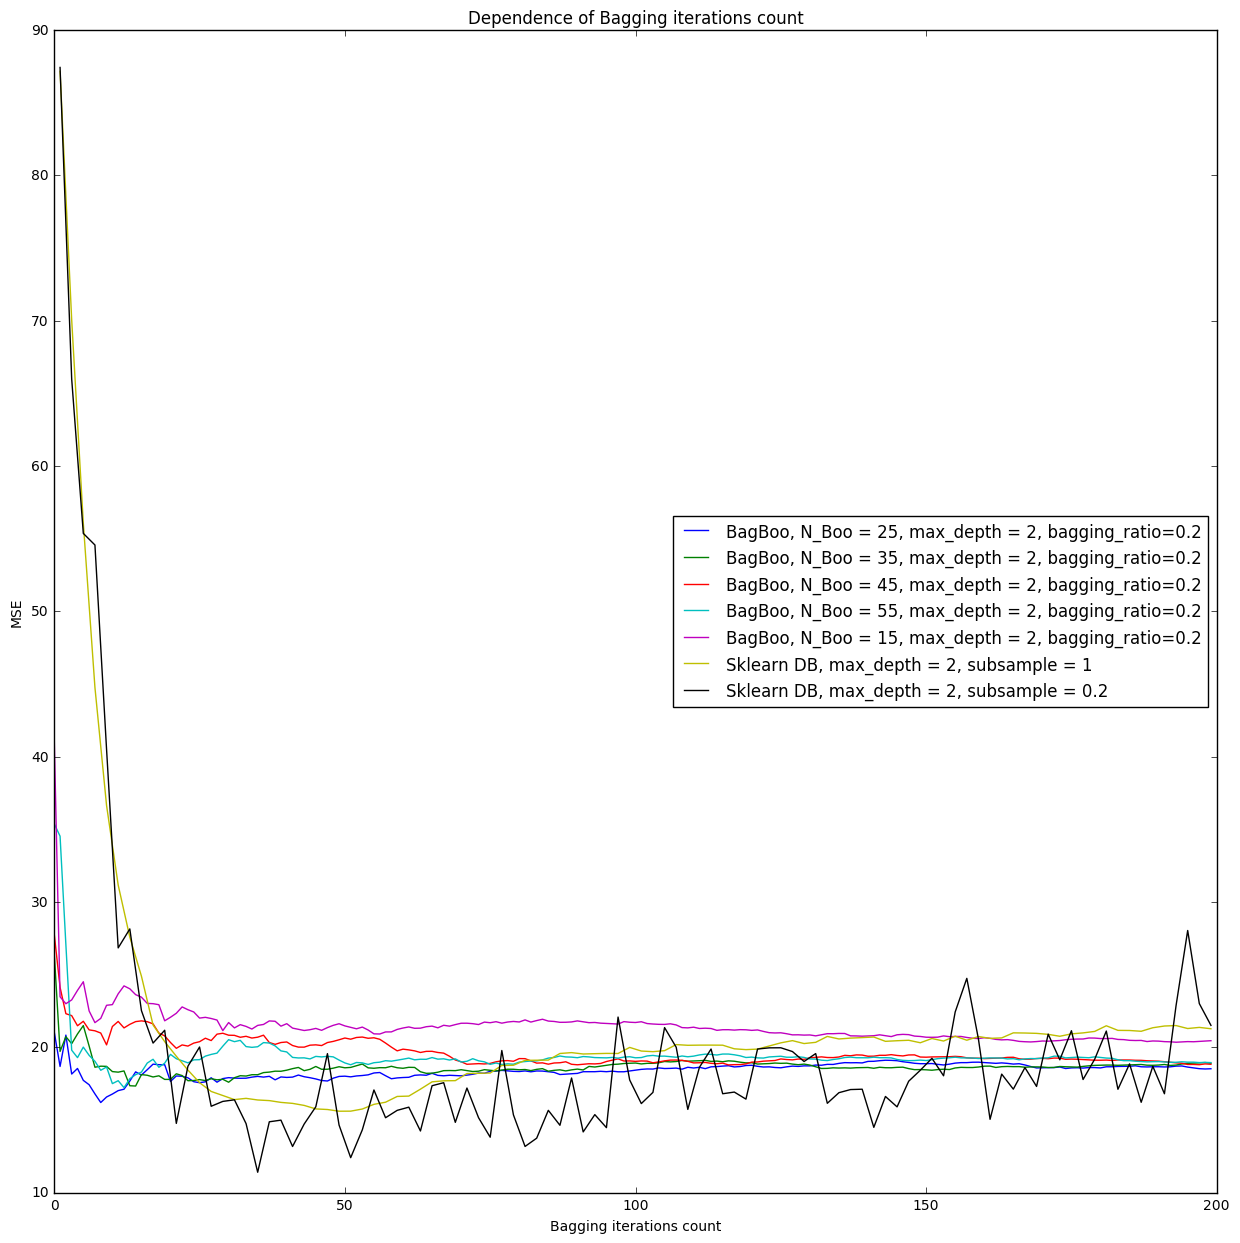

In [47]:
fig, ax = plt.subplots(figsize = (15, 15))
for k in error_stat_2.keys():
    
    plt.plot(range(0, 200), error_stat_2[k], label='BagBoo, N_Boo = ' + str(k) + \
                                                 ', max_depth = 2, bagging_ratio=0.2')
    
plt.plot(boo_list, skl_error, label='Sklearn DB, max_depth = 2, subsample = 1')
plt.plot(boo_list, skl_error_sub, label='Sklearn DB, max_depth = 2, subsample = 0.2')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')

In [48]:
error_stat_3  ={}
error_stat_3[15] = BagBoo(n_boo= 15, n_bag= 200, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_3[25] = BagBoo(n_boo= 25, n_bag= 200, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

error_stat_3[35] = BagBoo(n_boo= 35, n_bag= 200, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_3[45] = BagBoo(n_boo= 45, n_bag= 200, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)
error_stat_3[55] = BagBoo(n_boo= 55, n_bag= 200, max_depth=3, bagging_ratio=0.2).fit(avto_train_data,\
                                                                                   avto_train_target, \
                                                                                  verbose = 1, \
                                                                                    X_test = avto_test_data, \
                                                                                  Y_test= avto_test_target)

Iteration of bagging:1/200

MSE on test Dataset: 24.7691491657 Iteration of Bagging: 0 / 200


Iteration of bagging:2/200

MSE on test Dataset: 27.7449300974 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 24.0343183179 Iteration of Bagging: 2 / 200


Iteration of bagging:4/200

MSE on test Dataset: 23.5571709154 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 23.1726034478 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 21.3552053622 Iteration of Bagging: 5 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.79548160786

MSE on test Dataset: 21.7420211161 Iteration of Bagging: 6 / 200


Learning estimator number: 2/15; MSE error on train dataset: 5.25879966452

MSE on test Dataset: 20.8236685432 Iteration of Bagging: 7 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.10244497189

MSE on test Dataset: 20.4826500263 Iteration of Bagging: 8 / 200


Iteration of bagging:10/200

MSE on test Dataset: 20.0647982444 Iteration of Bagging: 9 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.04683870995

MSE on test Dataset: 20.5805852949 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 20.31470284 Iteration of Bagging: 11 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.25370102351

MSE on test Dataset: 20.7922418492 Iteration of Bagging: 12 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.95842647696

MSE on test Dataset: 19.548691248 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 18.8429873468 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 18.6184149257 Iteration of Bagging: 15 / 200


Learning estimator number: 3/15; MSE error on train dataset: 1.9559761084

MSE on test Dataset: 18.5116150981 Iteration of Bagging: 16 / 200


Iteration of bagging:18/200

MSE on test Dataset: 19.0763803154 Iteration of Bagging: 17 / 200


Iteration of bagging:19/200

MSE on test Dataset: 19.7563126018 Iteration of Bagging: 18 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.51358734969

MSE on test Dataset: 20.0961608781 Iteration of Bagging: 19 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.48826425576

MSE on test Dataset: 19.7485240077 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 19.9332821683 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 19.9122594655 Iteration of Bagging: 22 / 200


Learning estimator number: 2/15; MSE error on train dataset: 5.49215408613

MSE on test Dataset: 19.8698532953 Iteration of Bagging: 23 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.42829036454

MSE on test Dataset: 19.3390401106 Iteration of Bagging: 24 / 200


Iteration of bagging:26/200

MSE on test Dataset: 19.2676271876 Iteration of Bagging: 25 / 200


Learning estimator number: 2/15; MSE error on train dataset: 6.41731452451

MSE on test Dataset: 18.9397567338 Iteration of Bagging: 26 / 200


Iteration of bagging:28/200

MSE on test Dataset: 19.1547151595 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 19.1668325162 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 19.2321133216 Iteration of Bagging: 29 / 200


Learning estimator number: 5/15; MSE error on train dataset: 3.34081313887

MSE on test Dataset: 19.2640521168 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 19.0307423928 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 19.0982758181 Iteration of Bagging: 32 / 200


Iteration of bagging:34/200

MSE on test Dataset: 19.0899795025 Iteration of Bagging: 33 / 200


Iteration of bagging:35/200

MSE on test Dataset: 18.9893064997 Iteration of Bagging: 34 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.1570304928

MSE on test Dataset: 18.8874752308 Iteration of Bagging: 35 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.894195816

MSE on test Dataset: 19.0031971611 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 18.9855890592 Iteration of Bagging: 37 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.91027802484

MSE on test Dataset: 19.0009536701 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 19.137512842 Iteration of Bagging: 39 / 200


Iteration of bagging:41/200

MSE on test Dataset: 19.119692946 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 18.9199975533 Iteration of Bagging: 41 / 200


Learning estimator number: 2/15; MSE error on train dataset: 2.65653326973

MSE on test Dataset: 19.0553417906 Iteration of Bagging: 42 / 200


Learning estimator number: 4/15; MSE error on train dataset: 2.30773724155

MSE on test Dataset: 19.1350193471 Iteration of Bagging: 43 / 200


Iteration of bagging:45/200

MSE on test Dataset: 19.5456917086 Iteration of Bagging: 44 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.96691789085

MSE on test Dataset: 19.5898363509 Iteration of Bagging: 45 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.44423397709

MSE on test Dataset: 19.5140234714 Iteration of Bagging: 46 / 200


Learning estimator number: 2/15; MSE error on train dataset: 7.081197833

MSE on test Dataset: 19.3843881968 Iteration of Bagging: 47 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.87682991194

MSE on test Dataset: 19.0383917433 Iteration of Bagging: 48 / 200


Learning estimator number: 4/15; MSE error on train dataset: 3.83531430495

MSE on test Dataset: 18.9555633033 Iteration of Bagging: 49 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.68239820929

MSE on test Dataset: 18.7082025587 Iteration of Bagging: 50 / 200


Iteration of bagging:52/200

MSE on test Dataset: 18.9015943918 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 18.8294250104 Iteration of Bagging: 52 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.06943395018

MSE on test Dataset: 18.8768557322 Iteration of Bagging: 53 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.9740462451

MSE on test Dataset: 19.0179379126 Iteration of Bagging: 54 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.10045225848

MSE on test Dataset: 19.1148752027 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 18.8882737391 Iteration of Bagging: 56 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.53968039333

MSE on test Dataset: 19.156414576 Iteration of Bagging: 57 / 200


Learning estimator number: 14/15; MSE error on train dataset: 1.64493083862

MSE on test Dataset: 18.9808316966 Iteration of Bagging: 58 / 200


Iteration of bagging:60/200

MSE on test Dataset: 19.1839764498 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 18.9659889338 Iteration of Bagging: 60 / 200


Learning estimator number: 14/15; MSE error on train dataset: 2.19854441456

MSE on test Dataset: 18.9254599767 Iteration of Bagging: 61 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.68841488094

MSE on test Dataset: 18.8972291243 Iteration of Bagging: 62 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.82767368587

MSE on test Dataset: 18.7988789803 Iteration of Bagging: 63 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.90968963714

MSE on test Dataset: 18.4262309685 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 18.6103171654 Iteration of Bagging: 65 / 200


Iteration of bagging:67/200

MSE on test Dataset: 19.112502091 Iteration of Bagging: 66 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.44150561443

MSE on test Dataset: 19.1172685058 Iteration of Bagging: 67 / 200


Iteration of bagging:69/200

MSE on test Dataset: 19.166013837 Iteration of Bagging: 68 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.05831177133

MSE on test Dataset: 19.2461184431 Iteration of Bagging: 69 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.14960402633

MSE on test Dataset: 19.1194045743 Iteration of Bagging: 70 / 200


Learning estimator number: 2/15; MSE error on train dataset: 5.28183330974

MSE on test Dataset: 19.3016499495 Iteration of Bagging: 71 / 200


Iteration of bagging:73/200

MSE on test Dataset: 19.1208022746 Iteration of Bagging: 72 / 200


Learning estimator number: 2/15; MSE error on train dataset: 2.40667757523

MSE on test Dataset: 19.2090934484 Iteration of Bagging: 73 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.55830115923

MSE on test Dataset: 19.387000605 Iteration of Bagging: 74 / 200


Iteration of bagging:76/200

MSE on test Dataset: 19.1319758711 Iteration of Bagging: 75 / 200


Learning estimator number: 3/15; MSE error on train dataset: 2.62085746783

MSE on test Dataset: 19.0008556202 Iteration of Bagging: 76 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.28446983546

MSE on test Dataset: 19.0391923912 Iteration of Bagging: 77 / 200


Iteration of bagging:79/200

MSE on test Dataset: 19.0701550232 Iteration of Bagging: 78 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.26989297007

MSE on test Dataset: 19.1011937659 Iteration of Bagging: 79 / 200


Learning estimator number: 2/15; MSE error on train dataset: 5.02271960589

MSE on test Dataset: 19.0144131673 Iteration of Bagging: 80 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.86416368783

MSE on test Dataset: 19.037814453 Iteration of Bagging: 81 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.11192323573

MSE on test Dataset: 19.0115292398 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 18.9434039179 Iteration of Bagging: 83 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.20497572988

MSE on test Dataset: 18.9589657485 Iteration of Bagging: 84 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.48395066262

MSE on test Dataset: 18.9436753864 Iteration of Bagging: 85 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.36632902977

MSE on test Dataset: 19.059642802 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 18.8822833921 Iteration of Bagging: 87 / 200


Iteration of bagging:89/200

MSE on test Dataset: 18.8987623197 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.9294850069 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 18.9077618528 Iteration of Bagging: 90 / 200


Iteration of bagging:92/200

MSE on test Dataset: 18.9572730114 Iteration of Bagging: 91 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.20070090297

MSE on test Dataset: 19.0019604757 Iteration of Bagging: 92 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.91000946753

MSE on test Dataset: 19.0908266068 Iteration of Bagging: 93 / 200


Iteration of bagging:95/200

MSE on test Dataset: 19.1029877774 Iteration of Bagging: 94 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.94762345622

MSE on test Dataset: 19.1399013857 Iteration of Bagging: 95 / 200


Iteration of bagging:97/200

MSE on test Dataset: 19.099217702 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 19.1202116355 Iteration of Bagging: 97 / 200


Learning estimator number: 1/15; MSE error on train dataset: 5.00575824219

MSE on test Dataset: 19.1821371486 Iteration of Bagging: 98 / 200


Iteration of bagging:100/200

MSE on test Dataset: 19.2386038493 Iteration of Bagging: 99 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.05958825885

MSE on test Dataset: 19.2723791394 Iteration of Bagging: 100 / 200


Iteration of bagging:102/200

MSE on test Dataset: 19.3295611291 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 19.3625951433 Iteration of Bagging: 102 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.89734826981

MSE on test Dataset: 19.4313351871 Iteration of Bagging: 103 / 200


Iteration of bagging:105/200

MSE on test Dataset: 19.3053294966 Iteration of Bagging: 104 / 200


Learning estimator number: 14/15; MSE error on train dataset: 2.05595799551

MSE on test Dataset: 19.1945790801 Iteration of Bagging: 105 / 200


Iteration of bagging:107/200

MSE on test Dataset: 19.3630728927 Iteration of Bagging: 106 / 200


Iteration of bagging:108/200

MSE on test Dataset: 19.3407732718 Iteration of Bagging: 107 / 200


Iteration of bagging:109/200

MSE on test Dataset: 19.4176762254 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 19.3213099758 Iteration of Bagging: 109 / 200


Iteration of bagging:111/200

MSE on test Dataset: 19.2781497031 Iteration of Bagging: 110 / 200


Learning estimator number: 14/15; MSE error on train dataset: 2.52587026164

MSE on test Dataset: 19.2321282357 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 19.335583176 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 19.3970218316 Iteration of Bagging: 113 / 200


Iteration of bagging:115/200

MSE on test Dataset: 19.3501138809 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 19.3201089871 Iteration of Bagging: 115 / 200


Iteration of bagging:117/200

MSE on test Dataset: 19.3303286954 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 19.2298030421 Iteration of Bagging: 117 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.57533564153

MSE on test Dataset: 19.2024966979 Iteration of Bagging: 118 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.4416578367

MSE on test Dataset: 19.2305948906 Iteration of Bagging: 119 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.41290403715

MSE on test Dataset: 19.1959523657 Iteration of Bagging: 120 / 200


Iteration of bagging:122/200

MSE on test Dataset: 19.1030993865 Iteration of Bagging: 121 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.24707703266

MSE on test Dataset: 19.0624626785 Iteration of Bagging: 122 / 200


Iteration of bagging:124/200

MSE on test Dataset: 19.0037720564 Iteration of Bagging: 123 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.38468012342

MSE on test Dataset: 19.1078802876 Iteration of Bagging: 124 / 200


Iteration of bagging:126/200

MSE on test Dataset: 19.0701865617 Iteration of Bagging: 125 / 200


Iteration of bagging:127/200

MSE on test Dataset: 19.1112953633 Iteration of Bagging: 126 / 200


Iteration of bagging:128/200

MSE on test Dataset: 19.0830812238 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 19.1396475843 Iteration of Bagging: 128 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.99724633431

MSE on test Dataset: 19.0658640755 Iteration of Bagging: 129 / 200


Iteration of bagging:131/200

MSE on test Dataset: 19.1263194343 Iteration of Bagging: 130 / 200


Iteration of bagging:132/200

MSE on test Dataset: 19.1757057909 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 19.2110981536 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 19.273751705 Iteration of Bagging: 133 / 200


Learning estimator number: 1/15; MSE error on train dataset: 2.62943913957

MSE on test Dataset: 19.2192904407 Iteration of Bagging: 134 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.35351076769

MSE on test Dataset: 19.3158895567 Iteration of Bagging: 135 / 200


Iteration of bagging:137/200

MSE on test Dataset: 19.2069925995 Iteration of Bagging: 136 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.42004317852

MSE on test Dataset: 19.2434406652 Iteration of Bagging: 137 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.60108890323

MSE on test Dataset: 19.1438243865 Iteration of Bagging: 138 / 200


Learning estimator number: 1/15; MSE error on train dataset: 6.08714373941

MSE on test Dataset: 19.1814167305 Iteration of Bagging: 139 / 200


Iteration of bagging:141/200

MSE on test Dataset: 19.1852660885 Iteration of Bagging: 140 / 200


Iteration of bagging:142/200

MSE on test Dataset: 19.2970459916 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 19.2345328079 Iteration of Bagging: 142 / 200


Iteration of bagging:144/200

MSE on test Dataset: 19.234734151 Iteration of Bagging: 143 / 200


Iteration of bagging:145/200

MSE on test Dataset: 19.2640697816 Iteration of Bagging: 144 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.04176865066

MSE on test Dataset: 19.163767848 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 19.1538916018 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 19.0872781907 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 19.1540140794 Iteration of Bagging: 148 / 200


Iteration of bagging:150/200

MSE on test Dataset: 19.1313053806 Iteration of Bagging: 149 / 200


Iteration of bagging:151/200

MSE on test Dataset: 19.1219619963 Iteration of Bagging: 150 / 200


Iteration of bagging:152/200

MSE on test Dataset: 19.1691773594 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 19.147945995 Iteration of Bagging: 152 / 200


Iteration of bagging:154/200

MSE on test Dataset: 19.1016662335 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 19.1377820259 Iteration of Bagging: 154 / 200


Iteration of bagging:156/200

MSE on test Dataset: 19.2019391674 Iteration of Bagging: 155 / 200


Iteration of bagging:157/200

MSE on test Dataset: 19.2444464887 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 19.274805515 Iteration of Bagging: 157 / 200


Iteration of bagging:159/200

MSE on test Dataset: 19.3209897908 Iteration of Bagging: 158 / 200


Iteration of bagging:160/200

MSE on test Dataset: 19.2813970103 Iteration of Bagging: 159 / 200


Iteration of bagging:161/200

MSE on test Dataset: 19.2613735416 Iteration of Bagging: 160 / 200


Iteration of bagging:162/200

MSE on test Dataset: 19.2567138782 Iteration of Bagging: 161 / 200


Iteration of bagging:163/200

MSE on test Dataset: 19.2961974533 Iteration of Bagging: 162 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.95105345655

MSE on test Dataset: 19.3089686162 Iteration of Bagging: 163 / 200


Iteration of bagging:165/200

MSE on test Dataset: 19.3308834385 Iteration of Bagging: 164 / 200


Iteration of bagging:166/200

MSE on test Dataset: 19.3201157207 Iteration of Bagging: 165 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.28548543414

MSE on test Dataset: 19.3108897806 Iteration of Bagging: 166 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.68602194648

MSE on test Dataset: 19.349490783 Iteration of Bagging: 167 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.1616190919

MSE on test Dataset: 19.3672175774 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 19.3928929647 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 19.4082015379 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 19.3640048686 Iteration of Bagging: 171 / 200


Learning estimator number: 1/15; MSE error on train dataset: 7.03150854288

MSE on test Dataset: 19.3334002095 Iteration of Bagging: 172 / 200


Iteration of bagging:174/200

MSE on test Dataset: 19.2436219323 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 19.2341469965 Iteration of Bagging: 174 / 200


Iteration of bagging:176/200

MSE on test Dataset: 19.2192523399 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 19.2329640743 Iteration of Bagging: 176 / 200


Iteration of bagging:178/200

MSE on test Dataset: 19.198660387 Iteration of Bagging: 177 / 200


Learning estimator number: 14/15; MSE error on train dataset: 1.52959937707

MSE on test Dataset: 19.2140169217 Iteration of Bagging: 178 / 200


Learning estimator number: 14/15; MSE error on train dataset: 2.93093844614

MSE on test Dataset: 19.2262640987 Iteration of Bagging: 179 / 200


Iteration of bagging:181/200

MSE on test Dataset: 19.1684732255 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 19.2157269712 Iteration of Bagging: 181 / 200


Iteration of bagging:183/200

MSE on test Dataset: 19.2266528558 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 19.2327593754 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 19.2847082594 Iteration of Bagging: 184 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.18541508563

MSE on test Dataset: 19.2497503636 Iteration of Bagging: 185 / 200


Learning estimator number: 2/15; MSE error on train dataset: 3.93522286077

MSE on test Dataset: 19.2771470876 Iteration of Bagging: 186 / 200


Learning estimator number: 1/15; MSE error on train dataset: 3.86875654014

MSE on test Dataset: 19.3136913653 Iteration of Bagging: 187 / 200


Iteration of bagging:189/200

MSE on test Dataset: 19.3730831662 Iteration of Bagging: 188 / 200


Learning estimator number: 14/15; MSE error on train dataset: 2.0790533201

MSE on test Dataset: 19.3529170879 Iteration of Bagging: 189 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.40108912893

MSE on test Dataset: 19.3202496798 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 19.3481207947 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 19.334589786 Iteration of Bagging: 192 / 200


Learning estimator number: 1/15; MSE error on train dataset: 4.3890924026

MSE on test Dataset: 19.3198454577 Iteration of Bagging: 193 / 200


Learning estimator number: 2/15; MSE error on train dataset: 4.89448031189

MSE on test Dataset: 19.3666178795 Iteration of Bagging: 194 / 200


Iteration of bagging:196/200

MSE on test Dataset: 19.3172989512 Iteration of Bagging: 195 / 200


Iteration of bagging:197/200

MSE on test Dataset: 19.3520432729 Iteration of Bagging: 196 / 200


Iteration of bagging:198/200

MSE on test Dataset: 19.3837749948 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 19.3601598128 Iteration of Bagging: 198 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.38590055259

MSE on test Dataset: 19.2590859848 Iteration of Bagging: 199 / 200


Iteration of bagging:1/200

MSE on test Dataset: 23.3682759078 Iteration of Bagging: 0 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.46927192723

MSE on test Dataset: 20.1589182736 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 17.3307619798 Iteration of Bagging: 2 / 200


Iteration of bagging:4/200

MSE on test Dataset: 19.3591254376 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 17.4102034778 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 18.3078154596 Iteration of Bagging: 5 / 200


Iteration of bagging:7/200

MSE on test Dataset: 19.4190950305 Iteration of Bagging: 6 / 200


Iteration of bagging:8/200

MSE on test Dataset: 18.9272347434 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 18.7286032829 Iteration of Bagging: 8 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.6981739143

MSE on test Dataset: 18.633983935 Iteration of Bagging: 9 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.36687716058

MSE on test Dataset: 18.5619901502 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 18.9142039501 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 19.5368481747 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 19.4464177935 Iteration of Bagging: 13 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.41247984882

MSE on test Dataset: 18.849105174 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 18.7781673379 Iteration of Bagging: 15 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.72994609801

MSE on test Dataset: 18.9423852565 Iteration of Bagging: 16 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.91241343296

MSE on test Dataset: 18.6010942436 Iteration of Bagging: 17 / 200


Iteration of bagging:19/200

MSE on test Dataset: 19.0300819829 Iteration of Bagging: 18 / 200


Iteration of bagging:20/200

MSE on test Dataset: 19.010536687 Iteration of Bagging: 19 / 200


Learning estimator number: 4/25; MSE error on train dataset: 4.18483729622

MSE on test Dataset: 18.7808910695 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 18.0833030548 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 18.0575908141 Iteration of Bagging: 22 / 200


Learning estimator number: 3/25; MSE error on train dataset: 5.15862596148

MSE on test Dataset: 18.0264927686 Iteration of Bagging: 23 / 200


Iteration of bagging:25/200

MSE on test Dataset: 17.9551017149 Iteration of Bagging: 24 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.15066557629

MSE on test Dataset: 17.6894283433 Iteration of Bagging: 25 / 200


Iteration of bagging:27/200

MSE on test Dataset: 17.7199433185 Iteration of Bagging: 26 / 200


Iteration of bagging:28/200

MSE on test Dataset: 18.2720508839 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 17.744569651 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 17.8331286337 Iteration of Bagging: 29 / 200


Iteration of bagging:31/200

MSE on test Dataset: 18.2248008357 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 17.966795551 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 18.1131966576 Iteration of Bagging: 32 / 200


Iteration of bagging:34/200

MSE on test Dataset: 18.0823900801 Iteration of Bagging: 33 / 200


Iteration of bagging:35/200

MSE on test Dataset: 18.050254844 Iteration of Bagging: 34 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.99840778458

MSE on test Dataset: 17.6068891635 Iteration of Bagging: 35 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.64223210844

MSE on test Dataset: 17.1973330592 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 16.8316095856 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 16.9436219825 Iteration of Bagging: 38 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.05784572555

MSE on test Dataset: 16.9785240359 Iteration of Bagging: 39 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.98222536544

MSE on test Dataset: 16.9313781618 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 17.1436247446 Iteration of Bagging: 41 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.05023429134

MSE on test Dataset: 17.2213783094 Iteration of Bagging: 42 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.96668300269

MSE on test Dataset: 17.0649735154 Iteration of Bagging: 43 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.0130371096

MSE on test Dataset: 17.0935501976 Iteration of Bagging: 44 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.37821088161

MSE on test Dataset: 17.2382669155 Iteration of Bagging: 45 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.16523222266

MSE on test Dataset: 17.3924877391 Iteration of Bagging: 46 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.34684460435

MSE on test Dataset: 17.4132666561 Iteration of Bagging: 47 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.85624865968

MSE on test Dataset: 17.1745003036 Iteration of Bagging: 48 / 200


Iteration of bagging:50/200

MSE on test Dataset: 17.099473981 Iteration of Bagging: 49 / 200


Iteration of bagging:51/200

MSE on test Dataset: 17.2549700269 Iteration of Bagging: 50 / 200


Iteration of bagging:52/200

MSE on test Dataset: 17.4352324638 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 17.5155010253 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 17.4987031189 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 17.3454685645 Iteration of Bagging: 54 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.55401033097

MSE on test Dataset: 17.4129516103 Iteration of Bagging: 55 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.28528013891

MSE on test Dataset: 17.5255099171 Iteration of Bagging: 56 / 200


Iteration of bagging:58/200

MSE on test Dataset: 17.4549457982 Iteration of Bagging: 57 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.00601776532

MSE on test Dataset: 17.4778756123 Iteration of Bagging: 58 / 200


Iteration of bagging:60/200

MSE on test Dataset: 17.4765025147 Iteration of Bagging: 59 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.71642084438

MSE on test Dataset: 17.5181993684 Iteration of Bagging: 60 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.58077606329

MSE on test Dataset: 17.503992755 Iteration of Bagging: 61 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.13956511272

MSE on test Dataset: 17.4620591624 Iteration of Bagging: 62 / 200


Iteration of bagging:64/200

MSE on test Dataset: 17.2099546399 Iteration of Bagging: 63 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.61427642958

MSE on test Dataset: 17.4498725946 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 17.52773023 Iteration of Bagging: 65 / 200


Iteration of bagging:67/200

MSE on test Dataset: 17.7322338681 Iteration of Bagging: 66 / 200


Iteration of bagging:68/200

MSE on test Dataset: 17.8116653288 Iteration of Bagging: 67 / 200


Learning estimator number: 3/25; MSE error on train dataset: 3.92365256023

MSE on test Dataset: 17.8666580352 Iteration of Bagging: 68 / 200


Learning estimator number: 3/25; MSE error on train dataset: 5.14499599711

MSE on test Dataset: 17.8392023706 Iteration of Bagging: 69 / 200


Iteration of bagging:71/200

MSE on test Dataset: 17.9498130193 Iteration of Bagging: 70 / 200


Iteration of bagging:72/200

MSE on test Dataset: 17.7940819716 Iteration of Bagging: 71 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.65934626806

MSE on test Dataset: 17.8086224936 Iteration of Bagging: 72 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.97276484946

MSE on test Dataset: 17.8296635629 Iteration of Bagging: 73 / 200


Learning estimator number: 4/25; MSE error on train dataset: 4.80208024096

MSE on test Dataset: 17.8342048038 Iteration of Bagging: 74 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.60679805992

MSE on test Dataset: 17.7597112673 Iteration of Bagging: 75 / 200


Iteration of bagging:77/200

MSE on test Dataset: 17.8121397402 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 17.7824335747 Iteration of Bagging: 77 / 200


Iteration of bagging:79/200

MSE on test Dataset: 17.877317951 Iteration of Bagging: 78 / 200


Iteration of bagging:80/200

MSE on test Dataset: 17.7535800482 Iteration of Bagging: 79 / 200


Iteration of bagging:81/200

MSE on test Dataset: 17.8978760812 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 17.8200039914 Iteration of Bagging: 81 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.25588139906

MSE on test Dataset: 17.6524552577 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 17.6750045501 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 17.8283909808 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 17.887293419 Iteration of Bagging: 85 / 200


Iteration of bagging:87/200

MSE on test Dataset: 17.9176245314 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 18.1036559704 Iteration of Bagging: 87 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.95947974416

MSE on test Dataset: 18.1818612448 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.1625287535 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 18.2082296216 Iteration of Bagging: 90 / 200


Iteration of bagging:92/200

MSE on test Dataset: 18.2241790007 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 18.0971232527 Iteration of Bagging: 92 / 200


Iteration of bagging:94/200

MSE on test Dataset: 18.1683487462 Iteration of Bagging: 93 / 200


Learning estimator number: 2/25; MSE error on train dataset: 4.52110576787

MSE on test Dataset: 18.1729142238 Iteration of Bagging: 94 / 200


Iteration of bagging:96/200

MSE on test Dataset: 17.9767502703 Iteration of Bagging: 95 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.10876014005

MSE on test Dataset: 18.0597577873 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 18.1503118129 Iteration of Bagging: 97 / 200


Iteration of bagging:99/200

MSE on test Dataset: 18.1471030755 Iteration of Bagging: 98 / 200


Learning estimator number: 2/25; MSE error on train dataset: 4.36406591209

MSE on test Dataset: 18.2467681449 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 18.2646367976 Iteration of Bagging: 100 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.3217978023

MSE on test Dataset: 18.296570993 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 18.2385055782 Iteration of Bagging: 102 / 200


Learning estimator number: 1/25; MSE error on train dataset: 7.6676541913

MSE on test Dataset: 18.2921829277 Iteration of Bagging: 103 / 200


Iteration of bagging:105/200

MSE on test Dataset: 18.3407126011 Iteration of Bagging: 104 / 200


Iteration of bagging:106/200

MSE on test Dataset: 18.4179016094 Iteration of Bagging: 105 / 200


Iteration of bagging:107/200

MSE on test Dataset: 18.4271437034 Iteration of Bagging: 106 / 200


Iteration of bagging:108/200

MSE on test Dataset: 18.3605512833 Iteration of Bagging: 107 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.9433360717

MSE on test Dataset: 18.3171731917 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 18.3726411163 Iteration of Bagging: 109 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.38535658028

MSE on test Dataset: 18.4029788888 Iteration of Bagging: 110 / 200


Iteration of bagging:112/200

MSE on test Dataset: 18.4598449449 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 18.4888690048 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 18.4271486181 Iteration of Bagging: 113 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.58837128174

MSE on test Dataset: 18.4556773882 Iteration of Bagging: 114 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.23306111673

MSE on test Dataset: 18.594061211 Iteration of Bagging: 115 / 200


Iteration of bagging:117/200

MSE on test Dataset: 18.492599935 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 18.3151449023 Iteration of Bagging: 117 / 200


Iteration of bagging:119/200

MSE on test Dataset: 18.3818774925 Iteration of Bagging: 118 / 200


Iteration of bagging:120/200

MSE on test Dataset: 18.2315356065 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 18.2410855468 Iteration of Bagging: 120 / 200


Iteration of bagging:122/200

MSE on test Dataset: 18.2322811302 Iteration of Bagging: 121 / 200


Iteration of bagging:123/200

MSE on test Dataset: 18.2740739851 Iteration of Bagging: 122 / 200


Iteration of bagging:124/200

MSE on test Dataset: 18.3065647567 Iteration of Bagging: 123 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.96503044473

MSE on test Dataset: 18.3037771242 Iteration of Bagging: 124 / 200


Iteration of bagging:126/200

MSE on test Dataset: 18.226169448 Iteration of Bagging: 125 / 200


Iteration of bagging:127/200

MSE on test Dataset: 18.2399049202 Iteration of Bagging: 126 / 200


Iteration of bagging:128/200

MSE on test Dataset: 18.2544840392 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 18.2914182145 Iteration of Bagging: 128 / 200


Learning estimator number: 1/25; MSE error on train dataset: 2.80044577038

MSE on test Dataset: 18.3109321249 Iteration of Bagging: 129 / 200


Iteration of bagging:131/200

MSE on test Dataset: 18.3833797507 Iteration of Bagging: 130 / 200


Iteration of bagging:132/200

MSE on test Dataset: 18.3347028079 Iteration of Bagging: 131 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.92807734126

MSE on test Dataset: 18.3849940718 Iteration of Bagging: 132 / 200


Learning estimator number: 3/25; MSE error on train dataset: 4.41937016661

MSE on test Dataset: 18.33590368 Iteration of Bagging: 133 / 200


Iteration of bagging:135/200

MSE on test Dataset: 18.3230341887 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 18.2008139953 Iteration of Bagging: 135 / 200


Iteration of bagging:137/200

MSE on test Dataset: 18.2556021301 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 18.2400757861 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 18.2022503093 Iteration of Bagging: 138 / 200


Iteration of bagging:140/200

MSE on test Dataset: 18.2738952495 Iteration of Bagging: 139 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.14448361683

MSE on test Dataset: 18.2585161116 Iteration of Bagging: 140 / 200


Iteration of bagging:142/200

MSE on test Dataset: 18.236922354 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 18.2450584515 Iteration of Bagging: 142 / 200


Learning estimator number: 1/25; MSE error on train dataset: 3.92666475405

MSE on test Dataset: 18.2520993674 Iteration of Bagging: 143 / 200


Iteration of bagging:145/200

MSE on test Dataset: 18.2335791399 Iteration of Bagging: 144 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.64563485809

MSE on test Dataset: 18.1687692851 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 18.1702814115 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 18.234909145 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 18.2371351177 Iteration of Bagging: 148 / 200


Iteration of bagging:150/200

MSE on test Dataset: 18.2662492115 Iteration of Bagging: 149 / 200


Iteration of bagging:151/200

MSE on test Dataset: 18.2851238455 Iteration of Bagging: 150 / 200


Iteration of bagging:152/200

MSE on test Dataset: 18.3088020566 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 18.2778846629 Iteration of Bagging: 152 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.02967861189

MSE on test Dataset: 18.3169177464 Iteration of Bagging: 153 / 200


Learning estimator number: 1/25; MSE error on train dataset: 6.22600919293

MSE on test Dataset: 18.2751721562 Iteration of Bagging: 154 / 200


Iteration of bagging:156/200

MSE on test Dataset: 18.2331675398 Iteration of Bagging: 155 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.67215956895

MSE on test Dataset: 18.265558901 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 18.3092165241 Iteration of Bagging: 157 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.31577745471

MSE on test Dataset: 18.3032769077 Iteration of Bagging: 158 / 200


Iteration of bagging:160/200

MSE on test Dataset: 18.2477218982 Iteration of Bagging: 159 / 200


Learning estimator number: 2/25; MSE error on train dataset: 5.13037297558

MSE on test Dataset: 18.2896477219 Iteration of Bagging: 160 / 200


Learning estimator number: 3/25; MSE error on train dataset: 3.50777347653

MSE on test Dataset: 18.3110583095 Iteration of Bagging: 161 / 200


Iteration of bagging:163/200

MSE on test Dataset: 18.368123166 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 18.3670503844 Iteration of Bagging: 163 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.64947852541

MSE on test Dataset: 18.3802763408 Iteration of Bagging: 164 / 200


Iteration of bagging:166/200

MSE on test Dataset: 18.3969981805 Iteration of Bagging: 165 / 200


Learning estimator number: 1/25; MSE error on train dataset: 5.0976943882

MSE on test Dataset: 18.4030901675 Iteration of Bagging: 166 / 200


Learning estimator number: 3/25; MSE error on train dataset: 3.99898763917

MSE on test Dataset: 18.4126973756 Iteration of Bagging: 167 / 200


Learning estimator number: 2/25; MSE error on train dataset: 3.66565913161

MSE on test Dataset: 18.4135050642 Iteration of Bagging: 168 / 200


Learning estimator number: 2/25; MSE error on train dataset: 2.72271772608

MSE on test Dataset: 18.393341443 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 18.3952134471 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 18.4149752059 Iteration of Bagging: 171 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.2771383247

MSE on test Dataset: 18.4526460503 Iteration of Bagging: 172 / 200


Learning estimator number: 4/25; MSE error on train dataset: 3.98358954632

MSE on test Dataset: 18.4552841567 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 18.4878673756 Iteration of Bagging: 174 / 200


Learning estimator number: 24/25; MSE error on train dataset: 0.765172224278

MSE on test Dataset: 18.5126655374 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 18.5415827078 Iteration of Bagging: 176 / 200


Learning estimator number: 2/25; MSE error on train dataset: 4.38912436532

MSE on test Dataset: 18.5675863909 Iteration of Bagging: 177 / 200


Iteration of bagging:179/200

MSE on test Dataset: 18.5810443151 Iteration of Bagging: 178 / 200


Iteration of bagging:180/200

MSE on test Dataset: 18.5295201476 Iteration of Bagging: 179 / 200


Iteration of bagging:181/200

MSE on test Dataset: 18.5618236723 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 18.6263186305 Iteration of Bagging: 181 / 200


Iteration of bagging:183/200

MSE on test Dataset: 18.6399332272 Iteration of Bagging: 182 / 200


Learning estimator number: 1/25; MSE error on train dataset: 4.60675333319

MSE on test Dataset: 18.6660566343 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 18.6397298366 Iteration of Bagging: 184 / 200


Learning estimator number: 24/25; MSE error on train dataset: 1.21177487549

MSE on test Dataset: 18.63210993 Iteration of Bagging: 185 / 200


Iteration of bagging:187/200

MSE on test Dataset: 18.5789069297 Iteration of Bagging: 186 / 200


Learning estimator number: 2/25; MSE error on train dataset: 6.30087735722

MSE on test Dataset: 18.595326333 Iteration of Bagging: 187 / 200


Learning estimator number: 4/25; MSE error on train dataset: 7.11953211592

MSE on test Dataset: 18.6397941913 Iteration of Bagging: 188 / 200


Iteration of bagging:190/200

MSE on test Dataset: 18.6266339477 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 18.6494403161 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 18.6873051292 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 18.7060350403 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 18.7363313021 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 18.6277546362 Iteration of Bagging: 194 / 200


Iteration of bagging:196/200

MSE on test Dataset: 18.6389617162 Iteration of Bagging: 195 / 200


Iteration of bagging:197/200

MSE on test Dataset: 18.6684398934 Iteration of Bagging: 196 / 200


Iteration of bagging:198/200

MSE on test Dataset: 18.7034431525 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.7288603586 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 18.627021242 Iteration of Bagging: 199 / 200


Learning estimator number: 2/35; MSE error on train dataset: 5.35745403784

MSE on test Dataset: 32.4373402338 Iteration of Bagging: 0 / 200


Learning estimator number: 34/35; MSE error on train dataset: 1.20206979873

MSE on test Dataset: 24.6840421019 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 21.6380514815 Iteration of Bagging: 2 / 200


Iteration of bagging:4/200

MSE on test Dataset: 21.4468601166 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 21.3177604652 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 19.8838024954 Iteration of Bagging: 5 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.26884297845

MSE on test Dataset: 19.861598834 Iteration of Bagging: 6 / 200


Learning estimator number: 1/35; MSE error on train dataset: 5.16194383488

MSE on test Dataset: 18.9173454487 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 19.2991619501 Iteration of Bagging: 8 / 200


Iteration of bagging:10/200

MSE on test Dataset: 18.3583409305 Iteration of Bagging: 9 / 200


Iteration of bagging:11/200

MSE on test Dataset: 17.2842212577 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 17.5263465325 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 18.6249310984 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 19.2356450075 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 19.4162242575 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 19.4724663214 Iteration of Bagging: 15 / 200


Iteration of bagging:17/200

MSE on test Dataset: 19.6443804406 Iteration of Bagging: 16 / 200


Learning estimator number: 1/35; MSE error on train dataset: 3.64135594745

MSE on test Dataset: 18.988812972 Iteration of Bagging: 17 / 200


Iteration of bagging:19/200

MSE on test Dataset: 18.8153831954 Iteration of Bagging: 18 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.05184559654

MSE on test Dataset: 19.2572601365 Iteration of Bagging: 19 / 200


Iteration of bagging:21/200

MSE on test Dataset: 19.4909008 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 19.9384327526 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 20.1077438682 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 20.0381086076 Iteration of Bagging: 23 / 200


Iteration of bagging:25/200

MSE on test Dataset: 19.3733887888 Iteration of Bagging: 24 / 200


Iteration of bagging:26/200

MSE on test Dataset: 18.9510557245 Iteration of Bagging: 25 / 200


Iteration of bagging:27/200

MSE on test Dataset: 18.9600100918 Iteration of Bagging: 26 / 200


Iteration of bagging:28/200

MSE on test Dataset: 18.8627672123 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 18.9853080509 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 19.0959958641 Iteration of Bagging: 29 / 200


Learning estimator number: 34/35; MSE error on train dataset: 0.815362649335

MSE on test Dataset: 19.6017280968 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 19.7916503941 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 19.9825561174 Iteration of Bagging: 32 / 200


Iteration of bagging:34/200

MSE on test Dataset: 19.8110737093 Iteration of Bagging: 33 / 200


Learning estimator number: 2/35; MSE error on train dataset: 3.84721999684

MSE on test Dataset: 19.6224693873 Iteration of Bagging: 34 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.28682529

MSE on test Dataset: 19.0814831162 Iteration of Bagging: 35 / 200


Learning estimator number: 3/35; MSE error on train dataset: 4.2787918162

MSE on test Dataset: 19.0815017089 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 18.8402214704 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 19.006146497 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 19.2011335916 Iteration of Bagging: 39 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.22768818519

MSE on test Dataset: 19.0926331081 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 18.5687958889 Iteration of Bagging: 41 / 200


Iteration of bagging:43/200

MSE on test Dataset: 18.8113000882 Iteration of Bagging: 42 / 200


Iteration of bagging:44/200

MSE on test Dataset: 18.9270137082 Iteration of Bagging: 43 / 200


Learning estimator number: 4/35; MSE error on train dataset: 2.40011971521

MSE on test Dataset: 18.864657202 Iteration of Bagging: 44 / 200


Learning estimator number: 1/35; MSE error on train dataset: 6.15367421114

MSE on test Dataset: 18.9492277261 Iteration of Bagging: 45 / 200


Learning estimator number: 1/35; MSE error on train dataset: 5.67316275992

MSE on test Dataset: 18.9342727389 Iteration of Bagging: 46 / 200


Iteration of bagging:48/200

MSE on test Dataset: 19.1197211173 Iteration of Bagging: 47 / 200


Iteration of bagging:49/200

MSE on test Dataset: 19.2792000191 Iteration of Bagging: 48 / 200


Iteration of bagging:50/200

MSE on test Dataset: 19.3862718159 Iteration of Bagging: 49 / 200


Iteration of bagging:51/200

MSE on test Dataset: 19.446226128 Iteration of Bagging: 50 / 200


Iteration of bagging:52/200

MSE on test Dataset: 19.2951181658 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 19.4459367094 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 19.3881168711 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 18.9942877977 Iteration of Bagging: 54 / 200


Iteration of bagging:56/200

MSE on test Dataset: 18.7961853898 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 18.7370216159 Iteration of Bagging: 56 / 200


Iteration of bagging:58/200

MSE on test Dataset: 18.9377955029 Iteration of Bagging: 57 / 200


Iteration of bagging:59/200

MSE on test Dataset: 18.7911183818 Iteration of Bagging: 58 / 200


Learning estimator number: 34/35; MSE error on train dataset: 1.10171720119

MSE on test Dataset: 18.9046062358 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 18.9008109772 Iteration of Bagging: 60 / 200


Iteration of bagging:62/200

MSE on test Dataset: 18.8645503417 Iteration of Bagging: 61 / 200


Learning estimator number: 1/35; MSE error on train dataset: 6.40906621574

MSE on test Dataset: 19.0117883985 Iteration of Bagging: 62 / 200


Iteration of bagging:64/200

MSE on test Dataset: 19.0525207559 Iteration of Bagging: 63 / 200


Learning estimator number: 1/35; MSE error on train dataset: 5.37395933666

MSE on test Dataset: 18.9878764118 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 18.9723919115 Iteration of Bagging: 65 / 200


Iteration of bagging:67/200

MSE on test Dataset: 18.787455543 Iteration of Bagging: 66 / 200


Iteration of bagging:68/200

MSE on test Dataset: 18.671577076 Iteration of Bagging: 67 / 200


Iteration of bagging:69/200

MSE on test Dataset: 18.5654275079 Iteration of Bagging: 68 / 200


Iteration of bagging:70/200

MSE on test Dataset: 18.6945534987 Iteration of Bagging: 69 / 200


Iteration of bagging:71/200

MSE on test Dataset: 18.7502814601 Iteration of Bagging: 70 / 200


Iteration of bagging:72/200

MSE on test Dataset: 18.7124371808 Iteration of Bagging: 71 / 200


Iteration of bagging:73/200

MSE on test Dataset: 18.7255873377 Iteration of Bagging: 72 / 200


Iteration of bagging:74/200

MSE on test Dataset: 18.7120467361 Iteration of Bagging: 73 / 200


Iteration of bagging:75/200

MSE on test Dataset: 18.7357553025 Iteration of Bagging: 74 / 200


Iteration of bagging:76/200

MSE on test Dataset: 18.6225080077 Iteration of Bagging: 75 / 200


Iteration of bagging:77/200

MSE on test Dataset: 18.7383198443 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 18.7831782153 Iteration of Bagging: 77 / 200


Iteration of bagging:79/200

MSE on test Dataset: 18.8559260505 Iteration of Bagging: 78 / 200


Iteration of bagging:80/200

MSE on test Dataset: 18.9498111433 Iteration of Bagging: 79 / 200


Iteration of bagging:81/200

MSE on test Dataset: 18.8439115305 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 18.9210339204 Iteration of Bagging: 81 / 200


Iteration of bagging:83/200

MSE on test Dataset: 18.9375613782 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 18.8871969295 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 18.9909060794 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 19.0114483866 Iteration of Bagging: 85 / 200


Iteration of bagging:87/200

MSE on test Dataset: 18.9426636924 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 19.0007764368 Iteration of Bagging: 87 / 200


Iteration of bagging:89/200

MSE on test Dataset: 19.0537015599 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.9811611929 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 18.996815572 Iteration of Bagging: 90 / 200


Iteration of bagging:92/200

MSE on test Dataset: 18.9548116225 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 18.8524705786 Iteration of Bagging: 92 / 200


Iteration of bagging:94/200

MSE on test Dataset: 18.9194920166 Iteration of Bagging: 93 / 200


Iteration of bagging:95/200

MSE on test Dataset: 18.9057822161 Iteration of Bagging: 94 / 200


Iteration of bagging:96/200

MSE on test Dataset: 18.9079402457 Iteration of Bagging: 95 / 200


Iteration of bagging:97/200

MSE on test Dataset: 18.8806615331 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 18.7703736475 Iteration of Bagging: 97 / 200


Iteration of bagging:99/200

MSE on test Dataset: 18.7137215122 Iteration of Bagging: 98 / 200


Iteration of bagging:100/200

MSE on test Dataset: 18.6696318903 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 18.7024021035 Iteration of Bagging: 100 / 200


Iteration of bagging:102/200

MSE on test Dataset: 18.5773978988 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 18.489170734 Iteration of Bagging: 102 / 200


Iteration of bagging:104/200

MSE on test Dataset: 18.5836457198 Iteration of Bagging: 103 / 200


Iteration of bagging:105/200

MSE on test Dataset: 18.4601050149 Iteration of Bagging: 104 / 200


Iteration of bagging:106/200

MSE on test Dataset: 18.5494705746 Iteration of Bagging: 105 / 200


Iteration of bagging:107/200

MSE on test Dataset: 18.5375948626 Iteration of Bagging: 106 / 200


Iteration of bagging:108/200

MSE on test Dataset: 18.5277497772 Iteration of Bagging: 107 / 200


Iteration of bagging:109/200

MSE on test Dataset: 18.6381674792 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 18.4812303034 Iteration of Bagging: 109 / 200


Iteration of bagging:111/200

MSE on test Dataset: 18.3520589433 Iteration of Bagging: 110 / 200


Iteration of bagging:112/200

MSE on test Dataset: 18.3583529902 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 18.2262108608 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 18.2510161327 Iteration of Bagging: 113 / 200


Iteration of bagging:115/200

MSE on test Dataset: 18.2845801918 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 18.3575218295 Iteration of Bagging: 115 / 200


Iteration of bagging:117/200

MSE on test Dataset: 18.3302656564 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 18.3486134854 Iteration of Bagging: 117 / 200


Iteration of bagging:119/200

MSE on test Dataset: 18.3567229775 Iteration of Bagging: 118 / 200


Iteration of bagging:120/200

MSE on test Dataset: 18.3900905653 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 18.4296355095 Iteration of Bagging: 120 / 200


Iteration of bagging:122/200

MSE on test Dataset: 18.400344942 Iteration of Bagging: 121 / 200


Iteration of bagging:123/200

MSE on test Dataset: 18.4546809177 Iteration of Bagging: 122 / 200


Iteration of bagging:124/200

MSE on test Dataset: 18.4272267734 Iteration of Bagging: 123 / 200


Iteration of bagging:125/200

MSE on test Dataset: 18.4695792448 Iteration of Bagging: 124 / 200


Iteration of bagging:126/200

MSE on test Dataset: 18.4223676627 Iteration of Bagging: 125 / 200


Iteration of bagging:127/200

MSE on test Dataset: 18.5030344102 Iteration of Bagging: 126 / 200


Iteration of bagging:128/200

MSE on test Dataset: 18.4989705761 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 18.4454299683 Iteration of Bagging: 128 / 200


Iteration of bagging:130/200

MSE on test Dataset: 18.4768422846 Iteration of Bagging: 129 / 200


Learning estimator number: 34/35; MSE error on train dataset: 0.62441235053

MSE on test Dataset: 18.5047942804 Iteration of Bagging: 130 / 200


Iteration of bagging:132/200

MSE on test Dataset: 18.5465673598 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 18.4960860834 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 18.4691919216 Iteration of Bagging: 133 / 200


Iteration of bagging:135/200

MSE on test Dataset: 18.4711636917 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 18.4993892882 Iteration of Bagging: 135 / 200


Iteration of bagging:137/200

MSE on test Dataset: 18.4666923075 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 18.5336201959 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 18.5160081021 Iteration of Bagging: 138 / 200


Iteration of bagging:140/200

MSE on test Dataset: 18.5147584418 Iteration of Bagging: 139 / 200


Iteration of bagging:141/200

MSE on test Dataset: 18.4882533285 Iteration of Bagging: 140 / 200


Iteration of bagging:142/200

MSE on test Dataset: 18.5491287634 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 18.5501328209 Iteration of Bagging: 142 / 200


Learning estimator number: 1/35; MSE error on train dataset: 5.13203972272

MSE on test Dataset: 18.5296845293 Iteration of Bagging: 143 / 200


Iteration of bagging:145/200

MSE on test Dataset: 18.4518177152 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 18.4432511362 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 18.4696558015 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 18.5384164444 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 18.5524490713 Iteration of Bagging: 148 / 200


Iteration of bagging:150/200

MSE on test Dataset: 18.5439989421 Iteration of Bagging: 149 / 200


Iteration of bagging:151/200

MSE on test Dataset: 18.6192140594 Iteration of Bagging: 150 / 200


Learning estimator number: 4/35; MSE error on train dataset: 4.77378579361

MSE on test Dataset: 18.5747744715 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 18.6112845425 Iteration of Bagging: 152 / 200


Iteration of bagging:154/200

MSE on test Dataset: 18.6428879386 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 18.6671883785 Iteration of Bagging: 154 / 200


Iteration of bagging:156/200

MSE on test Dataset: 18.7099741532 Iteration of Bagging: 155 / 200


Learning estimator number: 34/35; MSE error on train dataset: 0.713606357358

MSE on test Dataset: 18.6306945414 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 18.5422858848 Iteration of Bagging: 157 / 200


Iteration of bagging:159/200

MSE on test Dataset: 18.5323020299 Iteration of Bagging: 158 / 200


Iteration of bagging:160/200

MSE on test Dataset: 18.5347576455 Iteration of Bagging: 159 / 200


Iteration of bagging:161/200

MSE on test Dataset: 18.565690989 Iteration of Bagging: 160 / 200


Iteration of bagging:162/200

MSE on test Dataset: 18.5741729023 Iteration of Bagging: 161 / 200


Iteration of bagging:163/200

MSE on test Dataset: 18.5767483174 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 18.6484478208 Iteration of Bagging: 163 / 200


Learning estimator number: 34/35; MSE error on train dataset: 0.617460073564

MSE on test Dataset: 18.6320145199 Iteration of Bagging: 164 / 200


Learning estimator number: 34/35; MSE error on train dataset: 0.764252952366

MSE on test Dataset: 18.6480022717 Iteration of Bagging: 165 / 200


Iteration of bagging:167/200

MSE on test Dataset: 18.6543238835 Iteration of Bagging: 166 / 200


Iteration of bagging:168/200

MSE on test Dataset: 18.6314210861 Iteration of Bagging: 167 / 200


Iteration of bagging:169/200

MSE on test Dataset: 18.5879780176 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 18.5614349098 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 18.6182193864 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 18.6174097995 Iteration of Bagging: 171 / 200


Iteration of bagging:173/200

MSE on test Dataset: 18.5807880169 Iteration of Bagging: 172 / 200


Iteration of bagging:174/200

MSE on test Dataset: 18.6502738815 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 18.6675329157 Iteration of Bagging: 174 / 200


Iteration of bagging:176/200

MSE on test Dataset: 18.7439820538 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 18.7852648478 Iteration of Bagging: 176 / 200


Iteration of bagging:178/200

MSE on test Dataset: 18.8085344466 Iteration of Bagging: 177 / 200


Iteration of bagging:179/200

MSE on test Dataset: 18.8107043827 Iteration of Bagging: 178 / 200


Iteration of bagging:180/200

MSE on test Dataset: 18.789950775 Iteration of Bagging: 179 / 200


Learning estimator number: 1/35; MSE error on train dataset: 4.66290637937

MSE on test Dataset: 18.7690931122 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 18.7515305378 Iteration of Bagging: 181 / 200


Iteration of bagging:183/200

MSE on test Dataset: 18.7259884441 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 18.7363939247 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 18.7345422123 Iteration of Bagging: 184 / 200


Iteration of bagging:186/200

MSE on test Dataset: 18.6899816315 Iteration of Bagging: 185 / 200


Iteration of bagging:187/200

MSE on test Dataset: 18.6747548145 Iteration of Bagging: 186 / 200


Iteration of bagging:188/200

MSE on test Dataset: 18.6985801908 Iteration of Bagging: 187 / 200


Iteration of bagging:189/200

MSE on test Dataset: 18.7031049838 Iteration of Bagging: 188 / 200


Iteration of bagging:190/200

MSE on test Dataset: 18.6423175885 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 18.6407071264 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 18.6821234582 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 18.7102448429 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 18.7012300481 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 18.641720407 Iteration of Bagging: 194 / 200


Iteration of bagging:196/200

MSE on test Dataset: 18.6760796115 Iteration of Bagging: 195 / 200


Iteration of bagging:197/200

MSE on test Dataset: 18.6902701598 Iteration of Bagging: 196 / 200


Iteration of bagging:198/200

MSE on test Dataset: 18.6830234653 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.6723580712 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 18.6484459627 Iteration of Bagging: 199 / 200


Iteration of bagging:1/200

MSE on test Dataset: 39.2881292666 Iteration of Bagging: 0 / 200


Iteration of bagging:2/200

MSE on test Dataset: 27.9676646636 Iteration of Bagging: 1 / 200


Learning estimator number: 44/45; MSE error on train dataset: 0.330938230993

MSE on test Dataset: 28.7098152971 Iteration of Bagging: 2 / 200


Iteration of bagging:4/200

MSE on test Dataset: 26.0100754013 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 22.1849198046 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 19.2832321394 Iteration of Bagging: 5 / 200


Iteration of bagging:7/200

MSE on test Dataset: 19.1940652036 Iteration of Bagging: 6 / 200


Iteration of bagging:8/200

MSE on test Dataset: 18.6309764383 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 17.4172788492 Iteration of Bagging: 8 / 200


Iteration of bagging:10/200

MSE on test Dataset: 17.5603532423 Iteration of Bagging: 9 / 200


Iteration of bagging:11/200

MSE on test Dataset: 17.3944146573 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 16.8804299538 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 16.737960412 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 17.193744109 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 17.1793119401 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 16.7530417825 Iteration of Bagging: 15 / 200


Iteration of bagging:17/200

MSE on test Dataset: 16.7830149346 Iteration of Bagging: 16 / 200


Iteration of bagging:18/200

MSE on test Dataset: 16.7919373388 Iteration of Bagging: 17 / 200


Iteration of bagging:19/200

MSE on test Dataset: 17.0979484034 Iteration of Bagging: 18 / 200


Iteration of bagging:20/200

MSE on test Dataset: 16.7171983899 Iteration of Bagging: 19 / 200


Iteration of bagging:21/200

MSE on test Dataset: 16.9804375127 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 17.2908441424 Iteration of Bagging: 21 / 200


Iteration of bagging:23/200

MSE on test Dataset: 17.4956187711 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 17.258225446 Iteration of Bagging: 23 / 200


Iteration of bagging:25/200

MSE on test Dataset: 17.3740905203 Iteration of Bagging: 24 / 200


Iteration of bagging:26/200

MSE on test Dataset: 17.4237673571 Iteration of Bagging: 25 / 200


Iteration of bagging:27/200

MSE on test Dataset: 17.5790678951 Iteration of Bagging: 26 / 200


Iteration of bagging:28/200

MSE on test Dataset: 17.4699058508 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 17.5204830365 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 17.4493509573 Iteration of Bagging: 29 / 200


Iteration of bagging:31/200

MSE on test Dataset: 17.4889603857 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 17.4553100868 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 17.1382893622 Iteration of Bagging: 32 / 200


Iteration of bagging:34/200

MSE on test Dataset: 17.217562325 Iteration of Bagging: 33 / 200


Iteration of bagging:35/200

MSE on test Dataset: 17.2896803688 Iteration of Bagging: 34 / 200


Iteration of bagging:36/200

MSE on test Dataset: 17.2056664068 Iteration of Bagging: 35 / 200


Iteration of bagging:37/200

MSE on test Dataset: 17.2881678771 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 17.4987366635 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 17.4958998182 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 17.7885061077 Iteration of Bagging: 39 / 200


Iteration of bagging:41/200

MSE on test Dataset: 17.9120822573 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 17.5965404295 Iteration of Bagging: 41 / 200


Iteration of bagging:43/200

MSE on test Dataset: 17.5921485432 Iteration of Bagging: 42 / 200


Iteration of bagging:44/200

MSE on test Dataset: 17.2462537211 Iteration of Bagging: 43 / 200


Iteration of bagging:45/200

MSE on test Dataset: 17.4680950487 Iteration of Bagging: 44 / 200


Iteration of bagging:46/200

MSE on test Dataset: 17.7115072996 Iteration of Bagging: 45 / 200


Iteration of bagging:47/200

MSE on test Dataset: 17.7809161505 Iteration of Bagging: 46 / 200


Iteration of bagging:48/200

MSE on test Dataset: 17.5821311828 Iteration of Bagging: 47 / 200


Iteration of bagging:49/200

MSE on test Dataset: 17.3496461699 Iteration of Bagging: 48 / 200


Learning estimator number: 44/45; MSE error on train dataset: 0.630871543725

MSE on test Dataset: 17.4672109187 Iteration of Bagging: 49 / 200


Iteration of bagging:51/200

MSE on test Dataset: 17.3285502883 Iteration of Bagging: 50 / 200


Iteration of bagging:52/200

MSE on test Dataset: 17.2794996098 Iteration of Bagging: 51 / 200


Learning estimator number: 1/45; MSE error on train dataset: 3.03532053145

MSE on test Dataset: 17.4549288699 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 17.6793237892 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 17.8565247502 Iteration of Bagging: 54 / 200


Iteration of bagging:56/200

MSE on test Dataset: 18.0128855456 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 18.0798930899 Iteration of Bagging: 56 / 200


Iteration of bagging:58/200

MSE on test Dataset: 18.0924856853 Iteration of Bagging: 57 / 200


Iteration of bagging:59/200

MSE on test Dataset: 18.0165038918 Iteration of Bagging: 58 / 200


Iteration of bagging:60/200

MSE on test Dataset: 18.0685344727 Iteration of Bagging: 59 / 200


Iteration of bagging:61/200

MSE on test Dataset: 18.1547614254 Iteration of Bagging: 60 / 200


Iteration of bagging:62/200

MSE on test Dataset: 18.1152561249 Iteration of Bagging: 61 / 200


Iteration of bagging:63/200

MSE on test Dataset: 18.1277848386 Iteration of Bagging: 62 / 200


Iteration of bagging:64/200

MSE on test Dataset: 18.1008831085 Iteration of Bagging: 63 / 200


Iteration of bagging:65/200

MSE on test Dataset: 18.2230946481 Iteration of Bagging: 64 / 200


Iteration of bagging:66/200

MSE on test Dataset: 18.2710322914 Iteration of Bagging: 65 / 200


Iteration of bagging:67/200

MSE on test Dataset: 18.2105804612 Iteration of Bagging: 66 / 200


Iteration of bagging:68/200

MSE on test Dataset: 18.2769467531 Iteration of Bagging: 67 / 200


Iteration of bagging:69/200

MSE on test Dataset: 18.3593338834 Iteration of Bagging: 68 / 200


Iteration of bagging:70/200

MSE on test Dataset: 18.1724648084 Iteration of Bagging: 69 / 200


Iteration of bagging:71/200

MSE on test Dataset: 18.096734593 Iteration of Bagging: 70 / 200


Iteration of bagging:72/200

MSE on test Dataset: 18.0728040381 Iteration of Bagging: 71 / 200


Iteration of bagging:73/200

MSE on test Dataset: 18.2612590546 Iteration of Bagging: 72 / 200


Iteration of bagging:74/200

MSE on test Dataset: 18.2331159521 Iteration of Bagging: 73 / 200


Iteration of bagging:75/200

MSE on test Dataset: 18.1012805233 Iteration of Bagging: 74 / 200


Iteration of bagging:76/200

MSE on test Dataset: 17.9539887288 Iteration of Bagging: 75 / 200


Iteration of bagging:77/200

MSE on test Dataset: 18.027150873 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 18.0865146191 Iteration of Bagging: 77 / 200


Iteration of bagging:79/200

MSE on test Dataset: 18.0927638168 Iteration of Bagging: 78 / 200


Iteration of bagging:80/200

MSE on test Dataset: 17.9786029085 Iteration of Bagging: 79 / 200


Iteration of bagging:81/200

MSE on test Dataset: 17.6746577784 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 17.6806457882 Iteration of Bagging: 81 / 200


Iteration of bagging:83/200

MSE on test Dataset: 17.8002012837 Iteration of Bagging: 82 / 200


Iteration of bagging:84/200

MSE on test Dataset: 17.8279677393 Iteration of Bagging: 83 / 200


Iteration of bagging:85/200

MSE on test Dataset: 17.8167607835 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 17.8104942697 Iteration of Bagging: 85 / 200


Iteration of bagging:87/200

MSE on test Dataset: 17.822884236 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 17.9244801532 Iteration of Bagging: 87 / 200


Iteration of bagging:89/200

MSE on test Dataset: 17.9194730932 Iteration of Bagging: 88 / 200


Iteration of bagging:90/200

MSE on test Dataset: 18.0265756351 Iteration of Bagging: 89 / 200


Iteration of bagging:91/200

MSE on test Dataset: 17.8882008602 Iteration of Bagging: 90 / 200


Iteration of bagging:92/200

MSE on test Dataset: 17.8796821742 Iteration of Bagging: 91 / 200


Iteration of bagging:93/200

MSE on test Dataset: 17.992513598 Iteration of Bagging: 92 / 200


Iteration of bagging:94/200

MSE on test Dataset: 18.0410970279 Iteration of Bagging: 93 / 200


Iteration of bagging:95/200

MSE on test Dataset: 18.0622841251 Iteration of Bagging: 94 / 200


Iteration of bagging:96/200

MSE on test Dataset: 18.1010860087 Iteration of Bagging: 95 / 200


Iteration of bagging:97/200

MSE on test Dataset: 18.2352142681 Iteration of Bagging: 96 / 200


Iteration of bagging:98/200

MSE on test Dataset: 18.241803013 Iteration of Bagging: 97 / 200


Iteration of bagging:99/200

MSE on test Dataset: 18.2143785997 Iteration of Bagging: 98 / 200


Iteration of bagging:100/200

MSE on test Dataset: 18.2666616769 Iteration of Bagging: 99 / 200


Iteration of bagging:101/200

MSE on test Dataset: 18.1425596266 Iteration of Bagging: 100 / 200


Iteration of bagging:102/200

MSE on test Dataset: 18.1680561114 Iteration of Bagging: 101 / 200


Iteration of bagging:103/200

MSE on test Dataset: 18.0940064344 Iteration of Bagging: 102 / 200


Iteration of bagging:104/200

MSE on test Dataset: 18.0335549546 Iteration of Bagging: 103 / 200


Iteration of bagging:105/200

MSE on test Dataset: 17.9401080239 Iteration of Bagging: 104 / 200


Iteration of bagging:106/200

MSE on test Dataset: 18.0343138231 Iteration of Bagging: 105 / 200


Iteration of bagging:107/200

MSE on test Dataset: 18.0222789564 Iteration of Bagging: 106 / 200


Iteration of bagging:108/200

MSE on test Dataset: 17.9728038454 Iteration of Bagging: 107 / 200


Iteration of bagging:109/200

MSE on test Dataset: 18.027166827 Iteration of Bagging: 108 / 200


Iteration of bagging:110/200

MSE on test Dataset: 18.0382638708 Iteration of Bagging: 109 / 200


Iteration of bagging:111/200

MSE on test Dataset: 18.0668141017 Iteration of Bagging: 110 / 200


Iteration of bagging:112/200

MSE on test Dataset: 17.9755349482 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 18.0394529447 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 18.0674219214 Iteration of Bagging: 113 / 200


Iteration of bagging:115/200

MSE on test Dataset: 18.1879725477 Iteration of Bagging: 114 / 200


Iteration of bagging:116/200

MSE on test Dataset: 18.2554303463 Iteration of Bagging: 115 / 200


Iteration of bagging:117/200

MSE on test Dataset: 18.4337089338 Iteration of Bagging: 116 / 200


Iteration of bagging:118/200

MSE on test Dataset: 18.5414685907 Iteration of Bagging: 117 / 200


Iteration of bagging:119/200

MSE on test Dataset: 18.3888118669 Iteration of Bagging: 118 / 200


Iteration of bagging:120/200

MSE on test Dataset: 18.441420433 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 18.1809504416 Iteration of Bagging: 120 / 200


Iteration of bagging:122/200

MSE on test Dataset: 18.1298104643 Iteration of Bagging: 121 / 200


Iteration of bagging:123/200

MSE on test Dataset: 18.1671711529 Iteration of Bagging: 122 / 200


Iteration of bagging:124/200

MSE on test Dataset: 18.134580452 Iteration of Bagging: 123 / 200


Iteration of bagging:125/200

MSE on test Dataset: 18.2085002959 Iteration of Bagging: 124 / 200


Iteration of bagging:126/200

MSE on test Dataset: 18.2699517707 Iteration of Bagging: 125 / 200


Iteration of bagging:127/200

MSE on test Dataset: 18.2932535701 Iteration of Bagging: 126 / 200


Iteration of bagging:128/200

MSE on test Dataset: 18.2935215768 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 18.3700743975 Iteration of Bagging: 128 / 200


Iteration of bagging:130/200

MSE on test Dataset: 18.4438444837 Iteration of Bagging: 129 / 200


Iteration of bagging:131/200

MSE on test Dataset: 18.4142970639 Iteration of Bagging: 130 / 200


Iteration of bagging:132/200

MSE on test Dataset: 18.4037812599 Iteration of Bagging: 131 / 200


Iteration of bagging:133/200

MSE on test Dataset: 18.4429293885 Iteration of Bagging: 132 / 200


Iteration of bagging:134/200

MSE on test Dataset: 18.4343305569 Iteration of Bagging: 133 / 200


Iteration of bagging:135/200

MSE on test Dataset: 18.4778094001 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 18.4465024848 Iteration of Bagging: 135 / 200


Iteration of bagging:137/200

MSE on test Dataset: 18.4851791186 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 18.5823665165 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 18.5876450097 Iteration of Bagging: 138 / 200


Learning estimator number: 44/45; MSE error on train dataset: 0.350322643637

MSE on test Dataset: 18.5552759539 Iteration of Bagging: 139 / 200


Iteration of bagging:141/200

MSE on test Dataset: 18.5661996091 Iteration of Bagging: 140 / 200


Iteration of bagging:142/200

MSE on test Dataset: 18.5243070495 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 18.6190144585 Iteration of Bagging: 142 / 200


Iteration of bagging:144/200

MSE on test Dataset: 18.6437319213 Iteration of Bagging: 143 / 200


Iteration of bagging:145/200

MSE on test Dataset: 18.6675222751 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 18.7332867478 Iteration of Bagging: 145 / 200


Iteration of bagging:147/200

MSE on test Dataset: 18.8044377514 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 18.8899076962 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 18.9036264504 Iteration of Bagging: 148 / 200


Iteration of bagging:150/200

MSE on test Dataset: 18.7851243903 Iteration of Bagging: 149 / 200


Iteration of bagging:151/200

MSE on test Dataset: 18.814499805 Iteration of Bagging: 150 / 200


Iteration of bagging:152/200

MSE on test Dataset: 18.68564348 Iteration of Bagging: 151 / 200


Iteration of bagging:153/200

MSE on test Dataset: 18.7199562077 Iteration of Bagging: 152 / 200


Iteration of bagging:154/200

MSE on test Dataset: 18.7637696238 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 18.6393668006 Iteration of Bagging: 154 / 200


Iteration of bagging:156/200

MSE on test Dataset: 18.6920838425 Iteration of Bagging: 155 / 200


Iteration of bagging:157/200

MSE on test Dataset: 18.7492608317 Iteration of Bagging: 156 / 200


Iteration of bagging:158/200

MSE on test Dataset: 18.6967226953 Iteration of Bagging: 157 / 200


Iteration of bagging:159/200

MSE on test Dataset: 18.6590015844 Iteration of Bagging: 158 / 200


Iteration of bagging:160/200

MSE on test Dataset: 18.6986729888 Iteration of Bagging: 159 / 200


Iteration of bagging:161/200

MSE on test Dataset: 18.7010845785 Iteration of Bagging: 160 / 200


Iteration of bagging:162/200

MSE on test Dataset: 18.7179298386 Iteration of Bagging: 161 / 200


Iteration of bagging:163/200

MSE on test Dataset: 18.6941180774 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 18.5906084548 Iteration of Bagging: 163 / 200


Iteration of bagging:165/200

MSE on test Dataset: 18.6135656357 Iteration of Bagging: 164 / 200


Iteration of bagging:166/200

MSE on test Dataset: 18.6002943078 Iteration of Bagging: 165 / 200


Iteration of bagging:167/200

MSE on test Dataset: 18.6092527495 Iteration of Bagging: 166 / 200


Iteration of bagging:168/200

MSE on test Dataset: 18.6807037022 Iteration of Bagging: 167 / 200


Iteration of bagging:169/200

MSE on test Dataset: 18.6965282292 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 18.7136047323 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 18.7185926794 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 18.7224452039 Iteration of Bagging: 171 / 200


Iteration of bagging:173/200

MSE on test Dataset: 18.7916995428 Iteration of Bagging: 172 / 200


Iteration of bagging:174/200

MSE on test Dataset: 18.8130045702 Iteration of Bagging: 173 / 200


Iteration of bagging:175/200

MSE on test Dataset: 18.8277352806 Iteration of Bagging: 174 / 200


Iteration of bagging:176/200

MSE on test Dataset: 18.8892747962 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 18.9224266582 Iteration of Bagging: 176 / 200


Iteration of bagging:178/200

MSE on test Dataset: 18.9072839896 Iteration of Bagging: 177 / 200


Iteration of bagging:179/200

MSE on test Dataset: 18.9405169225 Iteration of Bagging: 178 / 200


Iteration of bagging:180/200

MSE on test Dataset: 18.9518102607 Iteration of Bagging: 179 / 200


Iteration of bagging:181/200

MSE on test Dataset: 18.9235350245 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 18.9982281599 Iteration of Bagging: 181 / 200


Iteration of bagging:183/200

MSE on test Dataset: 19.0352616345 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 19.0618665236 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 19.1043008931 Iteration of Bagging: 184 / 200


Iteration of bagging:186/200

MSE on test Dataset: 19.07677657 Iteration of Bagging: 185 / 200


Iteration of bagging:187/200

MSE on test Dataset: 19.0897160387 Iteration of Bagging: 186 / 200


Iteration of bagging:188/200

MSE on test Dataset: 19.1151135666 Iteration of Bagging: 187 / 200


Iteration of bagging:189/200

MSE on test Dataset: 19.1432311206 Iteration of Bagging: 188 / 200


Iteration of bagging:190/200

MSE on test Dataset: 19.0947086565 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 19.0729710314 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 19.0495501222 Iteration of Bagging: 191 / 200


Iteration of bagging:193/200

MSE on test Dataset: 19.0515559969 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 19.0957764588 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 19.1459940595 Iteration of Bagging: 194 / 200


Learning estimator number: 1/45; MSE error on train dataset: 6.6447429388

MSE on test Dataset: 19.0777408878 Iteration of Bagging: 195 / 200


Iteration of bagging:197/200

MSE on test Dataset: 19.0634252167 Iteration of Bagging: 196 / 200


Learning estimator number: 1/45; MSE error on train dataset: 5.47881152378

MSE on test Dataset: 19.0597934997 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 19.0388080886 Iteration of Bagging: 198 / 200


Iteration of bagging:0/200

MSE on test Dataset: 19.0486435688 Iteration of Bagging: 199 / 200


Iteration of bagging:1/200

MSE on test Dataset: 32.3713103887 Iteration of Bagging: 0 / 200


Iteration of bagging:2/200

MSE on test Dataset: 29.3036689004 Iteration of Bagging: 1 / 200


Iteration of bagging:3/200

MSE on test Dataset: 18.8112553136 Iteration of Bagging: 2 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.30751794989

MSE on test Dataset: 17.0468177685 Iteration of Bagging: 3 / 200


Iteration of bagging:5/200

MSE on test Dataset: 18.7284115914 Iteration of Bagging: 4 / 200


Iteration of bagging:6/200

MSE on test Dataset: 19.4470757661 Iteration of Bagging: 5 / 200


Iteration of bagging:7/200

MSE on test Dataset: 19.4100937404 Iteration of Bagging: 6 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.3962096586

MSE on test Dataset: 18.639151499 Iteration of Bagging: 7 / 200


Iteration of bagging:9/200

MSE on test Dataset: 17.2537390259 Iteration of Bagging: 8 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.75028402419

MSE on test Dataset: 17.0117413641 Iteration of Bagging: 9 / 200


Iteration of bagging:11/200

MSE on test Dataset: 17.2397718831 Iteration of Bagging: 10 / 200


Iteration of bagging:12/200

MSE on test Dataset: 18.3045752373 Iteration of Bagging: 11 / 200


Iteration of bagging:13/200

MSE on test Dataset: 17.3688427311 Iteration of Bagging: 12 / 200


Iteration of bagging:14/200

MSE on test Dataset: 17.8564672004 Iteration of Bagging: 13 / 200


Iteration of bagging:15/200

MSE on test Dataset: 17.2911546135 Iteration of Bagging: 14 / 200


Iteration of bagging:16/200

MSE on test Dataset: 17.3188167889 Iteration of Bagging: 15 / 200


Iteration of bagging:17/200

MSE on test Dataset: 17.3549142572 Iteration of Bagging: 16 / 200


Iteration of bagging:18/200

MSE on test Dataset: 17.5212458351 Iteration of Bagging: 17 / 200


Iteration of bagging:19/200

MSE on test Dataset: 17.5898579869 Iteration of Bagging: 18 / 200


Iteration of bagging:20/200

MSE on test Dataset: 17.2884730752 Iteration of Bagging: 19 / 200


Iteration of bagging:21/200

MSE on test Dataset: 18.0827802732 Iteration of Bagging: 20 / 200


Iteration of bagging:22/200

MSE on test Dataset: 18.1656012533 Iteration of Bagging: 21 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.75320270312

MSE on test Dataset: 17.8747192546 Iteration of Bagging: 22 / 200


Iteration of bagging:24/200

MSE on test Dataset: 18.3213594925 Iteration of Bagging: 23 / 200


Iteration of bagging:25/200

MSE on test Dataset: 17.9257751029 Iteration of Bagging: 24 / 200


Iteration of bagging:26/200

MSE on test Dataset: 17.5329714555 Iteration of Bagging: 25 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.665047878919

MSE on test Dataset: 17.4895839255 Iteration of Bagging: 26 / 200


Iteration of bagging:28/200

MSE on test Dataset: 17.6167721986 Iteration of Bagging: 27 / 200


Iteration of bagging:29/200

MSE on test Dataset: 18.1887809528 Iteration of Bagging: 28 / 200


Iteration of bagging:30/200

MSE on test Dataset: 18.2517819974 Iteration of Bagging: 29 / 200


Iteration of bagging:31/200

MSE on test Dataset: 18.1768035866 Iteration of Bagging: 30 / 200


Iteration of bagging:32/200

MSE on test Dataset: 18.2833632824 Iteration of Bagging: 31 / 200


Iteration of bagging:33/200

MSE on test Dataset: 18.1918904549 Iteration of Bagging: 32 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.394638578948

MSE on test Dataset: 18.1444246177 Iteration of Bagging: 33 / 200


Iteration of bagging:35/200

MSE on test Dataset: 18.0502987388 Iteration of Bagging: 34 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.312914900545

MSE on test Dataset: 18.2329415616 Iteration of Bagging: 35 / 200


Iteration of bagging:37/200

MSE on test Dataset: 18.2158310798 Iteration of Bagging: 36 / 200


Iteration of bagging:38/200

MSE on test Dataset: 18.0357833822 Iteration of Bagging: 37 / 200


Iteration of bagging:39/200

MSE on test Dataset: 18.1070237095 Iteration of Bagging: 38 / 200


Iteration of bagging:40/200

MSE on test Dataset: 17.9101237336 Iteration of Bagging: 39 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.425026680076

MSE on test Dataset: 17.889867922 Iteration of Bagging: 40 / 200


Iteration of bagging:42/200

MSE on test Dataset: 17.7828640527 Iteration of Bagging: 41 / 200


Iteration of bagging:43/200

MSE on test Dataset: 17.583727708 Iteration of Bagging: 42 / 200


Iteration of bagging:44/200

MSE on test Dataset: 17.6823080048 Iteration of Bagging: 43 / 200


Iteration of bagging:45/200

MSE on test Dataset: 17.553391342 Iteration of Bagging: 44 / 200


Iteration of bagging:46/200

MSE on test Dataset: 17.575536245 Iteration of Bagging: 45 / 200


Iteration of bagging:47/200

MSE on test Dataset: 17.662481618 Iteration of Bagging: 46 / 200


Iteration of bagging:48/200

MSE on test Dataset: 17.9319460097 Iteration of Bagging: 47 / 200


Iteration of bagging:49/200

MSE on test Dataset: 18.0452001437 Iteration of Bagging: 48 / 200


Iteration of bagging:50/200

MSE on test Dataset: 17.9535904485 Iteration of Bagging: 49 / 200


Iteration of bagging:51/200

MSE on test Dataset: 18.2603431239 Iteration of Bagging: 50 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.558873725211

MSE on test Dataset: 18.4430776302 Iteration of Bagging: 51 / 200


Iteration of bagging:53/200

MSE on test Dataset: 18.3230899795 Iteration of Bagging: 52 / 200


Iteration of bagging:54/200

MSE on test Dataset: 18.223147427 Iteration of Bagging: 53 / 200


Iteration of bagging:55/200

MSE on test Dataset: 18.1564969276 Iteration of Bagging: 54 / 200


Iteration of bagging:56/200

MSE on test Dataset: 18.203785587 Iteration of Bagging: 55 / 200


Iteration of bagging:57/200

MSE on test Dataset: 18.1973386879 Iteration of Bagging: 56 / 200


Iteration of bagging:58/200

MSE on test Dataset: 18.3175791199 Iteration of Bagging: 57 / 200


Iteration of bagging:59/200

MSE on test Dataset: 18.3462836384 Iteration of Bagging: 58 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.328445768204

MSE on test Dataset: 18.1931112654 Iteration of Bagging: 59 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.67382002452

MSE on test Dataset: 17.8312109419 Iteration of Bagging: 60 / 200


Iteration of bagging:62/200

MSE on test Dataset: 17.9636467977 Iteration of Bagging: 61 / 200


Iteration of bagging:63/200

MSE on test Dataset: 18.2308515586 Iteration of Bagging: 62 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.44916512269

MSE on test Dataset: 18.438801209 Iteration of Bagging: 63 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.5211824409

MSE on test Dataset: 18.574666614 Iteration of Bagging: 64 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.401320337042

MSE on test Dataset: 18.4585365652 Iteration of Bagging: 65 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.94481448404

MSE on test Dataset: 18.3943318685 Iteration of Bagging: 66 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.4243775842

MSE on test Dataset: 18.5083306234 Iteration of Bagging: 67 / 200


Learning estimator number: 4/55; MSE error on train dataset: 3.69593186995

MSE on test Dataset: 18.587832086 Iteration of Bagging: 68 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.657813628763

MSE on test Dataset: 18.5086268886 Iteration of Bagging: 69 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.03257368954

MSE on test Dataset: 18.4459504285 Iteration of Bagging: 70 / 200


Learning estimator number: 3/55; MSE error on train dataset: 2.86716161573

MSE on test Dataset: 18.4296423785 Iteration of Bagging: 71 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.45549621756

MSE on test Dataset: 18.4859037909 Iteration of Bagging: 72 / 200


Learning estimator number: 5/55; MSE error on train dataset: 3.79562597498

MSE on test Dataset: 18.3216129079 Iteration of Bagging: 73 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.9047345182

MSE on test Dataset: 18.4149623993 Iteration of Bagging: 74 / 200


Learning estimator number: 4/55; MSE error on train dataset: 4.19553568865

MSE on test Dataset: 18.4552114898 Iteration of Bagging: 75 / 200


Learning estimator number: 2/55; MSE error on train dataset: 6.74877454383

MSE on test Dataset: 18.4650435495 Iteration of Bagging: 76 / 200


Iteration of bagging:78/200

MSE on test Dataset: 18.5431229034 Iteration of Bagging: 77 / 200


Iteration of bagging:79/200

MSE on test Dataset: 18.5045817083 Iteration of Bagging: 78 / 200


Iteration of bagging:80/200

MSE on test Dataset: 18.504032055 Iteration of Bagging: 79 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.21544457538

MSE on test Dataset: 18.5052672708 Iteration of Bagging: 80 / 200


Iteration of bagging:82/200

MSE on test Dataset: 18.6763568154 Iteration of Bagging: 81 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.16943683393

MSE on test Dataset: 18.5458623353 Iteration of Bagging: 82 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.82148711981

MSE on test Dataset: 18.6398686767 Iteration of Bagging: 83 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.33824580195

MSE on test Dataset: 18.6471370694 Iteration of Bagging: 84 / 200


Iteration of bagging:86/200

MSE on test Dataset: 18.6382099344 Iteration of Bagging: 85 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.61280920149

MSE on test Dataset: 18.6616871808 Iteration of Bagging: 86 / 200


Iteration of bagging:88/200

MSE on test Dataset: 18.513488302 Iteration of Bagging: 87 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.76751874627

MSE on test Dataset: 18.5111459376 Iteration of Bagging: 88 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.00922326343

MSE on test Dataset: 18.3109262396 Iteration of Bagging: 89 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.70267984736

MSE on test Dataset: 18.4401874709 Iteration of Bagging: 90 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.95832202191

MSE on test Dataset: 18.4222343377 Iteration of Bagging: 91 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.84000471325

MSE on test Dataset: 18.5418627236 Iteration of Bagging: 92 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.07004206964

MSE on test Dataset: 18.4483752295 Iteration of Bagging: 93 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.07594293574

MSE on test Dataset: 18.5888223189 Iteration of Bagging: 94 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.4897579476

MSE on test Dataset: 18.6155146356 Iteration of Bagging: 95 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.88425484739

MSE on test Dataset: 18.5518546636 Iteration of Bagging: 96 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.33770401847

MSE on test Dataset: 18.4662282296 Iteration of Bagging: 97 / 200


Learning estimator number: 4/55; MSE error on train dataset: 2.64092606421

MSE on test Dataset: 18.4998731228 Iteration of Bagging: 98 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.43891419381

MSE on test Dataset: 18.5502529098 Iteration of Bagging: 99 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.26850967664

MSE on test Dataset: 18.4203432851 Iteration of Bagging: 100 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.42874465641

MSE on test Dataset: 18.4101473011 Iteration of Bagging: 101 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.08740236082

MSE on test Dataset: 18.2473535647 Iteration of Bagging: 102 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.11973689178

MSE on test Dataset: 18.2361668457 Iteration of Bagging: 103 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.95188019958

MSE on test Dataset: 18.2743358095 Iteration of Bagging: 104 / 200


Learning estimator number: 2/55; MSE error on train dataset: 6.07184801541

MSE on test Dataset: 18.218105654 Iteration of Bagging: 105 / 200


Iteration of bagging:107/200

MSE on test Dataset: 18.2198875348 Iteration of Bagging: 106 / 200


Learning estimator number: 1/55; MSE error on train dataset: 2.56766096371

MSE on test Dataset: 18.0783124045 Iteration of Bagging: 107 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.68714608239

MSE on test Dataset: 18.1061763103 Iteration of Bagging: 108 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.2314183105

MSE on test Dataset: 17.8363741477 Iteration of Bagging: 109 / 200


Iteration of bagging:111/200

MSE on test Dataset: 17.6740304956 Iteration of Bagging: 110 / 200


Iteration of bagging:112/200

MSE on test Dataset: 17.6934211249 Iteration of Bagging: 111 / 200


Iteration of bagging:113/200

MSE on test Dataset: 17.7344597801 Iteration of Bagging: 112 / 200


Iteration of bagging:114/200

MSE on test Dataset: 17.6600375665 Iteration of Bagging: 113 / 200


Iteration of bagging:115/200

MSE on test Dataset: 17.6775498167 Iteration of Bagging: 114 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.19143455615

MSE on test Dataset: 17.6859904909 Iteration of Bagging: 115 / 200


Learning estimator number: 3/55; MSE error on train dataset: 2.51136031075

MSE on test Dataset: 17.6429160215 Iteration of Bagging: 116 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.18030491852

MSE on test Dataset: 17.700442823 Iteration of Bagging: 117 / 200


Learning estimator number: 3/55; MSE error on train dataset: 2.84720229176

MSE on test Dataset: 17.6870645603 Iteration of Bagging: 118 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.8618481037

MSE on test Dataset: 17.750706193 Iteration of Bagging: 119 / 200


Iteration of bagging:121/200

MSE on test Dataset: 17.7952559845 Iteration of Bagging: 120 / 200


Learning estimator number: 4/55; MSE error on train dataset: 2.36323400069

MSE on test Dataset: 17.861260977 Iteration of Bagging: 121 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.22538187186

MSE on test Dataset: 17.8692833103 Iteration of Bagging: 122 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.38486896347

MSE on test Dataset: 17.856942351 Iteration of Bagging: 123 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.31821165337

MSE on test Dataset: 17.8533526728 Iteration of Bagging: 124 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.1395640124

MSE on test Dataset: 17.875476472 Iteration of Bagging: 125 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.59086895103

MSE on test Dataset: 17.8693256182 Iteration of Bagging: 126 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.52624465405

MSE on test Dataset: 17.9093343781 Iteration of Bagging: 127 / 200


Iteration of bagging:129/200

MSE on test Dataset: 18.018505356 Iteration of Bagging: 128 / 200


Iteration of bagging:130/200

MSE on test Dataset: 17.8985059687 Iteration of Bagging: 129 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.94902495389

MSE on test Dataset: 17.9342841891 Iteration of Bagging: 130 / 200


Learning estimator number: 2/55; MSE error on train dataset: 5.87897662284

MSE on test Dataset: 17.9461016632 Iteration of Bagging: 131 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.99036609842

MSE on test Dataset: 17.9407228154 Iteration of Bagging: 132 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.83701696066

MSE on test Dataset: 17.8739221475 Iteration of Bagging: 133 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.66480587568

MSE on test Dataset: 17.7825495096 Iteration of Bagging: 134 / 200


Iteration of bagging:136/200

MSE on test Dataset: 17.7979905685 Iteration of Bagging: 135 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.97563745654

MSE on test Dataset: 17.8736009947 Iteration of Bagging: 136 / 200


Iteration of bagging:138/200

MSE on test Dataset: 17.8265049499 Iteration of Bagging: 137 / 200


Iteration of bagging:139/200

MSE on test Dataset: 17.8760326942 Iteration of Bagging: 138 / 200


Iteration of bagging:140/200

MSE on test Dataset: 17.8631760516 Iteration of Bagging: 139 / 200


Iteration of bagging:141/200

MSE on test Dataset: 17.8000006576 Iteration of Bagging: 140 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.93796672831

MSE on test Dataset: 17.8385777232 Iteration of Bagging: 141 / 200


Iteration of bagging:143/200

MSE on test Dataset: 17.8497663059 Iteration of Bagging: 142 / 200


Learning estimator number: 2/55; MSE error on train dataset: 2.85512816216

MSE on test Dataset: 17.9440384787 Iteration of Bagging: 143 / 200


Iteration of bagging:145/200

MSE on test Dataset: 18.0047179386 Iteration of Bagging: 144 / 200


Iteration of bagging:146/200

MSE on test Dataset: 18.0238849097 Iteration of Bagging: 145 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.23530042629

MSE on test Dataset: 18.02794413 Iteration of Bagging: 146 / 200


Iteration of bagging:148/200

MSE on test Dataset: 17.9505923943 Iteration of Bagging: 147 / 200


Iteration of bagging:149/200

MSE on test Dataset: 17.9203279071 Iteration of Bagging: 148 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.07405434961

MSE on test Dataset: 17.9291978392 Iteration of Bagging: 149 / 200


Learning estimator number: 4/55; MSE error on train dataset: 3.03610836767

MSE on test Dataset: 17.9373262672 Iteration of Bagging: 150 / 200


Learning estimator number: 1/55; MSE error on train dataset: 4.84110103457

MSE on test Dataset: 17.9031257208 Iteration of Bagging: 151 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.976602761

MSE on test Dataset: 17.9356943912 Iteration of Bagging: 152 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.70952515794

MSE on test Dataset: 18.0841706457 Iteration of Bagging: 153 / 200


Iteration of bagging:155/200

MSE on test Dataset: 18.0313142585 Iteration of Bagging: 154 / 200


Learning estimator number: 2/55; MSE error on train dataset: 7.40195923691

MSE on test Dataset: 18.0449352346 Iteration of Bagging: 155 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.2400277282

MSE on test Dataset: 17.9948294639 Iteration of Bagging: 156 / 200


Learning estimator number: 4/55; MSE error on train dataset: 4.42582003003

MSE on test Dataset: 18.0755540584 Iteration of Bagging: 157 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.43140441625

MSE on test Dataset: 18.117180143 Iteration of Bagging: 158 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.80479823064

MSE on test Dataset: 18.0235968939 Iteration of Bagging: 159 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.92403777198

MSE on test Dataset: 18.059626558 Iteration of Bagging: 160 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.29521649534

MSE on test Dataset: 18.1235954166 Iteration of Bagging: 161 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.46724814426

MSE on test Dataset: 18.0778012573 Iteration of Bagging: 162 / 200


Iteration of bagging:164/200

MSE on test Dataset: 18.1122255744 Iteration of Bagging: 163 / 200


Iteration of bagging:165/200

MSE on test Dataset: 18.0923024422 Iteration of Bagging: 164 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.357897068726

MSE on test Dataset: 18.0036606259 Iteration of Bagging: 165 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.9880805566

MSE on test Dataset: 17.942489621 Iteration of Bagging: 166 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.10993163743

MSE on test Dataset: 17.9621950547 Iteration of Bagging: 167 / 200


Iteration of bagging:169/200

MSE on test Dataset: 17.9928977638 Iteration of Bagging: 168 / 200


Iteration of bagging:170/200

MSE on test Dataset: 17.9867269914 Iteration of Bagging: 169 / 200


Iteration of bagging:171/200

MSE on test Dataset: 17.9122317664 Iteration of Bagging: 170 / 200


Iteration of bagging:172/200

MSE on test Dataset: 17.8374627241 Iteration of Bagging: 171 / 200


Learning estimator number: 4/55; MSE error on train dataset: 2.50413630427

MSE on test Dataset: 17.8161419329 Iteration of Bagging: 172 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.13046573077

MSE on test Dataset: 17.855205195 Iteration of Bagging: 173 / 200


Learning estimator number: 3/55; MSE error on train dataset: 4.99162690003

MSE on test Dataset: 17.8697650272 Iteration of Bagging: 174 / 200


Learning estimator number: 4/55; MSE error on train dataset: 3.12778166306

MSE on test Dataset: 17.900290137 Iteration of Bagging: 175 / 200


Iteration of bagging:177/200

MSE on test Dataset: 17.9471717553 Iteration of Bagging: 176 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.92586728021

MSE on test Dataset: 17.9852829512 Iteration of Bagging: 177 / 200


Learning estimator number: 1/55; MSE error on train dataset: 6.29716113766

MSE on test Dataset: 18.0259711456 Iteration of Bagging: 178 / 200


Iteration of bagging:180/200

MSE on test Dataset: 17.9613370095 Iteration of Bagging: 179 / 200


Iteration of bagging:181/200

MSE on test Dataset: 17.9725002751 Iteration of Bagging: 180 / 200


Iteration of bagging:182/200

MSE on test Dataset: 18.0119755578 Iteration of Bagging: 181 / 200


Learning estimator number: 3/55; MSE error on train dataset: 3.53527155555

MSE on test Dataset: 18.0098866857 Iteration of Bagging: 182 / 200


Iteration of bagging:184/200

MSE on test Dataset: 18.0174028854 Iteration of Bagging: 183 / 200


Iteration of bagging:185/200

MSE on test Dataset: 18.0148952949 Iteration of Bagging: 184 / 200


Learning estimator number: 2/55; MSE error on train dataset: 4.45615151218

MSE on test Dataset: 18.0074599564 Iteration of Bagging: 185 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.79266895854

MSE on test Dataset: 18.0196102162 Iteration of Bagging: 186 / 200


Iteration of bagging:188/200

MSE on test Dataset: 18.0742008308 Iteration of Bagging: 187 / 200


Iteration of bagging:189/200

MSE on test Dataset: 18.0709829728 Iteration of Bagging: 188 / 200


Learning estimator number: 1/55; MSE error on train dataset: 5.62523782627

MSE on test Dataset: 18.1177823707 Iteration of Bagging: 189 / 200


Iteration of bagging:191/200

MSE on test Dataset: 18.1422789733 Iteration of Bagging: 190 / 200


Iteration of bagging:192/200

MSE on test Dataset: 18.1338815022 Iteration of Bagging: 191 / 200


Learning estimator number: 2/55; MSE error on train dataset: 3.16226291494

MSE on test Dataset: 18.0631680463 Iteration of Bagging: 192 / 200


Iteration of bagging:194/200

MSE on test Dataset: 18.0349680026 Iteration of Bagging: 193 / 200


Iteration of bagging:195/200

MSE on test Dataset: 18.0781156238 Iteration of Bagging: 194 / 200


Learning estimator number: 1/55; MSE error on train dataset: 3.03702782161

MSE on test Dataset: 18.1031171465 Iteration of Bagging: 195 / 200


Iteration of bagging:197/200

MSE on test Dataset: 18.0683705994 Iteration of Bagging: 196 / 200


Iteration of bagging:198/200

MSE on test Dataset: 18.0903892332 Iteration of Bagging: 197 / 200


Iteration of bagging:199/200

MSE on test Dataset: 18.0779438759 Iteration of Bagging: 198 / 200


Learning estimator number: 52/55; MSE error on train dataset: 0.45286987408

MSE on test Dataset: 18.1128055256 Iteration of Bagging: 199 / 200


Learning estimator number: 54/55; MSE error on train dataset: 0.428395186734

In [49]:
boo_list = range(1, 200, 2)
skl_error_3 = [MSE(GradientBoostingRegressor(criterion='mse', min_impurity_split=0,\
                                        learning_rate=0.1, max_depth=3, n_estimators=boo).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]
skl_error_sub_3 = [MSE(GradientBoostingRegressor(criterion='mse', min_impurity_split=0,\
                                        learning_rate=0.1, max_depth=3, n_estimators=boo, subsample = 0.2).fit(avto_train_data, avto_train_target).predict(avto_test_data), avto_test_target) \
            for boo in boo_list]

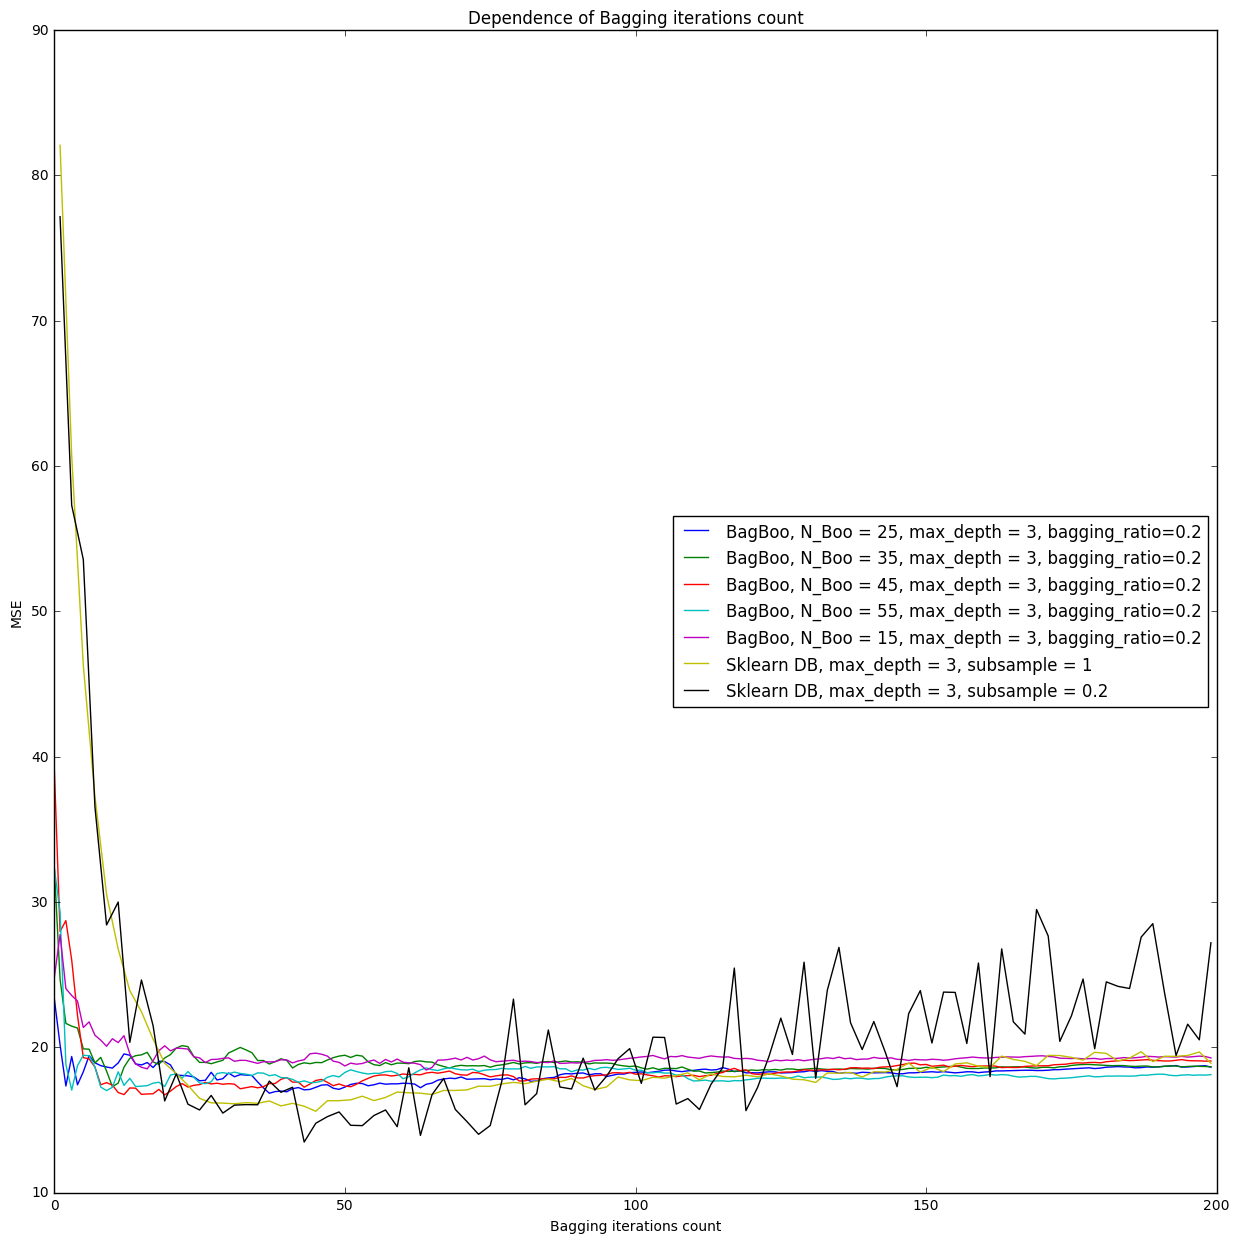

In [51]:
fig, ax = plt.subplots(figsize = (15, 15))
for k in error_stat_3.keys():
    
    plt.plot(range(0, 200), error_stat_3[k], label='BagBoo, N_Boo = ' + str(k) + \
                                                 ', max_depth = 3, bagging_ratio=0.2')
    
plt.plot(boo_list, skl_error_3, label='Sklearn DB, max_depth = 3, subsample = 1')
plt.plot(boo_list, skl_error_sub_3, label='Sklearn DB, max_depth = 3, subsample = 0.2')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')